# Import the necessary library 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

# Main library for static graphs
import matplotlib.pyplot as plt  
%matplotlib inline

# Second Main library for static graphs 
import seaborn as sns # graphs 

-----------------------------------------------------------------------

# Content-Based Filtering 

In [2]:
import os

In [3]:
anime =  pd.read_csv('anime_poster.csv')
synopsis = pd.read_csv('anime_with_synopsis.csv') 
onebyone = pd.read_csv('anime_each.csv') 

In [4]:
anime = anime.merge(synopsis,on = 'MAL_ID')

In [5]:
anime = anime.merge(onebyone,on = 'MAL_ID')

In [6]:
anime['name'] = anime['Name_y']

In [7]:
anime['score'] = anime['Score_y']

In [8]:
anime['rating'] = anime['Rating_y']

In [9]:
anime['genres'] = anime['Genres_y']

In [10]:
anime['episodes'] = anime['Episodes_y']

In [11]:
anime['synopsis'] = anime['synopsis']

In [12]:
# # Important ones
# 1. MAL_ID
# 2. Name
# 3. Genres
# 4. Synopsis 
# 5. Rating
# 6. Episodes
# 7. URL
# 8. user_id
anime = anime[['MAL_ID','name','synopsis','genres','score','rating','episodes','URL']]
anime

MAL_ID                             name  \
0           1                     Cowboy Bebop   
1           5  Cowboy Bebop: Tengoku no Tobira   
2           6                           Trigun   
3           7               Witch Hunter Robin   
4           8                   Bouken Ou Beet   
...       ...                              ...   
16089   48481  Daomu Biji Zhi Qinling Shen Shu   
16090   48483                     Mieruko-chan   
16091   48488  Higurashi no Naku Koro ni Sotsu   
16092   48491      Yama no Susume: Next Summit   
16093   48492                    Scarlet Nexus   

                                                synopsis  \
0      In the year 2071, humanity has colonized sever...   
1      other day, another bounty—such is the life of ...   
2      Vash the Stampede is the man with a $$60,000,0...   
3      ches are individuals with special powers like ...   
4      It is the dark century and the people are suff...   
...                                                  ...   
16089  No synopsis information has been added to this...   
16090  ko is a typical high school student whose life...   
16091          Sequel to Higurashi no Naku Koro ni Gou .   
16092                          New Yama no Susume anime.   
16093  Solar calendar year 2020: grotesque organisms ...   

                                                  genres    score  \
0        Action, Adventure, Comedy, Drama, Sci-Fi, Space     8.78   
1                  Action, Drama, Mystery, Sci-Fi, Space     8.39   
2      Action, Sci-Fi, Adventure, Comedy, Drama, Shounen     8.24   
3      Action, Mystery, Police, Supernatural, Drama, ...     7.27   
4              Adventure, Fantasy, Shounen, Supernatural     6.98   
...                                                  ...      ...   
16089                   Adventure, Mystery, Supernatural  Unknown   
16090                       Comedy, Horror, Supernatural  Unknown   
16091  Mystery, Dementia, Horror, Psychological, Supe...  Unknown   
16092                   Adventure, Slice of Life, Comedy  Unknown   
16093                                    Action, Fantasy  Unknown   

                               rating episodes  \
0      R - 17+ (violence & profanity)       26   
1      R - 17+ (violence & profanity)        1   
2           PG-13 - Teens 13 or older       26   
3           PG-13 - Teens 13 or older       26   
4                       PG - Children       52   
...                               ...      ...   
16089                         Unknown  Unknown   
16090                         Unknown  Unknown   
16091  R - 17+ (violence & profanity)  Unknown   
16092       PG-13 - Teens 13 or older  Unknown   
16093                         Unknown  Unknown   

                                                     URL  
0      https://cdn.myanimelist.net/images/anime/4/196...  
1      https://cdn.myanimelist.net/images/anime/1439/...  
2      https://cdn.myanimelist.net/images/anime/7/203...  
3      https://cdn.myanimelist.net/images/anime/10/19...  
4      https://cdn.myanimelist.net/images/anime/7/215...  
...                                                  ...  
16089  https://cdn.myanimelist.net/images/anime/1166/...  
16090  https://cdn.myanimelist.net/images/anime/1277/...  
16091  https://cdn.myanimelist.net/images/anime/1083/...  
16092  https://cdn.myanimelist.net/images/anime/1942/...  
16093  https://cdn.myanimelist.net/images/anime/1314/...  

[16094 rows x 8 columns]

In [13]:
# Convert genres to text

import ast

In [14]:
anime['genres'] = anime['genres'].str.split(', ')

In [15]:
anime.head()

MAL_ID                             name  \
0       1                     Cowboy Bebop   
1       5  Cowboy Bebop: Tengoku no Tobira   
2       6                           Trigun   
3       7               Witch Hunter Robin   
4       8                   Bouken Ou Beet   

                                            synopsis  \
0  In the year 2071, humanity has colonized sever...   
1  other day, another bounty—such is the life of ...   
2  Vash the Stampede is the man with a $$60,000,0...   
3  ches are individuals with special powers like ...   
4  It is the dark century and the people are suff...   

                                              genres score  \
0  [Action, Adventure, Comedy, Drama, Sci-Fi, Space]  8.78   
1            [Action, Drama, Mystery, Sci-Fi, Space]  8.39   
2  [Action, Sci-Fi, Adventure, Comedy, Drama, Sho...  8.24   
3  [Action, Mystery, Police, Supernatural, Drama,...  7.27   
4        [Adventure, Fantasy, Shounen, Supernatural]  6.98   

                           rating episodes  \
0  R - 17+ (violence & profanity)       26   
1  R - 17+ (violence & profanity)        1   
2       PG-13 - Teens 13 or older       26   
3       PG-13 - Teens 13 or older       26   
4                   PG - Children       52   

                                                 URL  
0  https://cdn.myanimelist.net/images/anime/4/196...  
1  https://cdn.myanimelist.net/images/anime/1439/...  
2  https://cdn.myanimelist.net/images/anime/7/203...  
3  https://cdn.myanimelist.net/images/anime/10/19...  
4  https://cdn.myanimelist.net/images/anime/7/215...

In [16]:
# Filter Synopsis with each and every word
anime['synopsis'] = anime['synopsis'].fillna('').apply(lambda x:x.split())

In [17]:
anime 

MAL_ID                             name  \
0           1                     Cowboy Bebop   
1           5  Cowboy Bebop: Tengoku no Tobira   
2           6                           Trigun   
3           7               Witch Hunter Robin   
4           8                   Bouken Ou Beet   
...       ...                              ...   
16089   48481  Daomu Biji Zhi Qinling Shen Shu   
16090   48483                     Mieruko-chan   
16091   48488  Higurashi no Naku Koro ni Sotsu   
16092   48491      Yama no Susume: Next Summit   
16093   48492                    Scarlet Nexus   

                                                synopsis  \
0      [In, the, year, 2071,, humanity, has, colonize...   
1      [other, day,, another, bounty—such, is, the, l...   
2      [Vash, the, Stampede, is, the, man, with, a, $...   
3      [ches, are, individuals, with, special, powers...   
4      [It, is, the, dark, century, and, the, people,...   
...                                                  ...   
16089  [No, synopsis, information, has, been, added, ...   
16090  [ko, is, a, typical, high, school, student, wh...   
16091  [Sequel, to, Higurashi, no, Naku, Koro, ni, Go...   
16092                    [New, Yama, no, Susume, anime.]   
16093  [Solar, calendar, year, 2020:, grotesque, orga...   

                                                  genres    score  \
0      [Action, Adventure, Comedy, Drama, Sci-Fi, Space]     8.78   
1                [Action, Drama, Mystery, Sci-Fi, Space]     8.39   
2      [Action, Sci-Fi, Adventure, Comedy, Drama, Sho...     8.24   
3      [Action, Mystery, Police, Supernatural, Drama,...     7.27   
4            [Adventure, Fantasy, Shounen, Supernatural]     6.98   
...                                                  ...      ...   
16089                 [Adventure, Mystery, Supernatural]  Unknown   
16090                     [Comedy, Horror, Supernatural]  Unknown   
16091  [Mystery, Dementia, Horror, Psychological, Sup...  Unknown   
16092                 [Adventure, Slice of Life, Comedy]  Unknown   
16093                                  [Action, Fantasy]  Unknown   

                               rating episodes  \
0      R - 17+ (violence & profanity)       26   
1      R - 17+ (violence & profanity)        1   
2           PG-13 - Teens 13 or older       26   
3           PG-13 - Teens 13 or older       26   
4                       PG - Children       52   
...                               ...      ...   
16089                         Unknown  Unknown   
16090                         Unknown  Unknown   
16091  R - 17+ (violence & profanity)  Unknown   
16092       PG-13 - Teens 13 or older  Unknown   
16093                         Unknown  Unknown   

                                                     URL  
0      https://cdn.myanimelist.net/images/anime/4/196...  
1      https://cdn.myanimelist.net/images/anime/1439/...  
2      https://cdn.myanimelist.net/images/anime/7/203...  
3      https://cdn.myanimelist.net/images/anime/10/19...  
4      https://cdn.myanimelist.net/images/anime/7/215...  
...                                                  ...  
16089  https://cdn.myanimelist.net/images/anime/1166/...  
16090  https://cdn.myanimelist.net/images/anime/1277/...  
16091  https://cdn.myanimelist.net/images/anime/1083/...  
16092  https://cdn.myanimelist.net/images/anime/1942/...  
16093  https://cdn.myanimelist.net/images/anime/1314/...  

[16094 rows x 8 columns]

In [18]:
anime.iloc[0]['synopsis']

['In',
 'the',
 'year',
 '2071,',
 'humanity',
 'has',
 'colonized',
 'several',
 'of',
 'the',
 'planets',
 'and',
 'moons',
 'of',
 'the',
 'solar',
 'system',
 'leaving',
 'the',
 'now',
 'uninhabitable',
 'surface',
 'of',
 'planet',
 'Earth',
 'behind.',
 'The',
 'Inter',
 'Solar',
 'System',
 'Police',
 'attempts',
 'to',
 'keep',
 'peace',
 'in',
 'the',
 'galaxy,',
 'aided',
 'in',
 'part',
 'by',
 'outlaw',
 'bounty',
 'hunters,',
 'referred',
 'to',
 'as',
 '"Cowboys."',
 'The',
 'ragtag',
 'team',
 'aboard',
 'the',
 'spaceship',
 'Bebop',
 'are',
 'two',
 'such',
 'individuals.',
 'Mellow',
 'and',
 'carefree',
 'Spike',
 'Spiegel',
 'is',
 'balanced',
 'by',
 'his',
 'boisterous,',
 'pragmatic',
 'partner',
 'Jet',
 'Black',
 'as',
 'the',
 'pair',
 'makes',
 'a',
 'living',
 'chasing',
 'bounties',
 'and',
 'collecting',
 'rewards.',
 'Thrown',
 'off',
 'course',
 'by',
 'the',
 'addition',
 'of',
 'new',
 'members',
 'that',
 'they',
 'meet',
 'in',
 'their',
 'travels—E

In [19]:
# Remove Spacing

def convert_nospace(word):
    l = []
    for i in word:
        l.append(i.replace(" ",""))
    return l

In [20]:
anime['synopsis'] = anime['synopsis'].apply(convert_nospace)

In [21]:
anime['genres'] = anime['genres'].apply(convert_nospace)

In [22]:
anime

MAL_ID                             name  \
0           1                     Cowboy Bebop   
1           5  Cowboy Bebop: Tengoku no Tobira   
2           6                           Trigun   
3           7               Witch Hunter Robin   
4           8                   Bouken Ou Beet   
...       ...                              ...   
16089   48481  Daomu Biji Zhi Qinling Shen Shu   
16090   48483                     Mieruko-chan   
16091   48488  Higurashi no Naku Koro ni Sotsu   
16092   48491      Yama no Susume: Next Summit   
16093   48492                    Scarlet Nexus   

                                                synopsis  \
0      [In, the, year, 2071,, humanity, has, colonize...   
1      [other, day,, another, bounty—such, is, the, l...   
2      [Vash, the, Stampede, is, the, man, with, a, $...   
3      [ches, are, individuals, with, special, powers...   
4      [It, is, the, dark, century, and, the, people,...   
...                                                  ...   
16089  [No, synopsis, information, has, been, added, ...   
16090  [ko, is, a, typical, high, school, student, wh...   
16091  [Sequel, to, Higurashi, no, Naku, Koro, ni, Go...   
16092                    [New, Yama, no, Susume, anime.]   
16093  [Solar, calendar, year, 2020:, grotesque, orga...   

                                                  genres    score  \
0      [Action, Adventure, Comedy, Drama, Sci-Fi, Space]     8.78   
1                [Action, Drama, Mystery, Sci-Fi, Space]     8.39   
2      [Action, Sci-Fi, Adventure, Comedy, Drama, Sho...     8.24   
3      [Action, Mystery, Police, Supernatural, Drama,...     7.27   
4            [Adventure, Fantasy, Shounen, Supernatural]     6.98   
...                                                  ...      ...   
16089                 [Adventure, Mystery, Supernatural]  Unknown   
16090                     [Comedy, Horror, Supernatural]  Unknown   
16091  [Mystery, Dementia, Horror, Psychological, Sup...  Unknown   
16092                   [Adventure, SliceofLife, Comedy]  Unknown   
16093                                  [Action, Fantasy]  Unknown   

                               rating episodes  \
0      R - 17+ (violence & profanity)       26   
1      R - 17+ (violence & profanity)        1   
2           PG-13 - Teens 13 or older       26   
3           PG-13 - Teens 13 or older       26   
4                       PG - Children       52   
...                               ...      ...   
16089                         Unknown  Unknown   
16090                         Unknown  Unknown   
16091  R - 17+ (violence & profanity)  Unknown   
16092       PG-13 - Teens 13 or older  Unknown   
16093                         Unknown  Unknown   

                                                     URL  
0      https://cdn.myanimelist.net/images/anime/4/196...  
1      https://cdn.myanimelist.net/images/anime/1439/...  
2      https://cdn.myanimelist.net/images/anime/7/203...  
3      https://cdn.myanimelist.net/images/anime/10/19...  
4      https://cdn.myanimelist.net/images/anime/7/215...  
...                                                  ...  
16089  https://cdn.myanimelist.net/images/anime/1166/...  
16090  https://cdn.myanimelist.net/images/anime/1277/...  
16091  https://cdn.myanimelist.net/images/anime/1083/...  
16092  https://cdn.myanimelist.net/images/anime/1942/...  
16093  https://cdn.myanimelist.net/images/anime/1314/...  

[16094 rows x 8 columns]

In [23]:
#Apply tags
anime['tags'] = anime['synopsis'] + anime['genres'] 

In [24]:
anime.iloc[0]['tags']

['In',
 'the',
 'year',
 '2071,',
 'humanity',
 'has',
 'colonized',
 'several',
 'of',
 'the',
 'planets',
 'and',
 'moons',
 'of',
 'the',
 'solar',
 'system',
 'leaving',
 'the',
 'now',
 'uninhabitable',
 'surface',
 'of',
 'planet',
 'Earth',
 'behind.',
 'The',
 'Inter',
 'Solar',
 'System',
 'Police',
 'attempts',
 'to',
 'keep',
 'peace',
 'in',
 'the',
 'galaxy,',
 'aided',
 'in',
 'part',
 'by',
 'outlaw',
 'bounty',
 'hunters,',
 'referred',
 'to',
 'as',
 '"Cowboys."',
 'The',
 'ragtag',
 'team',
 'aboard',
 'the',
 'spaceship',
 'Bebop',
 'are',
 'two',
 'such',
 'individuals.',
 'Mellow',
 'and',
 'carefree',
 'Spike',
 'Spiegel',
 'is',
 'balanced',
 'by',
 'his',
 'boisterous,',
 'pragmatic',
 'partner',
 'Jet',
 'Black',
 'as',
 'the',
 'pair',
 'makes',
 'a',
 'living',
 'chasing',
 'bounties',
 'and',
 'collecting',
 'rewards.',
 'Thrown',
 'off',
 'course',
 'by',
 'the',
 'addition',
 'of',
 'new',
 'members',
 'that',
 'they',
 'meet',
 'in',
 'their',
 'travels—E

In [25]:
ndf = anime[['MAL_ID','name','tags']]

In [26]:
ndf

MAL_ID                             name  \
0           1                     Cowboy Bebop   
1           5  Cowboy Bebop: Tengoku no Tobira   
2           6                           Trigun   
3           7               Witch Hunter Robin   
4           8                   Bouken Ou Beet   
...       ...                              ...   
16089   48481  Daomu Biji Zhi Qinling Shen Shu   
16090   48483                     Mieruko-chan   
16091   48488  Higurashi no Naku Koro ni Sotsu   
16092   48491      Yama no Susume: Next Summit   
16093   48492                    Scarlet Nexus   

                                                    tags  
0      [In, the, year, 2071,, humanity, has, colonize...  
1      [other, day,, another, bounty—such, is, the, l...  
2      [Vash, the, Stampede, is, the, man, with, a, $...  
3      [ches, are, individuals, with, special, powers...  
4      [It, is, the, dark, century, and, the, people,...  
...                                                  ...  
16089  [No, synopsis, information, has, been, added, ...  
16090  [ko, is, a, typical, high, school, student, wh...  
16091  [Sequel, to, Higurashi, no, Naku, Koro, ni, Go...  
16092  [New, Yama, no, Susume, anime., Adventure, Sli...  
16093  [Solar, calendar, year, 2020:, grotesque, orga...  

[16094 rows x 3 columns]

In [27]:
ndf['tags'] = ndf['tags'].apply(lambda x:" ".join(x))

C:\Users\60169\AppData\Local\Temp\ipykernel_20876\331527534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['tags'] = ndf['tags'].apply(lambda x:" ".join(x))


In [28]:
ndf

MAL_ID                             name  \
0           1                     Cowboy Bebop   
1           5  Cowboy Bebop: Tengoku no Tobira   
2           6                           Trigun   
3           7               Witch Hunter Robin   
4           8                   Bouken Ou Beet   
...       ...                              ...   
16089   48481  Daomu Biji Zhi Qinling Shen Shu   
16090   48483                     Mieruko-chan   
16091   48488  Higurashi no Naku Koro ni Sotsu   
16092   48491      Yama no Susume: Next Summit   
16093   48492                    Scarlet Nexus   

                                                    tags  
0      In the year 2071, humanity has colonized sever...  
1      other day, another bounty—such is the life of ...  
2      Vash the Stampede is the man with a $$60,000,0...  
3      ches are individuals with special powers like ...  
4      It is the dark century and the people are suff...  
...                                                  ...  
16089  No synopsis information has been added to this...  
16090  ko is a typical high school student whose life...  
16091  Sequel to Higurashi no Naku Koro ni Gou . Myst...  
16092  New Yama no Susume anime. Adventure SliceofLif...  
16093  Solar calendar year 2020: grotesque organisms ...  

[16094 rows x 3 columns]

In [29]:
ndf.iloc[0]['tags']

'In the year 2071, humanity has colonized several of the planets and moons of the solar system leaving the now uninhabitable surface of planet Earth behind. The Inter Solar System Police attempts to keep peace in the galaxy, aided in part by outlaw bounty hunters, referred to as "Cowboys." The ragtag team aboard the spaceship Bebop are two such individuals. Mellow and carefree Spike Spiegel is balanced by his boisterous, pragmatic partner Jet Black as the pair makes a living chasing bounties and collecting rewards. Thrown off course by the addition of new members that they meet in their travels—Ein, a genetically engineered, highly intelligent Welsh Corgi; femme fatale Faye Valentine, an enigmatic trickster with memory loss; and the strange computer whiz kid Edward Wong—the crew embarks on thrilling adventures that unravel each member\'s dark and mysterious past little by little. Well-balanced with high density action and light-hearted comedy, Cowboy Bebop is a space Western classic an

In [30]:
# Now  convert all to lowercase
ndf['tags'] = ndf['tags'].apply(lambda x:x.lower())

C:\Users\60169\AppData\Local\Temp\ipykernel_20876\4131918263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['tags'] = ndf['tags'].apply(lambda x:x.lower())


In [31]:
ndf['tags']

0        in the year 2071, humanity has colonized sever...
1        other day, another bounty—such is the life of ...
2        vash the stampede is the man with a $$60,000,0...
3        ches are individuals with special powers like ...
4        it is the dark century and the people are suff...
                               ...                        
16089    no synopsis information has been added to this...
16090    ko is a typical high school student whose life...
16091    sequel to higurashi no naku koro ni gou . myst...
16092    new yama no susume anime. adventure sliceoflif...
16093    solar calendar year 2020: grotesque organisms ...
Name: tags, Length: 16094, dtype: object

In [32]:
ndf.iloc[0]['tags']

'in the year 2071, humanity has colonized several of the planets and moons of the solar system leaving the now uninhabitable surface of planet earth behind. the inter solar system police attempts to keep peace in the galaxy, aided in part by outlaw bounty hunters, referred to as "cowboys." the ragtag team aboard the spaceship bebop are two such individuals. mellow and carefree spike spiegel is balanced by his boisterous, pragmatic partner jet black as the pair makes a living chasing bounties and collecting rewards. thrown off course by the addition of new members that they meet in their travels—ein, a genetically engineered, highly intelligent welsh corgi; femme fatale faye valentine, an enigmatic trickster with memory loss; and the strange computer whiz kid edward wong—the crew embarks on thrilling adventures that unravel each member\'s dark and mysterious past little by little. well-balanced with high density action and light-hearted comedy, cowboy bebop is a space western classic an

In [33]:
#Porter Stemmer
#Part 07

import nltk
from nltk.stem import PorterStemmer

In [34]:
ps = PorterStemmer()

In [35]:
def stems(text):
    l = []
    for i in text.split():
        l.append(ps.stem(i))
        
    return " ".join(l)

In [36]:
ndf['tags'] = ndf['tags'].apply(stems) 

C:\Users\60169\AppData\Local\Temp\ipykernel_20876\2660278334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['tags'] = ndf['tags'].apply(stems)


In [37]:
ndf.iloc[0]['tags']

'in the year 2071, human ha colon sever of the planet and moon of the solar system leav the now uninhabit surfac of planet earth behind. the inter solar system polic attempt to keep peac in the galaxy, aid in part by outlaw bounti hunters, refer to as "cowboys." the ragtag team aboard the spaceship bebop are two such individuals. mellow and carefre spike spiegel is balanc by hi boisterous, pragmat partner jet black as the pair make a live chase bounti and collect rewards. thrown off cours by the addit of new member that they meet in their travels—ein, a genet engineered, highli intellig welsh corgi; femm fatal fay valentine, an enigmat trickster with memori loss; and the strang comput whiz kid edward wong—th crew embark on thrill adventur that unravel each member\' dark and mysteri past littl by little. well-balanc with high densiti action and light-heart comedy, cowboy bebop is a space western classic and an homag to the smooth and improvis music it is name after. action adventur come

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000000, stop_words='english')

In [39]:
vector = cv.fit_transform(ndf['tags']).toarray()

In [40]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
#Use vectors to measure cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [42]:
similarity = cosine_similarity(vector)

In [43]:
similarity

array([[1.        , 0.244617  , 0.15675571, ..., 0.02522166, 0.13209164,
        0.10305651],
       [0.244617  , 1.        , 0.08859276, ..., 0.02993422, 0.        ,
        0.09173411],
       [0.15675571, 0.08859276, 1.        , ..., 0.        , 0.06458337,
        0.01259682],
       ...,
       [0.02522166, 0.02993422, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.13209164, 0.        , 0.06458337, ..., 0.        , 1.        ,
        0.05572782],
       [0.10305651, 0.09173411, 0.01259682, ..., 0.        , 0.05572782,
        1.        ]])

In [44]:
def recommend(anime):
    index = ndf[ndf['name'] == anime].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    for i in distances[1:6]:
        anime_index = i[0]
        anime_name = ndf.iloc[anime_index]['name']
        print(f"{anime_name}")

In [45]:
ndf.name

0                           Cowboy Bebop
1        Cowboy Bebop: Tengoku no Tobira
2                                 Trigun
3                     Witch Hunter Robin
4                         Bouken Ou Beet
                      ...               
16089    Daomu Biji Zhi Qinling Shen Shu
16090                       Mieruko-chan
16091    Higurashi no Naku Koro ni Sotsu
16092        Yama no Susume: Next Summit
16093                      Scarlet Nexus
Name: name, Length: 16094, dtype: object

In [46]:
#To test the recommendation system
recommend('Fairy Tail')

Fairy Tail: Final Series
Fairy Tail x Rave
Fairy Tail (2014)
Magical★Taruruuto-kun Movie
Magical★Taruruuto-kun: Sukisuki Takoyaki!


In [47]:
import pickle

pickle.dump(ndf, open('Sat/anime_list.pkl','wb'))
pickle.dump(similarity, open('Sat/similary.pkl','wb'))

---------------------------------------------------------------------------

---------------------------------------------------------------------------

---------------------------------------------------------------------------

# Collaborative Filtering 

## Item-item-based 

### Read the csv files 

In [48]:
#read csv files 
animeList = pd.read_csv('anime-filtered.csv')
score = pd.read_csv('users-score-2023.csv') 

# select some data from score cause it is too big 
score = score.iloc[0:1000000, :]

### Check the number of rows & columns

In [49]:
# Number of rows & columns in (rows, column) of anime-filtered.csv 
animeList.shape 

(14952, 25)

In [50]:
# Number of rows & columns in (rows, column) of user-score-2023.csv 
score.shape 

(1000000, 5)

### Check the info and dtypes of each datasets 

In [51]:
#Check the info of each data 

animeList.info() 
print('')
score.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14952 entries, 0 to 14951
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       14952 non-null  int64  
 1   Name           14952 non-null  object 
 2   Score          14952 non-null  float64
 3   Genres         14952 non-null  object 
 4   English name   14952 non-null  object 
 5   Japanese name  14952 non-null  object 
 6   sypnopsis      13602 non-null  object 
 7   Type           14952 non-null  object 
 8   Episodes       14952 non-null  object 
 9   Aired          14952 non-null  object 
 10  Premiered      14952 non-null  object 
 11  Producers      14952 non-null  object 
 12  Licensors      14952 non-null  object 
 13  Studios        14952 non-null  object 
 14  Source         14952 non-null  object 
 15  Duration       14952 non-null  object 
 16  Rating         14952 non-null  object 
 17  Ranked         13231 non-null  float64
 18  Popula

### View the top 5 and bottom 5 data 

In [52]:
#view the data 
animeList 

anime_id                             Name  Score  \
0             1                     Cowboy Bebop   8.78   
1             5  Cowboy Bebop: Tengoku no Tobira   8.39   
2             6                           Trigun   8.24   
3             7               Witch Hunter Robin   7.27   
4             8                   Bouken Ou Beet   6.98   
...         ...                              ...    ...   
14947     48481  Daomu Biji Zhi Qinling Shen Shu   6.51   
14948     48483                     Mieruko-chan   6.51   
14949     48488  Higurashi no Naku Koro ni Sotsu   6.51   
14950     48491      Yama no Susume: Next Summit   6.51   
14951     48492                    Scarlet Nexus   6.51   

                                                  Genres  \
0        Action, Adventure, Comedy, Drama, Sci-Fi, Space   
1                  Action, Drama, Mystery, Sci-Fi, Space   
2      Action, Sci-Fi, Adventure, Comedy, Drama, Shounen   
3      Action, Mystery, Police, Supernatural, Drama, ...   
4              Adventure, Fantasy, Shounen, Supernatural   
...                                                  ...   
14947                   Adventure, Mystery, Supernatural   
14948                       Comedy, Horror, Supernatural   
14949  Mystery, Dementia, Horror, Psychological, Supe...   
14950                   Adventure, Slice of Life, Comedy   
14951                                    Action, Fantasy   

                          English name                     Japanese name  \
0                         Cowboy Bebop                         カウボーイビバップ   
1               Cowboy Bebop:The Movie                    カウボーイビバップ 天国の扉   
2                               Trigun                             トライガン   
3                   Witch Hunter Robin  Witch Hunter ROBIN (ウイッチハンターロビン)   
4               Beet the Vandel Buster                            冒険王ビィト   
...                                ...                               ...   
14947                          Unknown                         盗墓笔记之秦岭神树   
14948                          Unknown                           見える子ちゃん   
14949  Higurashi:When They Cry – SOTSU                        ひぐらしのなく頃に卒   
14950                          Unknown                ヤマノススメ Next Summit   
14951                          Unknown                     SCARLET NEXUS   

                                               sypnopsis   Type Episodes  \
0      In the year 2071, humanity has colonized sever...     TV       26   
1      other day, another bounty—such is the life of ...  Movie        1   
2      Vash the Stampede is the man with a $$60,000,0...     TV       26   
3      ches are individuals with special powers like ...     TV       26   
4      It is the dark century and the people are suff...     TV       52   
...                                                  ...    ...      ...   
14947  No synopsis information has been added to this...    ONA  Unknown   
14948  ko is a typical high school student whose life...     TV  Unknown   
14949          Sequel to Higurashi no Naku Koro ni Gou .     TV  Unknown   
14950                          New Yama no Susume anime.     TV  Unknown   
14951  Solar calendar year 2020: grotesque organisms ...     TV  Unknown   

                              Aired  ...         Duration  \
0       Apr 3, 1998 to Apr 24, 1999  ...  24 min. per ep.   
1                       Sep 1, 2001  ...    1 hr. 55 min.   
2       Apr 1, 1998 to Sep 30, 1998  ...  24 min. per ep.   
3       Jul 2, 2002 to Dec 24, 2002  ...  25 min. per ep.   
4      Sep 30, 2004 to Sep 29, 2005  ...  23 min. per ep.   
...                             ...  ...              ...   
14947              Apr 4, 2021 to ?  ...          Unknown   
14948                     2021 to ?  ...          Unknown   
14949                Jul, 2021 to ?  ...          Unknown   
14950                       Unknown  ...          Unknown   
14951                Jul, 2021 to ?  ...          Unknown   

                  

In [53]:
animeList.nunique()

anime_id         14952
Name             14949
Score              532
Genres            4839
English name      6252
Japanese name    14176
sypnopsis        12890
Type                 7
Episodes           199
Aired            10722
Premiered          231
Producers         3714
Licensors          231
Studios           1048
Source              16
Duration           301
Rating               7
Ranked            9159
Popularity        9979
Members           9337
Favorites         1543
Watching          3580
Completed         7821
On-Hold           2915
Dropped           3035
dtype: int64

In [54]:
#view the data 
score

user_id Username  anime_id                       Anime Title  rating
0             1    Xinil        21                         One Piece       9
1             1    Xinil        48                       .hack//Sign       7
2             1    Xinil       320                            A Kite       5
3             1    Xinil        49                  Aa! Megami-sama!       8
4             1    Xinil       304            Aa! Megami-sama! Movie       8
...         ...      ...       ...                               ...     ...
999995    12542  wrzosek       846            School Rumble Ni Gakki       5
999996    12542  wrzosek       517  School Rumble: Ichi Gakki Hoshuu       7
999997    12542  wrzosek     16498                Shingeki no Kyojin      10
999998    12542  wrzosek     19285   Shingeki no Kyojin: Ano Hi Kara       8
999999    12542  wrzosek       169            Shingetsutan Tsukihime       9

[1000000 rows x 5 columns]

In [55]:
score.nunique()

user_id         8226
Username        8226
anime_id       11613
Anime Title    11610
rating            10
dtype: int64

--------------------------------------------------------------------------

### Merge the files 

In [56]:
#merge the datasets 

animedata = pd.merge(score, animeList, how='inner', on='anime_id') 
animedata 

user_id  Username  anime_id  \
0             1     Xinil        21   
1            20    vondur        21   
2            23     Amuro        21   
3            67  ShadowOz        21   
4            70    Cruzle        21   
...         ...       ...       ...   
991657    12335  Ariazero     36692   
991658    12335  Ariazero     32151   
991659    12346      Ansa      6093   
991660    12349    Agnasa     24973   
991661    12484   Desirie      2173   

                                              Anime Title  rating  \
0                                               One Piece       9   
1                                               One Piece       9   
2                                               One Piece       7   
3                                               One Piece       8   
4                                               One Piece       8   
...                                                   ...     ...   
991657  Senki Zesshou Symphogear AXZ: Senki Zesshou Sh...       6   
991658  Senki Zesshou Symphogear GX: Senki Zesshou Shi...       7   
991659                                       Anmitsu Hime       8   
991660                 Bokura wa Minna Kawai-sou Specials       6   
991661  Kouchuu Ouja Mushiking Super Battle Movie: Yam...       4   

                                                     Name  Score  \
0                                               One Piece   8.52   
1                                               One Piece   8.52   
2                                               One Piece   8.52   
3                                               One Piece   8.52   
4                                               One Piece   8.52   
...                                                   ...    ...   
991657  Senki Zesshou Symphogear AXZ: Senki Zesshou Sh...   6.87   
991658  Senki Zesshou Symphogear GX: Senki Zesshou Shi...   6.91   
991659                                       Anmitsu Hime   6.30   
991660                 Bokura wa Minna Kawai-sou Specials   7.15   
991661  Kouchuu Ouja Mushiking Super Battle Movie: Yam...   6.51   

                                                   Genres  \
0       Action, Adventure, Comedy, Super Power, Drama,...   
1       Action, Adventure, Comedy, Super Power, Drama,...   
2       Action, Adventure, Comedy, Super Power, Drama,...   
3       Action, Adventure, Comedy, Super Power, Drama,...   
4       Action, Adventure, Comedy, Super Power, Drama,...   
...                                                   ...   
991657               Sci-Fi, Music, Slice of Life, Comedy   
991658               Sci-Fi, Music, Slice of Life, Comedy   
991659                         Comedy, Historical, Shoujo   
991660                                     Comedy, Seinen   
991661                                 Adventure, Fantasy   

                                             English name  \
0                                               One Piece   
1                                               One Piece   
2                                               One Piece   
3                                               One Piece   
4                                               One Piece   
...                                                   ...   
991657                                            Unknown   
991658                                            Unknown   
991659                                   Princess Anmitsu   
991660                                            Unknown   
991661  Mushiking:The King of Beetles SUPER BATTLE MOV...   

                         Japanese name  ...         Duration  \
0                            ONE PIECE  ...          24 min.   
1                            ONE PIECE  ...          24 min.   
2                            ONE PIECE  ...          24 min.   
3                            ONE PIECE  ...          24 min.   
4                            ONE PIECE  ...          24 min.   
...                                ...  ...

In [57]:
#filter the data and left only the intended columns 
animedata = animedata[['user_id', 'anime_id', 'rating', 'Anime Title', ]] 
animedata 

user_id  anime_id  rating  \
0             1        21       9   
1            20        21       9   
2            23        21       7   
3            67        21       8   
4            70        21       8   
...         ...       ...     ...   
991657    12335     36692       6   
991658    12335     32151       7   
991659    12346      6093       8   
991660    12349     24973       6   
991661    12484      2173       4   

                                              Anime Title  
0                                               One Piece  
1                                               One Piece  
2                                               One Piece  
3                                               One Piece  
4                                               One Piece  
...                                                   ...  
991657  Senki Zesshou Symphogear AXZ: Senki Zesshou Sh...  
991658  Senki Zesshou Symphogear GX: Senki Zesshou Shi...  
991659                                       Anmitsu Hime  
991660                 Bokura wa Minna Kawai-sou Specials  
991661  Kouchuu Ouja Mushiking Super Battle Movie: Yam...  

[991662 rows x 4 columns]

In [58]:
animedata.shape

(991662, 4)

In [59]:
#check if there is duplication of data
animedata.duplicated().sum()

0

In [60]:
animedata.nunique() 

user_id         8225
anime_id       10855
rating            10
Anime Title    10855
dtype: int64

In [61]:
animedata.isna().sum()

user_id        0
anime_id       0
rating         0
Anime Title    0
dtype: int64

### Checking data 

In [62]:
# Calculate count rating of all movies 
animedata.groupby('Anime Title')['rating'].count().sort_values(ascending=False).head() 

Anime Title
Fullmetal Alchemist    4302
Death Note             4223
Bleach                 3935
Naruto                 3635
Elfen Lied             3261
Name: rating, dtype: int64

In [63]:
#create a dataframe with 'name' + mean 'rating'
ratings = pd.DataFrame(animedata.groupby('Anime Title')['rating'].mean())  

#add another column called "num of ratings" that display total no of rating 
ratings['num of ratings'] = pd.DataFrame(animedata.groupby('Anime Title')['rating'].count()) 
  
ratings

rating  num of ratings
Anime Title                                                        
"0"                                        4.375000               8
"Bungaku Shoujo" Kyou no Oyatsu: Hatsukoi  6.900000             120
"Bungaku Shoujo" Memoire                   7.224490              98
"Bungaku Shoujo" Movie                     7.524390             164
"Calpis" Hakkou Monogatari                 3.333333               3
...                                             ...             ...
xxxHOLiC Rou                               8.000000             119
xxxHOLiC Shunmuki                          7.989848             197
xxxHOLiC◆Kei                               8.250580             431
ēlDLIVE                                    6.478261              23
◯                                          5.000000               3

[10855 rows x 2 columns]

In [64]:
#Sort data based on no of rating descendingly 
ratings.sort_values('num of ratings', ascending = False).head(10) 

rating  num of ratings
Anime Title                                              
Fullmetal Alchemist              8.655742            4302
Death Note                       8.665877            4223
Bleach                           7.833799            3935
Naruto                           7.496561            3635
Elfen Lied                       8.072677            3261
Code Geass: Hangyaku no Lelouch  8.626234            3141
Cowboy Bebop                     8.712355            3108
Suzumiya Haruhi no Yuuutsu       8.524126            3005
Sen to Chihiro no Kamikakushi    8.741808            2777
Ouran Koukou Host Club           8.638576            2753

<Axes: >

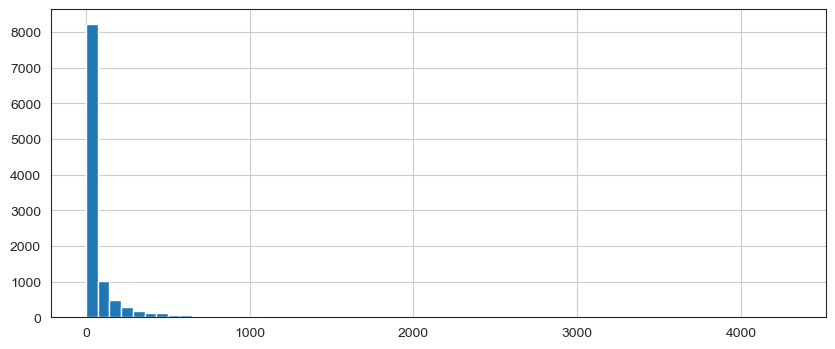

In [65]:
#Set background to white 
sns.set_style('white') 
%matplotlib inline 
 
# plot graph of 'num of ratings column' 
plt.figure(figsize =(10, 4)) 
  
ratings['num of ratings'].hist(bins = 60) 

<Axes: >

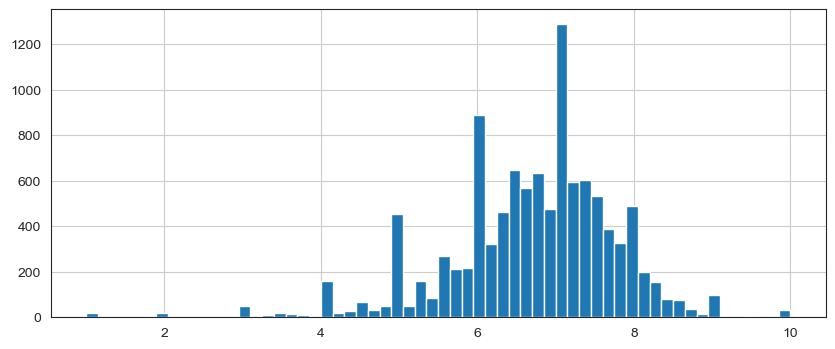

In [66]:
# plot graph of 'ratings' column 
plt.figure(figsize =(10, 4)) 
  
ratings['rating'].hist(bins = 60) 

---------------------------------------------------------------------------

In [67]:
#Convert the rating into 2D matrix 
#Column = name
#Row = user id 

animeUser = animedata.pivot_table(index ='user_id', 
              columns ='Anime Title', values ='rating') 

animeUser

#if want to read all rows and columns use: 
#pd.set_option('display.max_row', None) 
#pd.set_option('display.max_column', None) 

Anime Title  "0"  "Bungaku Shoujo" Kyou no Oyatsu: Hatsukoi  \
user_id                                                       
1            NaN                                        NaN   
4            NaN                                        NaN   
9            NaN                                        NaN   
20           NaN                                        NaN   
23           NaN                                        NaN   
...          ...                                        ...   
12538        NaN                                        NaN   
12539        NaN                                        NaN   
12540        NaN                                        NaN   
12541        NaN                                        NaN   
12542        NaN                                        NaN   

Anime Title  "Bungaku Shoujo" Memoire  "Bungaku Shoujo" Movie  \
user_id                                                         
1                                 NaN                     NaN   
4                                 NaN                     NaN   
9                                 NaN                     NaN   
20                                NaN                     NaN   
23                                NaN                     NaN   
...                               ...                     ...   
12538                             NaN                     NaN   
12539                             NaN                     NaN   
12540                             NaN                     NaN   
12541                             NaN                     NaN   
12542                             NaN                     NaN   

Anime Title  "Calpis" Hakkou Monogatari  "Eiji"  "Eiyuu" Kaitai  \
user_id                                                           
1                                   NaN     NaN             NaN   
4                                   NaN     NaN             NaN   
9                                   NaN     NaN             NaN   
20                                  NaN     NaN             NaN   
23                                  NaN     NaN             NaN   
...                                 ...     ...             ...   
12538                               NaN     NaN             NaN   
12539                               NaN     NaN             NaN   
12540                               NaN     NaN             NaN   
12541                               NaN     NaN             NaN   
12542                               NaN     NaN             NaN   

Anime Title  "Kinako" Movie x Mameshiba  \
user_id                                   
1                                   NaN   
4                                   NaN   
9                                   NaN   
20                                  NaN   
23                                  NaN   
...                                 ...   
12538                               NaN   
12539                               NaN   
12540                               NaN   
12541                               NaN   
12542                               NaN   

Anime Title  "Kiss Dekiru Gyoza" x Mameshiba Movie  "Parade" de Satie  ...  \
user_id                                                                ...   
1                                              NaN                NaN  ...   
4                                              NaN                NaN  ...   
9                                              NaN                NaN  ...   
20                                             NaN                NaN  ...   
23                                             NaN                NaN  ...   
...                                            ...                ...  ...   
12538                                          NaN                NaN  ...   
12539                                          NaN                NaN  ...   
12540                                          NaN                NaN  ...   
12541                                       

### User Interaction 

In [68]:
# User input an anime 
animeInput = input("Enter an anime: ")

# Alternative way is to make everything lowercase 
def capital_first_letter_of_each_word(animeInput):
    return animeInput.title()

animeSearch = capital_first_letter_of_each_word(animeInput)

user_ratings = animeUser[animeSearch]
#print(user_ratings)

#-----------------------------------------------------------------------------------------------------------------
# analysing correlation with similar movies 
similar_to_anime = animeUser.corrwith(user_ratings) 

corr_animeSearch = pd.DataFrame()
corr_animeSearch = pd.DataFrame(similar_to_anime, columns =['Correlation']) 
corr_animeSearch.dropna(inplace = True) 

corr_animeSearch.head() 

#-----------------------------------------------------------------------------------------------------------------
# Similar movies like the input anime  
corr_animeSearch.sort_values('Correlation', ascending = False).head(10) 
corr_animeSearch = corr_animeSearch.join(ratings['num of ratings']) 
  
corr_animeSearch.head() 
  
corr_animeSearch[corr_animeSearch['num of ratings']>100].sort_values('Correlation', ascending = False).head() 

Enter an anime: Fullmetal Alchemist


C:\Users\60169\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\60169\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Correlation  num of ratings
Anime Title                                                                 
Fullmetal Alchemist                                 1.000000            4302
Mangaka-san to Assistant-san to The Animation       0.625070             108
Denki-gai no Honya-san                              0.568936             124
SKET Dance                                          0.520612             126
Fullmetal Alchemist: The Conqueror of Shamballa     0.519564            2626

-------------------------------------------------------------

-------------------------------------------------------------

-------------------------------------------------------------

## Matrix Factorization

In [69]:
from sklearn import model_selection, metrics, preprocessing 
import torch 
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader 

In [70]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 

In [71]:
animedataTraining = pd.merge(score, animeList, how='inner', on='anime_id') 
animedataTraining 

user_id  Username  anime_id  \
0             1     Xinil        21   
1            20    vondur        21   
2            23     Amuro        21   
3            67  ShadowOz        21   
4            70    Cruzle        21   
...         ...       ...       ...   
991657    12335  Ariazero     36692   
991658    12335  Ariazero     32151   
991659    12346      Ansa      6093   
991660    12349    Agnasa     24973   
991661    12484   Desirie      2173   

                                              Anime Title  rating  \
0                                               One Piece       9   
1                                               One Piece       9   
2                                               One Piece       7   
3                                               One Piece       8   
4                                               One Piece       8   
...                                                   ...     ...   
991657  Senki Zesshou Symphogear AXZ: Senki Zesshou Sh...       6   
991658  Senki Zesshou Symphogear GX: Senki Zesshou Shi...       7   
991659                                       Anmitsu Hime       8   
991660                 Bokura wa Minna Kawai-sou Specials       6   
991661  Kouchuu Ouja Mushiking Super Battle Movie: Yam...       4   

                                                     Name  Score  \
0                                               One Piece   8.52   
1                                               One Piece   8.52   
2                                               One Piece   8.52   
3                                               One Piece   8.52   
4                                               One Piece   8.52   
...                                                   ...    ...   
991657  Senki Zesshou Symphogear AXZ: Senki Zesshou Sh...   6.87   
991658  Senki Zesshou Symphogear GX: Senki Zesshou Shi...   6.91   
991659                                       Anmitsu Hime   6.30   
991660                 Bokura wa Minna Kawai-sou Specials   7.15   
991661  Kouchuu Ouja Mushiking Super Battle Movie: Yam...   6.51   

                                                   Genres  \
0       Action, Adventure, Comedy, Super Power, Drama,...   
1       Action, Adventure, Comedy, Super Power, Drama,...   
2       Action, Adventure, Comedy, Super Power, Drama,...   
3       Action, Adventure, Comedy, Super Power, Drama,...   
4       Action, Adventure, Comedy, Super Power, Drama,...   
...                                                   ...   
991657               Sci-Fi, Music, Slice of Life, Comedy   
991658               Sci-Fi, Music, Slice of Life, Comedy   
991659                         Comedy, Historical, Shoujo   
991660                                     Comedy, Seinen   
991661                                 Adventure, Fantasy   

                                             English name  \
0                                               One Piece   
1                                               One Piece   
2                                               One Piece   
3                                               One Piece   
4                                               One Piece   
...                                                   ...   
991657                                            Unknown   
991658                                            Unknown   
991659                                   Princess Anmitsu   
991660                                            Unknown   
991661  Mushiking:The King of Beetles SUPER BATTLE MOV...   

                         Japanese name  ...         Duration  \
0                            ONE PIECE  ...          24 min.   
1                            ONE PIECE  ...          24 min.   
2                            ONE PIECE  ...          24 min.   
3                            ONE PIECE  ...          24 min.   
4                            ONE PIECE  ...          24 min.   
...                                ...  ...

In [72]:
#filter the data and left only the intended columns 
animedataTraining = animedataTraining[['user_id', 'anime_id', 'rating', 'Anime Title', ]] 
animedataTraining 

user_id  anime_id  rating  \
0             1        21       9   
1            20        21       9   
2            23        21       7   
3            67        21       8   
4            70        21       8   
...         ...       ...     ...   
991657    12335     36692       6   
991658    12335     32151       7   
991659    12346      6093       8   
991660    12349     24973       6   
991661    12484      2173       4   

                                              Anime Title  
0                                               One Piece  
1                                               One Piece  
2                                               One Piece  
3                                               One Piece  
4                                               One Piece  
...                                                   ...  
991657  Senki Zesshou Symphogear AXZ: Senki Zesshou Sh...  
991658  Senki Zesshou Symphogear GX: Senki Zesshou Shi...  
991659                                       Anmitsu Hime  
991660                 Bokura wa Minna Kawai-sou Specials  
991661  Kouchuu Ouja Mushiking Super Battle Movie: Yam...  

[991662 rows x 4 columns]

--------------------------------------------------------

### Training Dataset Class Wrapper

In [73]:
#to use torch pytorch dataLoader to do batch training 

class AnimeDataset: 
    #constructor 
    def __init__(self, users, animes, ratings): 
        self.users = users 
        self.animes = animes 
        self.ratings = ratings 
        
    #to show length of users 
    def __len__(self): 
        return len(self.users) 
    
   #to get a single data at position 'item' 
    def __getitem__(self, item): 
        users = self.users[item]
        animes = self.animes[item] 
        ratings = self.ratings[item] 
        
        return {
            "users": torch.tensor(users, dtype=torch.long), 
            "animes": torch.tensor(animes, dtype=torch.long),
            "ratings": torch.tensor(ratings, dtype=torch.long)
        }

### Create the model 

In [74]:
class RecSysModel(nn.Module): 
    def __init__(self, n_users, n_animes): 
        #call constructor from superclass 
        super().__init__() 
        
        self.user_embed = nn.Embedding(n_users, 32) 
        self.anime_embed = nn.Embedding(n_animes, 32) 
        
        self.out = nn.Linear(64, 1) 
        
    def forward(self, users, animes, ratings=None): 
        user_embeds = self.user_embed(users) 
        anime_embeds = self.anime_embed(animes) 
        output = torch.cat([user_embeds, anime_embeds], dim=1)
        
        output = self.out(output) 
        
        # Apply sigmoid to constrain the predicted ratings between 0 and 10
        predicted_ratings = 10.0 * torch.sigmoid(output)
        
        return output 

In [75]:
#To eliminate the skip in the id
lbl_user = preprocessing.LabelEncoder() 
lbl_anime = preprocessing.LabelEncoder() 
animedataTraining['user_id'] = lbl_user.fit_transform(animedataTraining['user_id'].values)
animedataTraining['anime_id'] = lbl_anime.fit_transform(animedataTraining['anime_id'].values)

#To train and valid the model using train-test split where we split
#the data into testing and validation sets 
animedataTraining_train, animedataTraining_valid = model_selection.train_test_split(
    #10% for validation, 90% for training 
    animedataTraining, test_size=0.1, random_state=42, stratify=animedataTraining.rating.values
)

train_dataset = AnimeDataset(
    users = animedataTraining_train.user_id.values,
    animes = animedataTraining_train.anime_id.values,
    ratings = animedataTraining_train.rating.values
)

valid_dataset = AnimeDataset(
    users = animedataTraining_valid.user_id.values,
    animes = animedataTraining_valid.anime_id.values,
    ratings = animedataTraining_valid.rating.values
) 

C:\Users\60169\AppData\Local\Temp\ipykernel_20876\1147220152.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animedataTraining['user_id'] = lbl_user.fit_transform(animedataTraining['user_id'].values)
C:\Users\60169\AppData\Local\Temp\ipykernel_20876\1147220152.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animedataTraining['anime_id'] = lbl_anime.fit_transform(animedataTraining['anime_id'].values)


In [76]:
train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=4, 
                          shuffle=True, 
                          num_workers=0, 
                          pin_memory=True, 
                          drop_last=True)

validation_loader = DataLoader(dataset=valid_dataset,
                          batch_size=4,
                          shuffle=True,
                          num_workers=0) 

dataiter = iter(train_loader)
dataloader_data = dataiter.next() 
print(dataloader_data) 

{'users': tensor([6654, 4420, 2337, 7949]), 'animes': tensor([ 228, 2174,   73,  852]), 'ratings': tensor([ 8,  3, 10,  8])}


In [77]:
model = RecSysModel(
    n_users = len(lbl_user.classes_),
    n_animes = len(lbl_anime.classes_),
).to(device)

#model.parameters() provides all the model's trainable parameters 
optimizer = torch.optim.Adam(model.parameters())  
#learning rate will be reduced by a factor of 0.7 every 3 epochs
sch = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.7)

#defining the loss function to be Mean Squared Error (MSE) loss
#used to measure the difference between model's prediction and actual 
loss_func = nn.MSELoss()

In [78]:
print(len(lbl_user.classes_))
print(len(lbl_anime.classes_))
print(animedataTraining.anime_id.max())
print(len(train_dataset))

8225
10855
10854
892495


-----------------------------------------------------------------

### Manually run a forward path 

In [79]:
print(dataloader_data['users'])

print(dataloader_data['users'].size())
print(dataloader_data['animes'] )
print(dataloader_data['animes'].size())

#creates embedding layers for users and animes (random values)
user_embed = nn.Embedding(len(lbl_user.classes_), 32)
anime_embed = nn.Embedding(len(lbl_anime.classes_), 32)

out = nn.Linear(64, 1)

tensor([6654, 4420, 2337, 7949])
torch.Size([4])
tensor([ 228, 2174,   73,  852])
torch.Size([4])


In [80]:
#Gain the corresponding embedding vector 
user_embeds = user_embed(dataloader_data['users'])
anime_embeds = anime_embed(dataloader_data['animes'])
print(f"user_embeds {user_embeds.size()}")
print(f"user_embeds {user_embeds}")
print(f"anime_embeds {anime_embeds.size()}")
print(f"anime_embeds {anime_embeds}")

user_embeds torch.Size([4, 32])
user_embeds tensor([[-0.8147, -2.1359,  0.2836,  0.4408,  1.0479, -0.7062, -1.5547,  1.0532,
          1.0686, -1.3132,  1.7692, -0.6903,  0.2663,  0.3782,  0.3272,  1.2038,
         -0.7359, -1.4633,  1.3722,  1.1369, -0.0955,  1.4221,  2.6426, -0.8685,
         -0.0072, -2.2458, -0.0857, -1.6528, -0.6430, -1.3772, -0.7229, -1.4402],
        [-0.3094, -0.1284, -0.2867, -0.7158,  0.3280, -2.1472, -0.8287, -1.9875,
         -1.0515, -1.6034, -0.9932, -0.0715, -1.5109,  1.7572, -0.9101,  0.2329,
         -0.3599,  0.0865, -0.3865,  1.6131, -0.6195,  0.8164,  0.9111,  0.2117,
          1.8669, -0.9887,  0.2785, -0.4724,  1.9700, -0.8205,  1.0342,  0.1029],
        [ 1.2140, -1.2243,  0.0032,  1.9819, -2.3206, -0.8336, -2.0969,  0.6827,
         -1.4591,  0.3796,  0.8163,  0.3743, -0.9460, -0.9894, -0.2467, -1.0638,
          0.7770, -0.2596, -0.3586,  0.7201,  0.2561, -0.1235, -1.0374,  0.5147,
          0.8199, -0.6432, -1.0266,  1.2838,  0.3120, -2.2691, 

In [81]:
#concatenates the user and anime embeddings to dimensions 1
output = torch.cat([user_embeds, anime_embeds], dim=1) 
print(f"output: {output.size()}")
print(f"output: {output}")
#process the 64-dimensions embeddings to 1 dimensions
output = out(output)
print(f"output: {output}")

output: torch.Size([4, 64])
output: tensor([[-0.8147, -2.1359,  0.2836,  0.4408,  1.0479, -0.7062, -1.5547,  1.0532,
          1.0686, -1.3132,  1.7692, -0.6903,  0.2663,  0.3782,  0.3272,  1.2038,
         -0.7359, -1.4633,  1.3722,  1.1369, -0.0955,  1.4221,  2.6426, -0.8685,
         -0.0072, -2.2458, -0.0857, -1.6528, -0.6430, -1.3772, -0.7229, -1.4402,
         -1.5023,  1.3755, -2.0202,  0.6746,  0.1766, -1.6877, -0.4180, -0.4419,
         -1.8316, -1.8345, -1.5798, -0.6997, -0.7877,  0.5295, -0.3602,  1.2333,
          0.6792,  2.2749, -0.4207, -0.3087,  2.3950, -0.2139,  0.6187,  0.0651,
          0.0805,  2.2023, -0.6142, -0.1209, -2.1666,  1.4479,  0.0902,  1.2902],
        [-0.3094, -0.1284, -0.2867, -0.7158,  0.3280, -2.1472, -0.8287, -1.9875,
         -1.0515, -1.6034, -0.9932, -0.0715, -1.5109,  1.7572, -0.9101,  0.2329,
         -0.3599,  0.0865, -0.3865,  1.6131, -0.6195,  0.8164,  0.9111,  0.2117,
          1.8669, -0.9887,  0.2785, -0.4724,  1.9700, -0.8205,  1.0342, 

In [82]:
#model inference
#gradient computation is disabled 
with torch.no_grad():
    #to get the predicted ratings, when using model(...), it internally call
    #forward method of the model class (convention in PyTorch)
    model_output = model(dataloader_data['users'], 
                   dataloader_data["animes"])

    print(f"model_output: {model_output}, size: {model_output.size()}")

model_output: tensor([[ 0.1991],
        [-0.2679],
        [-0.3632],
        [-0.0523]]), size: torch.Size([4, 1])


In [83]:
rating = dataloader_data["ratings"]
print(rating)
print(rating.view(4, -1))
print(model_output)

print(rating.sum())

print(model_output.sum() - rating.sum())

tensor([ 8,  3, 10,  8])
tensor([[ 8],
        [ 3],
        [10],
        [ 8]])
tensor([[ 0.1991],
        [-0.2679],
        [-0.3632],
        [-0.0523]])
tensor(29)
tensor(-29.4843)


-------------------------------------------------------------

### Run the training loop 

In [84]:
#how many times the model will iterate 
epochs = 1
#used to keep track of cumulative loss
total_loss = 0
#print average loss every 5000 steps 
plot_steps, print_steps = 5000, 5000
#to keep track of no of steps
step_cnt = 0
#to store average loss 
all_losses_list = [] 

#sets the model in training mode 
model.train() 
for epoch_i in range(epochs):
    #use enumerate to keep track of batch number 
    for i, train_data in enumerate(train_loader):
        output = model(train_data["users"], 
                       train_data["animes"]
                      ) 
        
        # .view(4, -1) is to reshape the rating to match the shape of model output which is 4x1
        rating = train_data["ratings"].view(4, -1).to(torch.float32)

        #calculate the MSE loss between predicted and actual ratings 
        loss = loss_func(output, rating) 
        #accumulates the loss for all batches in this epoch 
        total_loss = total_loss + loss.sum().item()
        #resets the gradient of the model parameters 
        optimizer.zero_grad()
        #computes gradients for the loss with respect to the model's parameter 
        loss.backward() 
        #update the model parameters with computed gradient 
        optimizer.step()

        #increase step_cnt 
        step_cnt = step_cnt + len(train_data["users"])
        
        
        if(step_cnt % plot_steps == 0):
            #average loss is calculated 
            avg_loss = total_loss/(len(train_data["users"]) * plot_steps)
            print(f"epoch {epoch_i} loss at step: {step_cnt} is {avg_loss}")
            all_losses_list.append(avg_loss)
            total_loss = 0 # reset total_loss

epoch 0 loss at step: 5000 is 2.985904987287521
epoch 0 loss at step: 10000 is 1.8369286295175553
epoch 0 loss at step: 15000 is 1.0282271309614182
epoch 0 loss at step: 20000 is 0.6238247283771634
epoch 0 loss at step: 25000 is 0.4201508629322052
epoch 0 loss at step: 30000 is 0.30956329073603267
epoch 0 loss at step: 35000 is 0.237771079197526
epoch 0 loss at step: 40000 is 0.1919478377006948
epoch 0 loss at step: 45000 is 0.17823007342591882
epoch 0 loss at step: 50000 is 0.16374699557833375
epoch 0 loss at step: 55000 is 0.15837762503661215
epoch 0 loss at step: 60000 is 0.15887371568959208
epoch 0 loss at step: 65000 is 0.1552886300600134
epoch 0 loss at step: 70000 is 0.14568520489372314
epoch 0 loss at step: 75000 is 0.14667864958569407
epoch 0 loss at step: 80000 is 0.14362832110207527
epoch 0 loss at step: 85000 is 0.1430474195729941
epoch 0 loss at step: 90000 is 0.14055044856043533
epoch 0 loss at step: 95000 is 0.13932221062369646
epoch 0 loss at step: 100000 is 0.137868746

epoch 0 loss at step: 800000 is 0.11040639119893313
epoch 0 loss at step: 805000 is 0.11083378528971224
epoch 0 loss at step: 810000 is 0.11070165162482298
epoch 0 loss at step: 815000 is 0.10584109431328252
epoch 0 loss at step: 820000 is 0.10973700016206131
epoch 0 loss at step: 825000 is 0.1169334104319103
epoch 0 loss at step: 830000 is 0.11532594435976352
epoch 0 loss at step: 835000 is 0.11278151374524459
epoch 0 loss at step: 840000 is 0.10947635701671243
epoch 0 loss at step: 845000 is 0.11033650817181916
epoch 0 loss at step: 850000 is 0.11185408438662998
epoch 0 loss at step: 855000 is 0.11020252767074853
epoch 0 loss at step: 860000 is 0.11107763084545731
epoch 0 loss at step: 865000 is 0.11052448275312782
epoch 0 loss at step: 870000 is 0.10740391302509233
epoch 0 loss at step: 875000 is 0.10684998192575294
epoch 0 loss at step: 880000 is 0.10947224109508097
epoch 0 loss at step: 885000 is 0.10865988360731862
epoch 0 loss at step: 890000 is 0.11417634962406009


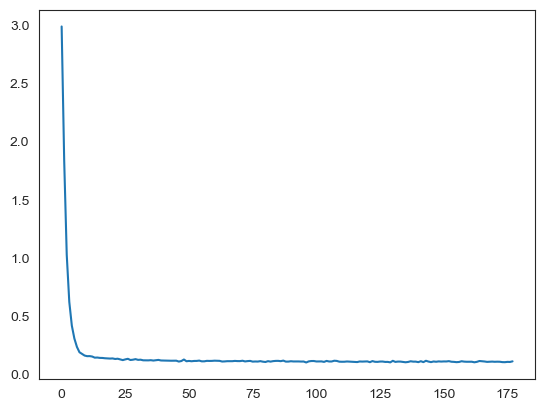

In [85]:
plt.figure()
plt.plot(all_losses_list)
plt.show()  

--------------------------------------------------------

RMSE assesses the prediction accuracy of your recommender system in terms of explicit ratings.

Recall@k emphasizes capturing as many relevant items as possible within the top-k recommendations, even if some irrelevant ones are included.

Precision@k emphasizes ensuring that recommended items in the top-k are highly relevant, even if it means missing some relevant items.

### Evaluation with RMSE 

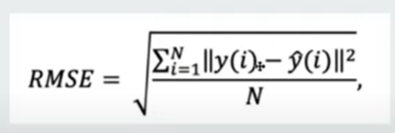

In [86]:
from IPython.display import Image

image_RMSE = 'RMS.image.png'

# Display the image
Image(filename=image_RMSE)

In [87]:
from sklearn.metrics import mean_squared_error

#store predicted value 
model_output_list = []
#store actual value 
target_rating_list = []

#to ensure no gradient are computed --> save memory 
model.eval()

with torch.no_grad():
    for i, batched_data in enumerate(validation_loader): 
        model_output = model(batched_data['users'], 
                       batched_data["animes"])
        
        #calculates the sum redicted value in a batch and convert to python float 
        model_output_list.append(model_output.sum().item() / len(batched_data['users']) )

        target_rating = batched_data["ratings"]
        
        target_rating_list.append(target_rating.sum().item() / len(batched_data['users']))

        print(f"model_output: {model_output}, target_rating: {target_rating}")


# squared If True returns MSE value, if False returns RMSE value.
# RMSE is a measure of model's accuracy in predicting ratings. 
rms = mean_squared_error(target_rating_list, model_output_list, squared=False)
print(f"rms: {rms}")

model_output: tensor([[7.1166],
        [8.8495],
        [7.0653],
        [7.9573]]), target_rating: tensor([7, 7, 7, 5])
model_output: tensor([[7.6771],
        [5.9415],
        [8.0261],
        [8.8968]]), target_rating: tensor([9, 5, 7, 9])
model_output: tensor([[7.1712],
        [7.1136],
        [7.4470],
        [9.0530]]), target_rating: tensor([6, 7, 8, 7])
model_output: tensor([[8.6288],
        [8.3220],
        [8.2100],
        [7.3765]]), target_rating: tensor([8, 9, 9, 8])
model_output: tensor([[6.4502],
        [8.3392],
        [7.5837],
        [7.5627]]), target_rating: tensor([ 7, 10,  8,  7])
model_output: tensor([[7.9008],
        [7.7871],
        [7.6018],
        [6.3872]]), target_rating: tensor([8, 9, 7, 8])
model_output: tensor([[9.2615],
        [7.5529],
        [7.9318],
        [7.8164]]), target_rating: tensor([7, 7, 8, 8])
model_output: tensor([[5.3264],
        [7.2347],
        [9.3653],
        [8.0826]]), target_rating: tensor([5, 6, 9, 7])
mode

model_output: tensor([[7.5900],
        [8.2691],
        [7.1010],
        [6.8459]]), target_rating: tensor([8, 9, 1, 6])
model_output: tensor([[6.0398],
        [6.7780],
        [7.0251],
        [6.9527]]), target_rating: tensor([2, 9, 7, 6])
model_output: tensor([[7.1793],
        [7.2901],
        [6.5426],
        [8.6382]]), target_rating: tensor([7, 8, 6, 9])
model_output: tensor([[6.9171],
        [8.2368],
        [7.3673],
        [7.3054]]), target_rating: tensor([7, 7, 6, 8])
model_output: tensor([[7.9371],
        [8.7094],
        [8.2718],
        [7.6482]]), target_rating: tensor([ 8, 10,  8,  8])
model_output: tensor([[7.5723],
        [8.2231],
        [7.1555],
        [7.3366]]), target_rating: tensor([8, 9, 6, 8])
model_output: tensor([[9.8807],
        [5.7598],
        [7.2351],
        [9.4587]]), target_rating: tensor([8, 4, 8, 8])
model_output: tensor([[7.7460],
        [4.4738],
        [8.5103],
        [6.8017]]), target_rating: tensor([9, 4, 7, 8])
mode

model_output: tensor([[5.5774],
        [9.1598],
        [7.1085],
        [6.0377]]), target_rating: tensor([6, 9, 8, 4])
model_output: tensor([[6.0940],
        [8.2557],
        [7.0580],
        [6.7239]]), target_rating: tensor([7, 9, 7, 8])
model_output: tensor([[7.5607],
        [6.7663],
        [7.8646],
        [8.7093]]), target_rating: tensor([ 7,  7,  8, 10])
model_output: tensor([[7.8766],
        [6.5334],
        [8.3795],
        [6.1661]]), target_rating: tensor([9, 7, 9, 7])
model_output: tensor([[8.1086],
        [9.1626],
        [7.6213],
        [7.6028]]), target_rating: tensor([9, 8, 7, 9])
model_output: tensor([[8.5879],
        [8.2101],
        [8.0146],
        [8.0675]]), target_rating: tensor([8, 7, 9, 8])
model_output: tensor([[7.6010],
        [8.1596],
        [7.9111],
        [5.6956]]), target_rating: tensor([8, 8, 6, 6])
model_output: tensor([[6.9094],
        [7.2553],
        [8.2668],
        [7.5935]]), target_rating: tensor([ 5,  6, 10,  7])


model_output: tensor([[7.7138],
        [6.8584],
        [8.4130],
        [5.5489]]), target_rating: tensor([7, 8, 7, 3])
model_output: tensor([[8.0260],
        [9.1249],
        [7.5100],
        [7.4697]]), target_rating: tensor([ 9, 10,  7,  6])
model_output: tensor([[7.0412],
        [5.1533],
        [7.7545],
        [5.0858]]), target_rating: tensor([7, 1, 8, 5])
model_output: tensor([[7.6355],
        [8.1249],
        [7.6222],
        [9.3979]]), target_rating: tensor([ 8,  7,  6, 10])
model_output: tensor([[8.3444],
        [7.0336],
        [9.7635],
        [6.8954]]), target_rating: tensor([ 8,  9, 10,  8])
model_output: tensor([[ 6.6030],
        [ 8.3967],
        [ 7.0844],
        [10.0544]]), target_rating: tensor([ 8,  8,  9, 10])
model_output: tensor([[6.6059],
        [8.5272],
        [8.4792],
        [7.0306]]), target_rating: tensor([ 8, 10,  7,  6])
model_output: tensor([[9.3875],
        [8.5491],
        [7.2637],
        [5.9919]]), target_rating: tenso

model_output: tensor([[5.4070],
        [7.5509],
        [8.3278],
        [6.4191]]), target_rating: tensor([7, 8, 8, 4])
model_output: tensor([[7.0797],
        [7.9985],
        [7.1809],
        [7.5726]]), target_rating: tensor([ 8, 10,  7, 10])
model_output: tensor([[5.6606],
        [7.7051],
        [6.7945],
        [8.0527]]), target_rating: tensor([7, 8, 7, 7])
model_output: tensor([[7.2628],
        [6.3815],
        [9.0025],
        [6.8096]]), target_rating: tensor([7, 5, 7, 7])
model_output: tensor([[8.0621],
        [7.8261],
        [8.0948],
        [7.1615]]), target_rating: tensor([1, 8, 8, 8])
model_output: tensor([[5.4657],
        [5.6306],
        [8.9050],
        [7.0527]]), target_rating: tensor([6, 6, 8, 8])
model_output: tensor([[8.3769],
        [7.5310],
        [7.5516],
        [7.4296]]), target_rating: tensor([6, 8, 8, 3])
model_output: tensor([[9.0360],
        [6.8651],
        [7.6985],
        [8.9325]]), target_rating: tensor([7, 6, 8, 7])
mode

model_output: tensor([[6.0895],
        [7.2423],
        [5.8263],
        [7.9814]]), target_rating: tensor([5, 8, 3, 7])
model_output: tensor([[9.2908],
        [7.0290],
        [6.0807],
        [7.4526]]), target_rating: tensor([10,  7,  5,  9])
model_output: tensor([[4.7079],
        [7.4609],
        [6.3571],
        [8.0723]]), target_rating: tensor([2, 8, 7, 8])
model_output: tensor([[6.4505],
        [9.7603],
        [6.0842],
        [6.6508]]), target_rating: tensor([6, 8, 4, 6])
model_output: tensor([[9.9204],
        [6.6159],
        [6.8750],
        [8.9049]]), target_rating: tensor([9, 7, 7, 9])
model_output: tensor([[7.9955],
        [8.9594],
        [5.9505],
        [7.3825]]), target_rating: tensor([10,  8,  6,  7])
model_output: tensor([[9.8429],
        [7.8896],
        [7.1490],
        [7.3700]]), target_rating: tensor([ 9,  8, 10,  7])
model_output: tensor([[7.3579],
        [7.2296],
        [7.5161],
        [7.2519]]), target_rating: tensor([8, 8, 9, 

model_output: tensor([[5.9227],
        [6.6948],
        [8.0073],
        [8.1521]]), target_rating: tensor([7, 8, 8, 9])
model_output: tensor([[ 8.7763],
        [ 8.1264],
        [ 6.4514],
        [10.9583]]), target_rating: tensor([ 9, 10,  6, 10])
model_output: tensor([[6.8696],
        [6.5986],
        [7.4771],
        [7.3826]]), target_rating: tensor([6, 7, 7, 7])
model_output: tensor([[7.8896],
        [7.6098],
        [5.6373],
        [9.2856]]), target_rating: tensor([10,  8,  6,  9])
model_output: tensor([[7.6905],
        [7.5247],
        [8.1583],
        [7.2829]]), target_rating: tensor([7, 7, 8, 8])
model_output: tensor([[7.7954],
        [7.9188],
        [5.6093],
        [7.5107]]), target_rating: tensor([8, 7, 3, 8])
model_output: tensor([[7.8526],
        [6.1804],
        [6.9681],
        [7.1572]]), target_rating: tensor([7, 6, 8, 7])
model_output: tensor([[7.6104],
        [7.5314],
        [7.7104],
        [8.6003]]), target_rating: tensor([7, 8, 7, 

model_output: tensor([[7.5688],
        [7.6322],
        [8.4979],
        [7.1967]]), target_rating: tensor([ 8,  8, 10,  6])
model_output: tensor([[7.2269],
        [5.7729],
        [8.0944],
        [8.0207]]), target_rating: tensor([8, 4, 9, 5])
model_output: tensor([[7.4027],
        [6.1104],
        [7.4542],
        [8.2532]]), target_rating: tensor([9, 7, 5, 7])
model_output: tensor([[8.0625],
        [7.3095],
        [7.3381],
        [7.4559]]), target_rating: tensor([8, 8, 8, 8])
model_output: tensor([[6.9188],
        [6.4853],
        [8.1664],
        [6.5151]]), target_rating: tensor([7, 6, 8, 8])
model_output: tensor([[7.2106],
        [6.8239],
        [7.9538],
        [7.4795]]), target_rating: tensor([6, 7, 7, 8])
model_output: tensor([[7.1284],
        [7.0629],
        [9.4324],
        [6.7851]]), target_rating: tensor([8, 8, 9, 8])
model_output: tensor([[8.1698],
        [7.6005],
        [7.5302],
        [7.8709]]), target_rating: tensor([10,  7,  8,  9])


model_output: tensor([[6.8426],
        [7.1742],
        [7.0943],
        [6.1816]]), target_rating: tensor([6, 7, 7, 3])
model_output: tensor([[7.3780],
        [6.9159],
        [6.7436],
        [6.8812]]), target_rating: tensor([7, 6, 5, 6])
model_output: tensor([[8.0889],
        [7.9693],
        [7.3099],
        [7.8786]]), target_rating: tensor([7, 9, 6, 5])
model_output: tensor([[6.4054],
        [5.9254],
        [7.6807],
        [6.7739]]), target_rating: tensor([1, 7, 7, 7])
model_output: tensor([[7.8197],
        [7.9101],
        [7.6380],
        [8.0973]]), target_rating: tensor([ 7, 10,  9,  7])
model_output: tensor([[7.8584],
        [8.1854],
        [6.9670],
        [7.8062]]), target_rating: tensor([ 7,  8, 10,  9])
model_output: tensor([[7.7236],
        [9.2764],
        [7.8026],
        [6.8838]]), target_rating: tensor([ 7, 10,  9,  6])
model_output: tensor([[7.4250],
        [6.7656],
        [4.1573],
        [8.8261]]), target_rating: tensor([ 8,  6,  

model_output: tensor([[7.2079],
        [7.6881],
        [9.5651],
        [7.1942]]), target_rating: tensor([ 8,  7, 10,  6])
model_output: tensor([[7.4424],
        [7.0362],
        [7.9152],
        [6.8657]]), target_rating: tensor([6, 9, 8, 6])
model_output: tensor([[8.7251],
        [8.1264],
        [7.9874],
        [6.1563]]), target_rating: tensor([9, 8, 9, 6])
model_output: tensor([[7.2953],
        [7.9140],
        [6.9059],
        [5.9817]]), target_rating: tensor([10,  6,  8,  3])
model_output: tensor([[7.3611],
        [6.4982],
        [6.8386],
        [7.4223]]), target_rating: tensor([ 6,  7, 10,  8])
model_output: tensor([[7.3251],
        [6.3677],
        [9.3944],
        [7.2713]]), target_rating: tensor([ 8,  7, 10,  8])
model_output: tensor([[7.8766],
        [8.1720],
        [6.9962],
        [8.4243]]), target_rating: tensor([8, 2, 6, 8])
model_output: tensor([[7.8584],
        [7.7433],
        [7.3462],
        [5.4610]]), target_rating: tensor([5, 7,

model_output: tensor([[7.0967],
        [7.7762],
        [7.9545],
        [7.4526]]), target_rating: tensor([ 7, 10,  5,  6])
model_output: tensor([[7.8982],
        [8.4063],
        [7.2272],
        [6.8195]]), target_rating: tensor([7, 9, 7, 7])
model_output: tensor([[8.3302],
        [5.0682],
        [7.8831],
        [7.1164]]), target_rating: tensor([7, 6, 7, 5])
model_output: tensor([[7.7959],
        [6.8943],
        [7.7486],
        [6.7218]]), target_rating: tensor([9, 8, 6, 8])
model_output: tensor([[7.3666],
        [7.2568],
        [7.8018],
        [5.9815]]), target_rating: tensor([10,  6,  8,  7])
model_output: tensor([[6.2420],
        [7.5292],
        [8.1317],
        [7.6158]]), target_rating: tensor([ 8,  8, 10,  5])
model_output: tensor([[8.0464],
        [8.6005],
        [5.9746],
        [7.8791]]), target_rating: tensor([8, 9, 5, 7])
model_output: tensor([[7.7807],
        [3.6781],
        [7.9164],
        [8.7666]]), target_rating: tensor([ 6,  4,  

model_output: tensor([[6.6962],
        [7.5249],
        [7.6029],
        [8.6216]]), target_rating: tensor([7, 8, 8, 8])
model_output: tensor([[8.1387],
        [8.2608],
        [7.3418],
        [7.1634]]), target_rating: tensor([8, 9, 7, 8])
model_output: tensor([[7.8657],
        [7.9019],
        [8.9506],
        [8.3223]]), target_rating: tensor([ 8, 10, 10,  9])
model_output: tensor([[7.3000],
        [8.7819],
        [7.6204],
        [8.5223]]), target_rating: tensor([ 6,  9,  7, 10])
model_output: tensor([[7.1737],
        [6.9549],
        [9.2234],
        [7.6553]]), target_rating: tensor([5, 8, 9, 8])
model_output: tensor([[7.8114],
        [7.1423],
        [8.4499],
        [7.1507]]), target_rating: tensor([8, 7, 8, 5])
model_output: tensor([[7.7033],
        [7.2008],
        [7.8002],
        [7.9158]]), target_rating: tensor([ 7,  6, 10,  9])
model_output: tensor([[6.3135],
        [7.9333],
        [6.3627],
        [7.6790]]), target_rating: tensor([6, 8, 8, 

model_output: tensor([[7.4076],
        [7.5789],
        [7.4070],
        [7.5167]]), target_rating: tensor([9, 8, 7, 6])
model_output: tensor([[8.5536],
        [7.7504],
        [7.7241],
        [8.0849]]), target_rating: tensor([9, 8, 7, 7])
model_output: tensor([[8.8870],
        [6.2562],
        [6.3057],
        [9.3026]]), target_rating: tensor([7, 4, 6, 9])
model_output: tensor([[8.7721],
        [6.3812],
        [7.0359],
        [8.4622]]), target_rating: tensor([10,  7,  7,  8])
model_output: tensor([[8.9887],
        [6.8828],
        [7.4136],
        [7.0599]]), target_rating: tensor([8, 7, 7, 8])
model_output: tensor([[6.7529],
        [8.7071],
        [6.5825],
        [6.7228]]), target_rating: tensor([7, 5, 7, 7])
model_output: tensor([[5.9197],
        [7.0478],
        [7.5699],
        [8.3406]]), target_rating: tensor([7, 6, 6, 9])
model_output: tensor([[5.7359],
        [7.0144],
        [6.0870],
        [5.6305]]), target_rating: tensor([6, 9, 7, 4])
mode

model_output: tensor([[7.6970],
        [7.3533],
        [7.4328],
        [8.5652]]), target_rating: tensor([7, 8, 7, 8])
model_output: tensor([[8.1380],
        [7.4526],
        [5.7509],
        [7.5807]]), target_rating: tensor([8, 6, 7, 9])
model_output: tensor([[7.8991],
        [8.1807],
        [8.6568],
        [6.8174]]), target_rating: tensor([8, 7, 9, 8])
model_output: tensor([[8.5172],
        [5.2144],
        [8.5502],
        [7.1441]]), target_rating: tensor([7, 5, 9, 7])
model_output: tensor([[7.0775],
        [7.2923],
        [7.7277],
        [6.7177]]), target_rating: tensor([9, 5, 9, 7])
model_output: tensor([[7.0231],
        [7.7584],
        [7.3970],
        [7.7644]]), target_rating: tensor([ 7,  8, 10,  6])
model_output: tensor([[7.9843],
        [7.2984],
        [5.6275],
        [7.1035]]), target_rating: tensor([7, 6, 4, 7])
model_output: tensor([[7.2462],
        [8.8057],
        [8.7865],
        [7.4206]]), target_rating: tensor([ 8, 10,  9,  8])


model_output: tensor([[7.4051],
        [8.2755],
        [7.6124],
        [7.1459]]), target_rating: tensor([8, 9, 8, 8])
model_output: tensor([[8.4344],
        [6.4910],
        [7.6188],
        [6.5513]]), target_rating: tensor([10,  7,  9,  4])
model_output: tensor([[6.6597],
        [7.2024],
        [6.6274],
        [7.0127]]), target_rating: tensor([8, 5, 7, 7])
model_output: tensor([[7.7107],
        [7.8599],
        [7.8595],
        [8.1062]]), target_rating: tensor([10,  7,  7,  9])
model_output: tensor([[7.3254],
        [7.2343],
        [8.3220],
        [5.8540]]), target_rating: tensor([ 6,  8, 10,  7])
model_output: tensor([[5.8300],
        [7.7681],
        [6.7734],
        [7.0765]]), target_rating: tensor([6, 5, 6, 7])
model_output: tensor([[7.7401],
        [7.9702],
        [6.9948],
        [7.8408]]), target_rating: tensor([8, 7, 9, 8])
model_output: tensor([[8.8733],
        [9.7211],
        [8.6568],
        [7.6598]]), target_rating: tensor([9, 9, 8, 

model_output: tensor([[6.5318],
        [8.0357],
        [8.0867],
        [7.7287]]), target_rating: tensor([ 9, 10,  8,  8])
model_output: tensor([[7.3056],
        [7.2902],
        [6.8082],
        [6.3318]]), target_rating: tensor([8, 8, 3, 5])
model_output: tensor([[6.4988],
        [6.3092],
        [6.7339],
        [9.2534]]), target_rating: tensor([ 6,  7,  7, 10])
model_output: tensor([[8.8227],
        [6.5030],
        [9.4237],
        [7.7151]]), target_rating: tensor([10,  8,  9,  9])
model_output: tensor([[5.1009],
        [8.3837],
        [8.0189],
        [7.6913]]), target_rating: tensor([1, 6, 7, 8])
model_output: tensor([[6.7944],
        [7.2681],
        [8.7634],
        [7.0834]]), target_rating: tensor([6, 9, 9, 1])
model_output: tensor([[6.2589],
        [8.9515],
        [7.4382],
        [7.5930]]), target_rating: tensor([7, 9, 5, 1])
model_output: tensor([[5.9528],
        [5.9505],
        [7.0307],
        [6.5770]]), target_rating: tensor([2, 6, 9, 

model_output: tensor([[6.4567],
        [9.2208],
        [8.0831],
        [6.6442]]), target_rating: tensor([ 7, 10, 10,  4])
model_output: tensor([[5.4527],
        [8.1960],
        [9.0860],
        [7.9648]]), target_rating: tensor([10,  8,  8, 10])
model_output: tensor([[8.3336],
        [7.3069],
        [7.3974],
        [6.3591]]), target_rating: tensor([8, 7, 7, 9])
model_output: tensor([[5.5507],
        [9.7546],
        [9.1154],
        [6.8593]]), target_rating: tensor([ 5, 10, 10,  6])
model_output: tensor([[6.7487],
        [7.5472],
        [6.9984],
        [7.4663]]), target_rating: tensor([8, 7, 6, 8])
model_output: tensor([[6.4699],
        [9.3807],
        [7.4018],
        [7.9917]]), target_rating: tensor([ 4, 10,  8, 10])
model_output: tensor([[ 5.9703],
        [10.9823],
        [ 8.8104],
        [ 7.0104]]), target_rating: tensor([ 8, 10, 10,  1])
model_output: tensor([[8.1612],
        [7.4729],
        [7.7277],
        [8.4257]]), target_rating: tenso

model_output: tensor([[6.2303],
        [8.4476],
        [7.9598],
        [7.9706]]), target_rating: tensor([ 6,  8,  6, 10])
model_output: tensor([[7.0740],
        [7.8368],
        [8.5576],
        [5.7055]]), target_rating: tensor([ 7,  6, 10,  6])
model_output: tensor([[7.4986],
        [8.2687],
        [6.3314],
        [8.3049]]), target_rating: tensor([9, 9, 6, 8])
model_output: tensor([[6.5513],
        [7.2714],
        [8.0788],
        [7.4886]]), target_rating: tensor([4, 8, 9, 5])
model_output: tensor([[7.7012],
        [6.3623],
        [6.9991],
        [7.3063]]), target_rating: tensor([ 6,  6, 10,  7])
model_output: tensor([[6.8177],
        [6.9815],
        [7.8413],
        [7.4686]]), target_rating: tensor([ 7,  7, 10,  8])
model_output: tensor([[8.3768],
        [7.7734],
        [8.3958],
        [7.3129]]), target_rating: tensor([9, 6, 9, 8])
model_output: tensor([[6.4072],
        [8.8336],
        [6.4343],
        [8.2839]]), target_rating: tensor([8, 8,

model_output: tensor([[4.9739],
        [7.5716],
        [8.9699],
        [6.3286]]), target_rating: tensor([5, 7, 8, 8])
model_output: tensor([[4.6629],
        [9.0971],
        [5.8660],
        [7.0512]]), target_rating: tensor([ 6, 10,  5,  7])
model_output: tensor([[5.2751],
        [8.1011],
        [6.5660],
        [7.4165]]), target_rating: tensor([7, 8, 6, 8])
model_output: tensor([[7.6608],
        [7.2794],
        [6.9907],
        [6.8351]]), target_rating: tensor([9, 6, 3, 7])
model_output: tensor([[7.0739],
        [9.6908],
        [7.2605],
        [8.0449]]), target_rating: tensor([ 7, 10,  8, 10])
model_output: tensor([[7.3675],
        [7.4339],
        [7.2862],
        [8.8087]]), target_rating: tensor([ 8, 10,  8,  9])
model_output: tensor([[4.4333],
        [6.7255],
        [7.7106],
        [7.2801]]), target_rating: tensor([4, 6, 9, 4])
model_output: tensor([[7.0919],
        [6.9743],
        [6.7396],
        [6.8967]]), target_rating: tensor([6, 5, 7, 

model_output: tensor([[7.0335],
        [7.9092],
        [6.1114],
        [8.6638]]), target_rating: tensor([10,  7,  7,  9])
model_output: tensor([[7.7356],
        [7.3841],
        [8.2667],
        [6.7203]]), target_rating: tensor([10,  8,  9,  7])
model_output: tensor([[9.0141],
        [5.7010],
        [6.8233],
        [7.2173]]), target_rating: tensor([6, 4, 8, 8])
model_output: tensor([[8.1741],
        [6.4784],
        [9.6211],
        [9.6626]]), target_rating: tensor([7, 4, 9, 9])
model_output: tensor([[7.7840],
        [6.8730],
        [7.7567],
        [8.5266]]), target_rating: tensor([8, 8, 7, 9])
model_output: tensor([[7.2190],
        [5.9305],
        [7.6540],
        [8.1761]]), target_rating: tensor([6, 6, 9, 8])
model_output: tensor([[5.5860],
        [8.0417],
        [5.4518],
        [8.7933]]), target_rating: tensor([4, 9, 5, 8])
model_output: tensor([[7.7812],
        [7.5419],
        [7.0380],
        [5.9793]]), target_rating: tensor([8, 7, 7, 7])


model_output: tensor([[9.5171],
        [6.6748],
        [6.8635],
        [6.3742]]), target_rating: tensor([9, 6, 5, 7])
model_output: tensor([[7.4882],
        [7.8103],
        [7.1462],
        [7.2289]]), target_rating: tensor([5, 7, 9, 8])
model_output: tensor([[9.0358],
        [5.5066],
        [6.9628],
        [7.9470]]), target_rating: tensor([10,  6,  5,  9])
model_output: tensor([[8.4331],
        [6.9455],
        [8.0241],
        [6.8428]]), target_rating: tensor([8, 7, 7, 6])
model_output: tensor([[7.9781],
        [7.4238],
        [8.7901],
        [7.3876]]), target_rating: tensor([9, 5, 7, 3])
model_output: tensor([[8.8034],
        [7.0297],
        [8.7704],
        [7.0274]]), target_rating: tensor([9, 6, 9, 1])
model_output: tensor([[7.9885],
        [7.6109],
        [7.9623],
        [5.6617]]), target_rating: tensor([ 7, 10,  9,  5])
model_output: tensor([[8.5569],
        [7.8290],
        [6.9209],
        [8.0516]]), target_rating: tensor([9, 7, 9, 6])


model_output: tensor([[7.2026],
        [7.8243],
        [7.1385],
        [8.6302]]), target_rating: tensor([8, 8, 6, 9])
model_output: tensor([[7.6288],
        [8.0443],
        [7.8367],
        [7.6069]]), target_rating: tensor([ 7,  7, 10,  2])
model_output: tensor([[6.6683],
        [8.7744],
        [7.7765],
        [7.6896]]), target_rating: tensor([8, 9, 7, 8])
model_output: tensor([[6.4763],
        [8.6315],
        [6.4687],
        [8.1014]]), target_rating: tensor([ 7, 10,  8,  7])
model_output: tensor([[7.3072],
        [4.9941],
        [8.2181],
        [8.5453]]), target_rating: tensor([ 7,  4, 10,  9])
model_output: tensor([[8.4442],
        [7.7354],
        [7.4878],
        [7.5576]]), target_rating: tensor([9, 8, 7, 5])
model_output: tensor([[7.5317],
        [9.7068],
        [7.8324],
        [9.0655]]), target_rating: tensor([8, 9, 7, 9])
model_output: tensor([[7.0549],
        [6.4714],
        [7.6577],
        [9.2783]]), target_rating: tensor([ 8,  6,  

model_output: tensor([[8.3325],
        [6.5439],
        [6.6381],
        [9.3568]]), target_rating: tensor([8, 7, 6, 9])
model_output: tensor([[7.6056],
        [7.4792],
        [6.2413],
        [7.0904]]), target_rating: tensor([5, 7, 6, 7])
model_output: tensor([[6.6478],
        [8.1195],
        [7.0307],
        [5.9462]]), target_rating: tensor([ 6, 10,  6,  6])
model_output: tensor([[7.4694],
        [7.2516],
        [4.7900],
        [7.5507]]), target_rating: tensor([8, 8, 4, 9])
model_output: tensor([[7.5098],
        [7.1056],
        [6.9609],
        [6.9506]]), target_rating: tensor([8, 8, 9, 8])
model_output: tensor([[8.1853],
        [5.8224],
        [7.9060],
        [7.0190]]), target_rating: tensor([ 9,  8, 10,  8])
model_output: tensor([[5.8391],
        [6.9535],
        [8.5651],
        [6.9571]]), target_rating: tensor([7, 7, 8, 6])
model_output: tensor([[8.2123],
        [9.6683],
        [7.4055],
        [5.2765]]), target_rating: tensor([10,  9,  6,  

model_output: tensor([[8.5960],
        [7.0730],
        [7.2323],
        [7.6027]]), target_rating: tensor([9, 8, 7, 7])
model_output: tensor([[6.9645],
        [5.9308],
        [6.3508],
        [9.2217]]), target_rating: tensor([8, 8, 7, 6])
model_output: tensor([[6.6942],
        [7.3343],
        [6.1772],
        [7.6128]]), target_rating: tensor([7, 6, 4, 8])
model_output: tensor([[7.5161],
        [7.4021],
        [6.7056],
        [7.0420]]), target_rating: tensor([8, 9, 7, 6])
model_output: tensor([[7.9272],
        [8.7470],
        [5.2828],
        [5.6629]]), target_rating: tensor([ 8, 10,  6,  3])
model_output: tensor([[7.1484],
        [7.4108],
        [8.1490],
        [8.0877]]), target_rating: tensor([ 9, 10,  9,  8])
model_output: tensor([[9.0818],
        [6.3768],
        [8.1995],
        [7.5998]]), target_rating: tensor([9, 6, 8, 9])
model_output: tensor([[7.6171],
        [6.5666],
        [6.7605],
        [7.1211]]), target_rating: tensor([8, 6, 6, 9])


model_output: tensor([[7.4415],
        [6.9360],
        [8.0017],
        [8.7076]]), target_rating: tensor([ 9,  5,  6, 10])
model_output: tensor([[7.2917],
        [8.3741],
        [6.1878],
        [4.9565]]), target_rating: tensor([9, 6, 6, 5])
model_output: tensor([[8.2556],
        [8.7156],
        [7.9552],
        [6.4254]]), target_rating: tensor([9, 8, 6, 7])
model_output: tensor([[6.2564],
        [7.0154],
        [6.0148],
        [8.5771]]), target_rating: tensor([8, 7, 6, 8])
model_output: tensor([[8.0537],
        [6.0816],
        [6.7570],
        [7.7771]]), target_rating: tensor([10,  7,  8,  8])
model_output: tensor([[6.2959],
        [7.7597],
        [7.6659],
        [8.7810]]), target_rating: tensor([6, 9, 9, 9])
model_output: tensor([[8.9457],
        [6.1613],
        [7.6350],
        [8.3500]]), target_rating: tensor([7, 5, 5, 8])
model_output: tensor([[7.3777],
        [7.1101],
        [8.0861],
        [8.0853]]), target_rating: tensor([6, 7, 9, 9])


model_output: tensor([[8.2575],
        [6.1922],
        [7.5750],
        [5.4535]]), target_rating: tensor([8, 6, 6, 3])
model_output: tensor([[9.2807],
        [8.0114],
        [5.5636],
        [6.6509]]), target_rating: tensor([10,  8,  6,  4])
model_output: tensor([[7.5131],
        [7.5677],
        [6.1291],
        [6.8176]]), target_rating: tensor([7, 7, 4, 5])
model_output: tensor([[9.7580],
        [8.0695],
        [8.5890],
        [6.8339]]), target_rating: tensor([10,  4, 10,  8])
model_output: tensor([[6.8217],
        [6.5871],
        [8.7525],
        [7.2138]]), target_rating: tensor([7, 4, 9, 6])
model_output: tensor([[8.1956],
        [8.2192],
        [8.0767],
        [8.2848]]), target_rating: tensor([ 9,  9,  8, 10])
model_output: tensor([[7.8924],
        [8.1817],
        [6.4578],
        [6.9993]]), target_rating: tensor([7, 1, 7, 5])
model_output: tensor([[ 7.1495],
        [ 5.3540],
        [10.0947],
        [ 9.4664]]), target_rating: tensor([ 7,  

model_output: tensor([[7.4442],
        [6.8685],
        [7.0008],
        [7.9463]]), target_rating: tensor([9, 6, 7, 7])
model_output: tensor([[8.2434],
        [6.6080],
        [6.0083],
        [8.0276]]), target_rating: tensor([7, 6, 6, 8])
model_output: tensor([[6.1974],
        [6.8126],
        [8.3839],
        [5.9592]]), target_rating: tensor([9, 5, 7, 6])
model_output: tensor([[7.6958],
        [7.9473],
        [6.8801],
        [6.2664]]), target_rating: tensor([9, 7, 7, 4])
model_output: tensor([[7.5357],
        [6.6399],
        [7.3568],
        [8.2435]]), target_rating: tensor([8, 7, 8, 9])
model_output: tensor([[9.0186],
        [6.7287],
        [7.5849],
        [6.9469]]), target_rating: tensor([10,  6,  9,  9])
model_output: tensor([[7.1813],
        [7.5121],
        [7.4360],
        [6.8741]]), target_rating: tensor([ 7, 10,  9,  7])
model_output: tensor([[8.1359],
        [6.2178],
        [5.8007],
        [7.1368]]), target_rating: tensor([7, 7, 7, 4])


model_output: tensor([[5.8708],
        [8.2093],
        [7.2555],
        [8.2337]]), target_rating: tensor([8, 8, 6, 9])
model_output: tensor([[7.6038],
        [6.5186],
        [6.3611],
        [8.4828]]), target_rating: tensor([8, 7, 9, 9])
model_output: tensor([[8.0402],
        [6.9192],
        [7.1125],
        [7.0163]]), target_rating: tensor([9, 7, 7, 5])
model_output: tensor([[6.7885],
        [8.3329],
        [7.3991],
        [8.5027]]), target_rating: tensor([8, 9, 8, 7])
model_output: tensor([[7.7776],
        [7.4348],
        [7.4150],
        [8.0058]]), target_rating: tensor([9, 7, 8, 8])
model_output: tensor([[9.0059],
        [7.0324],
        [5.9569],
        [5.8868]]), target_rating: tensor([10,  7,  5,  5])
model_output: tensor([[7.1994],
        [6.4652],
        [8.7850],
        [7.4861]]), target_rating: tensor([7, 7, 8, 7])
model_output: tensor([[9.6520],
        [6.0151],
        [6.4999],
        [7.0814]]), target_rating: tensor([10,  8,  6,  8])


model_output: tensor([[5.6471],
        [5.2382],
        [6.7049],
        [7.5813]]), target_rating: tensor([6, 3, 7, 7])
model_output: tensor([[7.5944],
        [8.0847],
        [6.9301],
        [6.8740]]), target_rating: tensor([ 8, 10,  3, 10])
model_output: tensor([[8.1285],
        [7.1479],
        [6.7016],
        [8.1951]]), target_rating: tensor([9, 7, 6, 8])
model_output: tensor([[6.5598],
        [7.3485],
        [8.0355],
        [7.4823]]), target_rating: tensor([7, 7, 6, 8])
model_output: tensor([[6.2760],
        [8.2180],
        [6.5065],
        [8.5812]]), target_rating: tensor([8, 8, 2, 9])
model_output: tensor([[6.6668],
        [6.2865],
        [8.4125],
        [7.2149]]), target_rating: tensor([ 3,  6, 10,  7])
model_output: tensor([[8.0317],
        [5.7421],
        [7.2540],
        [8.5407]]), target_rating: tensor([8, 4, 5, 8])
model_output: tensor([[8.1278],
        [7.0224],
        [8.3701],
        [8.3238]]), target_rating: tensor([8, 7, 8, 8])


model_output: tensor([[6.1031],
        [6.1126],
        [8.0057],
        [7.7436]]), target_rating: tensor([7, 2, 9, 5])
model_output: tensor([[7.3878],
        [8.3560],
        [7.7269],
        [8.6923]]), target_rating: tensor([ 8,  9,  8, 10])
model_output: tensor([[8.2551],
        [6.3898],
        [6.7376],
        [7.0468]]), target_rating: tensor([10,  7,  7,  8])
model_output: tensor([[7.0182],
        [9.0991],
        [8.6843],
        [8.0241]]), target_rating: tensor([ 4, 10, 10,  9])
model_output: tensor([[6.9155],
        [6.8584],
        [8.5315],
        [7.3899]]), target_rating: tensor([8, 7, 8, 6])
model_output: tensor([[6.5509],
        [7.3474],
        [6.6500],
        [7.4150]]), target_rating: tensor([7, 7, 7, 9])
model_output: tensor([[8.2270],
        [9.1430],
        [5.5815],
        [8.2418]]), target_rating: tensor([ 8, 10,  6,  8])
model_output: tensor([[6.1392],
        [8.0077],
        [9.4262],
        [7.0393]]), target_rating: tensor([7, 8,

model_output: tensor([[8.0730],
        [8.9830],
        [8.0961],
        [8.5938]]), target_rating: tensor([10,  8,  8,  8])
model_output: tensor([[8.1088],
        [6.8186],
        [7.8407],
        [8.0793]]), target_rating: tensor([9, 4, 7, 8])
model_output: tensor([[7.7667],
        [6.7752],
        [7.9920],
        [6.4022]]), target_rating: tensor([8, 6, 7, 7])
model_output: tensor([[8.4079],
        [8.0172],
        [8.4434],
        [8.1708]]), target_rating: tensor([9, 7, 9, 9])
model_output: tensor([[6.9165],
        [6.4675],
        [6.2826],
        [7.3629]]), target_rating: tensor([8, 4, 4, 8])
model_output: tensor([[7.8943],
        [6.3640],
        [7.6531],
        [6.2963]]), target_rating: tensor([ 7,  7, 10,  5])
model_output: tensor([[8.2354],
        [6.5977],
        [8.0499],
        [6.4286]]), target_rating: tensor([10,  7,  9,  7])
model_output: tensor([[7.8235],
        [7.6121],
        [7.3776],
        [8.0513]]), target_rating: tensor([8, 7, 3, 

model_output: tensor([[6.9060],
        [7.4297],
        [7.1349],
        [7.1375]]), target_rating: tensor([4, 6, 7, 8])
model_output: tensor([[6.6221],
        [9.0855],
        [9.7647],
        [7.6265]]), target_rating: tensor([10, 10,  9,  5])
model_output: tensor([[7.7907],
        [7.8062],
        [7.0447],
        [6.4387]]), target_rating: tensor([8, 9, 7, 8])
model_output: tensor([[7.8203],
        [5.9894],
        [7.3161],
        [7.2726]]), target_rating: tensor([5, 6, 8, 8])
model_output: tensor([[9.1211],
        [7.3247],
        [7.8152],
        [9.5057]]), target_rating: tensor([ 9,  6,  8, 10])
model_output: tensor([[8.0281],
        [8.5307],
        [6.4269],
        [7.5225]]), target_rating: tensor([ 8, 10,  7,  9])
model_output: tensor([[8.5505],
        [7.4653],
        [9.1766],
        [7.1467]]), target_rating: tensor([10,  7,  9,  8])
model_output: tensor([[8.4013],
        [6.9649],
        [7.2782],
        [5.1147]]), target_rating: tensor([9, 7,

model_output: tensor([[8.6810],
        [6.8656],
        [7.4173],
        [5.7629]]), target_rating: tensor([9, 7, 7, 4])
model_output: tensor([[8.6353],
        [7.0002],
        [7.0003],
        [6.4823]]), target_rating: tensor([10,  7,  7,  9])
model_output: tensor([[7.9295],
        [8.6212],
        [7.2744],
        [8.6772]]), target_rating: tensor([7, 9, 6, 2])
model_output: tensor([[8.1994],
        [7.1643],
        [6.3570],
        [7.3169]]), target_rating: tensor([8, 7, 5, 9])
model_output: tensor([[8.7519],
        [9.1786],
        [7.0570],
        [9.0842]]), target_rating: tensor([ 8, 10,  7,  9])
model_output: tensor([[7.8777],
        [7.6702],
        [8.7034],
        [8.3138]]), target_rating: tensor([ 9,  8, 10,  8])
model_output: tensor([[10.0759],
        [ 6.7030],
        [ 6.1237],
        [ 8.1905]]), target_rating: tensor([8, 7, 5, 9])
model_output: tensor([[7.3548],
        [6.7356],
        [7.9105],
        [7.7704]]), target_rating: tensor([9, 6,

model_output: tensor([[7.9828],
        [8.7595],
        [5.7908],
        [8.5787]]), target_rating: tensor([ 9, 10,  1,  8])
model_output: tensor([[7.1975],
        [7.1686],
        [8.8464],
        [6.5118]]), target_rating: tensor([5, 6, 9, 9])
model_output: tensor([[5.6539],
        [6.8745],
        [8.6370],
        [6.7382]]), target_rating: tensor([5, 7, 9, 7])
model_output: tensor([[10.1407],
        [ 8.6335],
        [ 6.4719],
        [ 5.4038]]), target_rating: tensor([10,  9,  5,  8])
model_output: tensor([[7.1939],
        [9.3354],
        [7.0102],
        [6.8939]]), target_rating: tensor([8, 9, 7, 7])
model_output: tensor([[6.6487],
        [8.3153],
        [6.4381],
        [6.9571]]), target_rating: tensor([ 7, 10,  1,  7])
model_output: tensor([[8.3569],
        [8.0113],
        [7.0809],
        [8.9103]]), target_rating: tensor([ 8,  8,  5, 10])
model_output: tensor([[8.0622],
        [7.7722],
        [5.9036],
        [8.1715]]), target_rating: tensor([ 

model_output: tensor([[7.5209],
        [5.9735],
        [5.9656],
        [6.0238]]), target_rating: tensor([7, 6, 8, 7])
model_output: tensor([[10.7971],
        [ 7.4093],
        [ 7.4933],
        [ 7.7271]]), target_rating: tensor([10,  5,  8,  7])
model_output: tensor([[8.3830],
        [7.9998],
        [7.6912],
        [6.7027]]), target_rating: tensor([7, 9, 9, 5])
model_output: tensor([[7.5755],
        [7.1500],
        [9.3185],
        [7.3111]]), target_rating: tensor([7, 8, 8, 7])
model_output: tensor([[7.0283],
        [7.9923],
        [7.8391],
        [7.9396]]), target_rating: tensor([ 8,  9, 10,  7])
model_output: tensor([[5.9483],
        [8.2186],
        [7.1686],
        [7.0086]]), target_rating: tensor([10,  9,  6,  8])
model_output: tensor([[8.3575],
        [8.5343],
        [7.5176],
        [8.1689]]), target_rating: tensor([7, 7, 6, 8])
model_output: tensor([[7.8686],
        [7.6435],
        [7.6952],
        [9.1406]]), target_rating: tensor([ 8,  

model_output: tensor([[8.0045],
        [6.4419],
        [7.6785],
        [6.5857]]), target_rating: tensor([ 8,  6,  8, 10])
model_output: tensor([[5.7379],
        [6.5822],
        [7.5564],
        [9.1415]]), target_rating: tensor([7, 6, 6, 9])
model_output: tensor([[7.3430],
        [7.5730],
        [7.2524],
        [6.8105]]), target_rating: tensor([5, 9, 7, 7])
model_output: tensor([[8.0595],
        [5.1885],
        [8.2741],
        [7.5652]]), target_rating: tensor([ 7,  8,  9, 10])
model_output: tensor([[7.3449],
        [5.8230],
        [5.7681],
        [8.2981]]), target_rating: tensor([6, 2, 6, 9])
model_output: tensor([[7.5761],
        [6.9296],
        [6.1642],
        [6.7643]]), target_rating: tensor([7, 7, 8, 7])
model_output: tensor([[5.7657],
        [8.7605],
        [7.8349],
        [8.4962]]), target_rating: tensor([1, 7, 8, 9])
model_output: tensor([[8.1301],
        [8.4362],
        [6.2578],
        [8.0826]]), target_rating: tensor([ 8, 10,  8,  

model_output: tensor([[9.0581],
        [7.8052],
        [7.5982],
        [8.5726]]), target_rating: tensor([10,  7,  9,  8])
model_output: tensor([[7.2807],
        [9.1550],
        [6.8713],
        [8.5044]]), target_rating: tensor([ 7,  9,  6, 10])
model_output: tensor([[7.3849],
        [6.2075],
        [8.7466],
        [6.2501]]), target_rating: tensor([9, 7, 9, 6])
model_output: tensor([[7.0965],
        [6.9256],
        [6.9987],
        [7.7142]]), target_rating: tensor([7, 6, 8, 7])
model_output: tensor([[7.6147],
        [7.4961],
        [8.1127],
        [8.1575]]), target_rating: tensor([7, 7, 7, 9])
model_output: tensor([[8.0383],
        [7.6837],
        [6.6818],
        [6.1183]]), target_rating: tensor([8, 8, 7, 3])
model_output: tensor([[6.6428],
        [7.5675],
        [6.3380],
        [6.6316]]), target_rating: tensor([7, 8, 7, 7])
model_output: tensor([[8.3289],
        [8.0822],
        [8.5581],
        [7.6861]]), target_rating: tensor([ 9, 10,  9,  

model_output: tensor([[7.4743],
        [8.6933],
        [8.1886],
        [9.6264]]), target_rating: tensor([ 8,  7,  7, 10])
model_output: tensor([[9.5286],
        [7.1370],
        [8.2860],
        [6.6449]]), target_rating: tensor([7, 5, 8, 6])
model_output: tensor([[7.5795],
        [7.4011],
        [7.1520],
        [6.2765]]), target_rating: tensor([6, 8, 5, 6])
model_output: tensor([[7.6536],
        [6.7511],
        [7.3657],
        [6.5337]]), target_rating: tensor([8, 8, 8, 7])
model_output: tensor([[7.1933],
        [7.1361],
        [8.7606],
        [5.7826]]), target_rating: tensor([8, 8, 9, 4])
model_output: tensor([[7.5293],
        [4.8982],
        [6.8794],
        [6.3318]]), target_rating: tensor([8, 2, 6, 1])
model_output: tensor([[7.9176],
        [6.9816],
        [6.4100],
        [7.2501]]), target_rating: tensor([7, 6, 7, 8])
model_output: tensor([[8.3958],
        [7.5425],
        [4.9144],
        [7.0926]]), target_rating: tensor([8, 8, 1, 8])
mode

model_output: tensor([[8.8970],
        [8.2867],
        [8.0035],
        [8.0894]]), target_rating: tensor([ 9, 10, 10,  8])
model_output: tensor([[6.4463],
        [7.6256],
        [7.8510],
        [7.9001]]), target_rating: tensor([8, 6, 7, 9])
model_output: tensor([[6.6540],
        [6.0733],
        [7.4385],
        [8.4471]]), target_rating: tensor([5, 5, 8, 7])
model_output: tensor([[7.1020],
        [7.2332],
        [5.5722],
        [6.0844]]), target_rating: tensor([ 6, 10,  6,  1])
model_output: tensor([[7.1591],
        [9.2029],
        [4.8941],
        [6.7565]]), target_rating: tensor([10,  9,  4,  8])
model_output: tensor([[8.4347],
        [8.7944],
        [7.5023],
        [7.7554]]), target_rating: tensor([9, 9, 9, 8])
model_output: tensor([[7.7504],
        [7.3661],
        [8.6373],
        [7.8667]]), target_rating: tensor([7, 7, 9, 4])
model_output: tensor([[8.0531],
        [4.8834],
        [6.7408],
        [7.6100]]), target_rating: tensor([10,  3,  

model_output: tensor([[6.6005],
        [8.0239],
        [6.6151],
        [7.1862]]), target_rating: tensor([7, 6, 7, 6])
model_output: tensor([[7.3237],
        [7.7250],
        [7.7764],
        [7.5539]]), target_rating: tensor([ 8, 10,  7,  8])
model_output: tensor([[7.3073],
        [7.5371],
        [7.6746],
        [6.8568]]), target_rating: tensor([5, 7, 7, 7])
model_output: tensor([[9.1680],
        [9.0484],
        [9.7453],
        [6.6911]]), target_rating: tensor([10,  8, 10,  9])
model_output: tensor([[8.8754],
        [6.0050],
        [7.4733],
        [7.7301]]), target_rating: tensor([ 9,  8,  7, 10])
model_output: tensor([[5.9510],
        [6.2082],
        [8.0199],
        [8.2950]]), target_rating: tensor([6, 8, 7, 8])
model_output: tensor([[6.6038],
        [7.3561],
        [8.2474],
        [8.9984]]), target_rating: tensor([ 6,  8,  7, 10])
model_output: tensor([[6.5561],
        [7.0923],
        [7.7165],
        [7.6047]]), target_rating: tensor([6, 7,

model_output: tensor([[6.9454],
        [9.3853],
        [6.9192],
        [6.9858]]), target_rating: tensor([7, 9, 8, 9])
model_output: tensor([[7.8225],
        [8.1484],
        [7.0102],
        [6.6560]]), target_rating: tensor([8, 8, 5, 6])
model_output: tensor([[8.8306],
        [5.9080],
        [7.4449],
        [7.7058]]), target_rating: tensor([5, 8, 8, 6])
model_output: tensor([[6.0304],
        [6.6554],
        [6.7667],
        [7.9767]]), target_rating: tensor([6, 7, 7, 6])
model_output: tensor([[7.3986],
        [6.1887],
        [7.5621],
        [6.5864]]), target_rating: tensor([8, 7, 2, 2])
model_output: tensor([[7.0222],
        [7.8826],
        [6.3019],
        [6.4259]]), target_rating: tensor([8, 8, 6, 8])
model_output: tensor([[7.6027],
        [7.0541],
        [7.6820],
        [9.0428]]), target_rating: tensor([ 3,  7,  7, 10])
model_output: tensor([[5.6867],
        [9.5023],
        [7.7281],
        [5.5012]]), target_rating: tensor([5, 9, 8, 5])
mode

model_output: tensor([[5.8813],
        [6.1156],
        [6.1001],
        [8.1323]]), target_rating: tensor([7, 2, 6, 8])
model_output: tensor([[6.2151],
        [7.8108],
        [7.0412],
        [5.8151]]), target_rating: tensor([4, 9, 8, 5])
model_output: tensor([[6.1420],
        [8.5807],
        [5.9865],
        [8.9707]]), target_rating: tensor([ 7,  7,  7, 10])
model_output: tensor([[6.9962],
        [7.5597],
        [7.9876],
        [8.1043]]), target_rating: tensor([ 9,  7,  7, 10])
model_output: tensor([[6.0083],
        [7.4808],
        [7.9471],
        [6.7930]]), target_rating: tensor([6, 4, 8, 7])
model_output: tensor([[8.0590],
        [6.9030],
        [8.4225],
        [8.1020]]), target_rating: tensor([ 7,  6, 10,  7])
model_output: tensor([[7.1974],
        [9.0468],
        [7.3230],
        [6.4577]]), target_rating: tensor([6, 8, 7, 8])
model_output: tensor([[6.4627],
        [7.4071],
        [7.7126],
        [6.1578]]), target_rating: tensor([8, 8, 8, 

model_output: tensor([[5.7625],
        [7.0952],
        [8.3154],
        [8.4668]]), target_rating: tensor([ 5,  7,  9, 10])
model_output: tensor([[6.9147],
        [7.6277],
        [7.6124],
        [9.2387]]), target_rating: tensor([7, 8, 7, 8])
model_output: tensor([[7.5955],
        [7.9536],
        [5.6685],
        [8.1813]]), target_rating: tensor([9, 9, 7, 8])
model_output: tensor([[7.1874],
        [7.3266],
        [5.8032],
        [6.4568]]), target_rating: tensor([7, 7, 7, 7])
model_output: tensor([[5.7555],
        [7.2783],
        [7.6011],
        [9.4209]]), target_rating: tensor([ 2,  8,  8, 10])
model_output: tensor([[9.3353],
        [7.7881],
        [9.0976],
        [8.0812]]), target_rating: tensor([10,  7,  9, 10])
model_output: tensor([[7.8734],
        [8.2612],
        [6.9983],
        [7.6804]]), target_rating: tensor([ 9,  9, 10,  7])
model_output: tensor([[8.2189],
        [7.5019],
        [6.9700],
        [9.3363]]), target_rating: tensor([ 9,  

model_output: tensor([[7.9519],
        [5.5966],
        [7.6089],
        [6.4159]]), target_rating: tensor([8, 6, 8, 7])
model_output: tensor([[6.2355],
        [8.4063],
        [8.5622],
        [8.1015]]), target_rating: tensor([ 7,  8,  8, 10])
model_output: tensor([[7.9623],
        [6.9860],
        [8.6867],
        [8.2347]]), target_rating: tensor([8, 8, 9, 7])
model_output: tensor([[6.6710],
        [8.3088],
        [5.6885],
        [7.2887]]), target_rating: tensor([8, 8, 7, 6])
model_output: tensor([[7.0170],
        [7.4380],
        [6.7382],
        [9.1254]]), target_rating: tensor([ 7, 10,  7,  9])
model_output: tensor([[7.4258],
        [6.3603],
        [8.7518],
        [7.4364]]), target_rating: tensor([ 7,  7, 10,  6])
model_output: tensor([[6.7576],
        [7.9707],
        [7.3085],
        [7.6562]]), target_rating: tensor([ 8, 10,  9,  6])
model_output: tensor([[7.1441],
        [7.4690],
        [5.8069],
        [6.4199]]), target_rating: tensor([9, 3,

model_output: tensor([[8.5072],
        [6.4646],
        [6.2844],
        [7.9911]]), target_rating: tensor([9, 8, 6, 7])
model_output: tensor([[9.4226],
        [8.3293],
        [7.1233],
        [8.1254]]), target_rating: tensor([10,  8,  8,  7])
model_output: tensor([[6.5203],
        [7.6310],
        [9.3850],
        [8.9001]]), target_rating: tensor([ 7, 10,  9,  9])
model_output: tensor([[9.4592],
        [9.3323],
        [8.5440],
        [6.5690]]), target_rating: tensor([10, 10, 10,  5])
model_output: tensor([[5.9218],
        [6.6386],
        [6.9039],
        [8.1509]]), target_rating: tensor([4, 5, 6, 7])
model_output: tensor([[7.5952],
        [7.4850],
        [7.3436],
        [6.9933]]), target_rating: tensor([8, 7, 7, 7])
model_output: tensor([[9.0098],
        [7.5922],
        [6.6804],
        [5.8020]]), target_rating: tensor([8, 8, 8, 7])
model_output: tensor([[9.4189],
        [7.0673],
        [7.4850],
        [6.2232]]), target_rating: tensor([10,  9,  

model_output: tensor([[9.0605],
        [8.0915],
        [7.0892],
        [7.4469]]), target_rating: tensor([ 9,  8,  6, 10])
model_output: tensor([[7.1194],
        [6.7743],
        [7.7928],
        [6.0206]]), target_rating: tensor([6, 7, 8, 5])
model_output: tensor([[8.2574],
        [6.1505],
        [7.6701],
        [7.3995]]), target_rating: tensor([10,  8,  7,  6])
model_output: tensor([[7.7695],
        [8.4048],
        [7.1653],
        [7.7794]]), target_rating: tensor([ 8, 10,  8,  7])
model_output: tensor([[8.6515],
        [7.3377],
        [7.1775],
        [9.8497]]), target_rating: tensor([ 9,  7,  8, 10])
model_output: tensor([[7.1117],
        [7.6335],
        [7.8861],
        [6.1943]]), target_rating: tensor([7, 5, 6, 6])
model_output: tensor([[8.2258],
        [7.1472],
        [8.2228],
        [6.4298]]), target_rating: tensor([7, 6, 7, 7])
model_output: tensor([[8.1187],
        [6.0923],
        [9.0747],
        [8.6376]]), target_rating: tensor([ 7,  

model_output: tensor([[ 7.9168],
        [ 6.6165],
        [ 7.4983],
        [10.2899]]), target_rating: tensor([ 7,  7,  8, 10])
model_output: tensor([[7.2432],
        [8.4323],
        [8.3016],
        [6.6112]]), target_rating: tensor([6, 8, 8, 5])
model_output: tensor([[7.4585],
        [7.5067],
        [6.6533],
        [9.1483]]), target_rating: tensor([8, 8, 6, 9])
model_output: tensor([[7.8661],
        [6.9998],
        [6.9804],
        [7.3494]]), target_rating: tensor([ 9, 10,  7,  8])
model_output: tensor([[7.0818],
        [8.3903],
        [6.8006],
        [6.8691]]), target_rating: tensor([7, 7, 6, 7])
model_output: tensor([[7.2557],
        [6.8515],
        [8.9641],
        [7.5562]]), target_rating: tensor([ 7,  8, 10,  8])
model_output: tensor([[8.0701],
        [7.6544],
        [7.0946],
        [7.2268]]), target_rating: tensor([8, 9, 7, 7])
model_output: tensor([[7.8835],
        [5.9729],
        [6.9785],
        [7.0656]]), target_rating: tensor([10,  

model_output: tensor([[5.2319],
        [5.8801],
        [7.7240],
        [7.2573]]), target_rating: tensor([5, 3, 9, 7])
model_output: tensor([[ 6.4937],
        [10.1268],
        [ 5.7671],
        [ 5.9930]]), target_rating: tensor([ 7, 10,  8,  7])
model_output: tensor([[8.7949],
        [8.1294],
        [7.3653],
        [8.2606]]), target_rating: tensor([9, 7, 8, 8])
model_output: tensor([[8.4307],
        [8.4045],
        [6.9233],
        [7.4497]]), target_rating: tensor([8, 8, 7, 7])
model_output: tensor([[8.7157],
        [7.7663],
        [7.3707],
        [7.0710]]), target_rating: tensor([10, 10,  7,  7])
model_output: tensor([[7.1795],
        [6.3923],
        [8.0368],
        [7.8312]]), target_rating: tensor([6, 7, 8, 9])
model_output: tensor([[8.6447],
        [8.3300],
        [6.8276],
        [6.8919]]), target_rating: tensor([10, 10,  7,  7])
model_output: tensor([[7.8895],
        [6.5113],
        [7.0222],
        [7.8298]]), target_rating: tensor([8, 6,

model_output: tensor([[8.1686],
        [9.4173],
        [7.1349],
        [7.2887]]), target_rating: tensor([ 8, 10,  6,  7])
model_output: tensor([[8.6623],
        [6.4391],
        [7.9269],
        [7.2113]]), target_rating: tensor([10,  7,  8,  7])
model_output: tensor([[6.9305],
        [5.1845],
        [7.7505],
        [6.2791]]), target_rating: tensor([8, 4, 8, 6])
model_output: tensor([[6.4893],
        [7.8027],
        [6.1235],
        [7.7837]]), target_rating: tensor([6, 7, 4, 8])
model_output: tensor([[6.3810],
        [6.7610],
        [9.1969],
        [6.6737]]), target_rating: tensor([ 7,  7, 10,  8])
model_output: tensor([[ 6.8702],
        [ 9.4654],
        [ 6.3239],
        [10.1677]]), target_rating: tensor([10, 10,  6, 10])
model_output: tensor([[7.9032],
        [8.1471],
        [7.2870],
        [5.8510]]), target_rating: tensor([7, 9, 8, 7])
model_output: tensor([[6.7153],
        [6.5939],
        [6.8555],
        [7.7865]]), target_rating: tensor([6

model_output: tensor([[7.7737],
        [6.6402],
        [6.7372],
        [6.9491]]), target_rating: tensor([9, 5, 7, 8])
model_output: tensor([[6.9334],
        [8.1727],
        [8.0497],
        [6.8502]]), target_rating: tensor([7, 8, 9, 1])
model_output: tensor([[7.4979],
        [9.3565],
        [9.0528],
        [5.3794]]), target_rating: tensor([ 8, 10,  9,  7])
model_output: tensor([[7.4213],
        [8.0396],
        [7.4377],
        [6.9140]]), target_rating: tensor([9, 8, 7, 7])
model_output: tensor([[7.1288],
        [6.5764],
        [6.5287],
        [7.4367]]), target_rating: tensor([4, 7, 4, 8])
model_output: tensor([[8.4164],
        [8.7284],
        [8.0226],
        [8.3705]]), target_rating: tensor([ 9, 10,  8,  7])
model_output: tensor([[7.5847],
        [6.4592],
        [8.1666],
        [6.2905]]), target_rating: tensor([8, 8, 8, 6])
model_output: tensor([[7.2995],
        [6.4277],
        [8.8264],
        [8.6676]]), target_rating: tensor([7, 8, 6, 8])


model_output: tensor([[8.1806],
        [5.7414],
        [6.7008],
        [5.7395]]), target_rating: tensor([1, 7, 6, 6])
model_output: tensor([[6.4828],
        [5.7307],
        [8.3211],
        [6.9703]]), target_rating: tensor([5, 6, 9, 6])
model_output: tensor([[8.2579],
        [7.6217],
        [9.7130],
        [7.6732]]), target_rating: tensor([6, 9, 9, 6])
model_output: tensor([[7.0427],
        [5.8934],
        [7.7522],
        [6.7618]]), target_rating: tensor([7, 6, 7, 7])
model_output: tensor([[7.6979],
        [7.9839],
        [8.6672],
        [8.6084]]), target_rating: tensor([6, 7, 9, 6])
model_output: tensor([[8.1737],
        [7.3215],
        [9.0291],
        [7.5713]]), target_rating: tensor([8, 8, 9, 9])
model_output: tensor([[7.1824],
        [6.2668],
        [7.6184],
        [7.7989]]), target_rating: tensor([8, 5, 8, 8])
model_output: tensor([[8.6498],
        [7.9087],
        [8.3819],
        [7.0141]]), target_rating: tensor([10,  8,  9,  8])
mode

model_output: tensor([[8.3004],
        [7.3349],
        [7.6923],
        [9.1266]]), target_rating: tensor([8, 6, 8, 9])
model_output: tensor([[8.2908],
        [8.1878],
        [6.9644],
        [6.7499]]), target_rating: tensor([9, 8, 5, 9])
model_output: tensor([[7.2447],
        [8.1422],
        [7.4779],
        [9.5510]]), target_rating: tensor([5, 8, 5, 7])
model_output: tensor([[7.6220],
        [7.8354],
        [8.1498],
        [6.3756]]), target_rating: tensor([9, 8, 9, 5])
model_output: tensor([[7.7419],
        [8.0574],
        [6.8576],
        [6.4401]]), target_rating: tensor([7, 9, 6, 4])
model_output: tensor([[8.0736],
        [7.3201],
        [6.8267],
        [6.8497]]), target_rating: tensor([3, 7, 6, 7])
model_output: tensor([[8.6436],
        [7.7237],
        [7.9351],
        [7.9176]]), target_rating: tensor([7, 7, 9, 7])
model_output: tensor([[6.2409],
        [8.9056],
        [6.8542],
        [8.0585]]), target_rating: tensor([1, 8, 4, 4])
model_ou

model_output: tensor([[7.7466],
        [6.2652],
        [8.1892],
        [7.5916]]), target_rating: tensor([9, 7, 9, 7])
model_output: tensor([[5.4897],
        [6.8753],
        [7.2989],
        [9.0831]]), target_rating: tensor([ 5, 10,  9, 10])
model_output: tensor([[7.9455],
        [7.7053],
        [7.7243],
        [8.4620]]), target_rating: tensor([9, 7, 8, 8])
model_output: tensor([[7.2141],
        [6.9618],
        [6.3701],
        [8.2991]]), target_rating: tensor([9, 9, 6, 5])
model_output: tensor([[8.2245],
        [9.3506],
        [7.8435],
        [5.7097]]), target_rating: tensor([ 5, 10,  7,  4])
model_output: tensor([[7.4267],
        [8.0112],
        [6.7935],
        [6.7641]]), target_rating: tensor([8, 9, 6, 5])
model_output: tensor([[7.3994],
        [7.8686],
        [7.6045],
        [7.2343]]), target_rating: tensor([ 7, 10,  7,  6])
model_output: tensor([[7.3618],
        [7.6012],
        [9.5658],
        [7.6102]]), target_rating: tensor([ 8,  8, 1

model_output: tensor([[7.3568],
        [6.3685],
        [5.7988],
        [6.0544]]), target_rating: tensor([6, 6, 2, 7])
model_output: tensor([[7.4051],
        [7.9666],
        [7.3131],
        [6.8643]]), target_rating: tensor([8, 9, 7, 4])
model_output: tensor([[8.5718],
        [7.2078],
        [7.4480],
        [8.0829]]), target_rating: tensor([ 9,  9,  8, 10])
model_output: tensor([[7.2030],
        [7.7730],
        [8.0452],
        [6.4528]]), target_rating: tensor([8, 8, 8, 8])
model_output: tensor([[8.0810],
        [8.8848],
        [9.2072],
        [7.8468]]), target_rating: tensor([ 8,  5, 10,  8])
model_output: tensor([[6.0521],
        [6.3706],
        [7.7716],
        [6.7732]]), target_rating: tensor([ 4,  5, 10,  7])
model_output: tensor([[8.6218],
        [8.5953],
        [7.9994],
        [6.6944]]), target_rating: tensor([10,  7, 10,  6])
model_output: tensor([[7.0654],
        [6.1098],
        [6.1949],
        [7.7683]]), target_rating: tensor([10,  

model_output: tensor([[7.7246],
        [8.0764],
        [8.4945],
        [8.3264]]), target_rating: tensor([ 9, 10,  7, 10])
model_output: tensor([[7.3920],
        [9.0168],
        [7.3446],
        [8.7300]]), target_rating: tensor([ 8,  9, 10,  7])
model_output: tensor([[7.2219],
        [8.5632],
        [5.6660],
        [8.0535]]), target_rating: tensor([8, 7, 7, 8])
model_output: tensor([[6.0225],
        [9.6127],
        [7.2210],
        [8.3798]]), target_rating: tensor([ 7, 10,  7,  8])
model_output: tensor([[4.9923],
        [7.6690],
        [7.4904],
        [7.0736]]), target_rating: tensor([7, 5, 6, 3])
model_output: tensor([[7.1970],
        [9.4136],
        [7.3246],
        [9.7112]]), target_rating: tensor([ 8, 10,  7, 10])
model_output: tensor([[8.3058],
        [9.2897],
        [8.9938],
        [8.9762]]), target_rating: tensor([ 8, 10, 10, 10])
model_output: tensor([[6.8041],
        [6.2208],
        [8.3569],
        [6.8550]]), target_rating: tensor([8

model_output: tensor([[7.2032],
        [6.7158],
        [7.6629],
        [7.4255]]), target_rating: tensor([ 5,  7,  7, 10])
model_output: tensor([[8.3793],
        [8.0877],
        [8.3352],
        [7.8889]]), target_rating: tensor([ 9, 10,  7,  8])
model_output: tensor([[7.4851],
        [6.9186],
        [8.2433],
        [7.4141]]), target_rating: tensor([6, 8, 9, 7])
model_output: tensor([[5.7286],
        [7.8566],
        [7.6412],
        [6.8782]]), target_rating: tensor([5, 8, 8, 5])
model_output: tensor([[7.6615],
        [8.8011],
        [5.4331],
        [7.7403]]), target_rating: tensor([ 7, 10,  6,  8])
model_output: tensor([[7.2700],
        [8.0047],
        [6.4354],
        [9.4504]]), target_rating: tensor([10,  9,  8,  8])
model_output: tensor([[7.5555],
        [6.7327],
        [9.1273],
        [5.9594]]), target_rating: tensor([10,  9,  8,  5])
model_output: tensor([[9.2933],
        [7.3754],
        [6.0943],
        [7.7323]]), target_rating: tensor([1

model_output: tensor([[6.9142],
        [8.2349],
        [6.7884],
        [7.8064]]), target_rating: tensor([10,  9,  5,  7])
model_output: tensor([[6.5822],
        [6.7451],
        [6.4262],
        [7.9554]]), target_rating: tensor([4, 4, 7, 8])
model_output: tensor([[7.6474],
        [7.8813],
        [9.7393],
        [7.3074]]), target_rating: tensor([ 7,  9, 10,  8])
model_output: tensor([[6.6148],
        [7.4353],
        [7.0971],
        [6.4177]]), target_rating: tensor([ 7, 10,  8,  3])
model_output: tensor([[8.2537],
        [6.7620],
        [7.6942],
        [9.2673]]), target_rating: tensor([8, 8, 8, 9])
model_output: tensor([[5.6045],
        [5.6232],
        [7.1107],
        [8.0533]]), target_rating: tensor([9, 6, 7, 7])
model_output: tensor([[6.4805],
        [5.8894],
        [7.3527],
        [8.9827]]), target_rating: tensor([ 7,  2,  8, 10])
model_output: tensor([[6.2166],
        [7.3199],
        [7.0093],
        [6.6425]]), target_rating: tensor([6, 4,

model_output: tensor([[7.1568],
        [6.9477],
        [6.1664],
        [8.1986]]), target_rating: tensor([8, 9, 6, 7])
model_output: tensor([[7.9945],
        [7.5332],
        [6.8723],
        [8.0258]]), target_rating: tensor([10,  6,  6,  9])
model_output: tensor([[8.5391],
        [7.2874],
        [7.3328],
        [7.7766]]), target_rating: tensor([9, 6, 5, 6])
model_output: tensor([[7.1334],
        [7.9841],
        [8.1513],
        [7.5048]]), target_rating: tensor([8, 8, 5, 9])
model_output: tensor([[7.0689],
        [4.7850],
        [8.7363],
        [6.1746]]), target_rating: tensor([6, 4, 9, 7])
model_output: tensor([[8.9268],
        [6.8150],
        [7.3216],
        [8.2769]]), target_rating: tensor([8, 9, 8, 9])
model_output: tensor([[6.1595],
        [7.9548],
        [7.0657],
        [7.0110]]), target_rating: tensor([7, 8, 7, 9])
model_output: tensor([[7.5778],
        [8.6935],
        [7.8198],
        [8.3351]]), target_rating: tensor([9, 9, 7, 8])
mode

model_output: tensor([[7.1225],
        [7.1636],
        [8.1210],
        [7.3182]]), target_rating: tensor([ 7,  8,  9, 10])
model_output: tensor([[6.6082],
        [6.9217],
        [7.8185],
        [6.8493]]), target_rating: tensor([6, 8, 8, 7])
model_output: tensor([[6.2792],
        [6.9951],
        [8.1543],
        [8.6931]]), target_rating: tensor([ 7,  7, 10, 10])
model_output: tensor([[6.5271],
        [8.5519],
        [8.0321],
        [7.2366]]), target_rating: tensor([6, 8, 9, 8])
model_output: tensor([[7.5944],
        [7.0771],
        [7.0944],
        [9.7091]]), target_rating: tensor([6, 8, 8, 7])
model_output: tensor([[5.6551],
        [6.9019],
        [5.7763],
        [7.8067]]), target_rating: tensor([4, 6, 6, 7])
model_output: tensor([[7.9486],
        [6.4374],
        [6.3154],
        [8.2752]]), target_rating: tensor([6, 4, 6, 8])
model_output: tensor([[8.0984],
        [7.4334],
        [7.4271],
        [5.7960]]), target_rating: tensor([7, 8, 9, 6])


model_output: tensor([[7.4594],
        [8.4195],
        [8.8052],
        [8.7650]]), target_rating: tensor([ 8, 10,  8,  9])
model_output: tensor([[8.5583],
        [9.0433],
        [5.7687],
        [6.6753]]), target_rating: tensor([9, 9, 6, 7])
model_output: tensor([[8.1043],
        [7.2124],
        [7.2830],
        [8.0566]]), target_rating: tensor([10,  7,  9,  7])
model_output: tensor([[8.4382],
        [6.7300],
        [8.6528],
        [5.8484]]), target_rating: tensor([9, 9, 8, 4])
model_output: tensor([[7.0936],
        [8.3720],
        [7.7086],
        [7.0631]]), target_rating: tensor([9, 9, 7, 7])
model_output: tensor([[9.7073],
        [7.1708],
        [6.1467],
        [7.0728]]), target_rating: tensor([8, 7, 6, 7])
model_output: tensor([[8.4344],
        [8.9607],
        [5.9244],
        [7.1074]]), target_rating: tensor([ 9, 10,  8,  8])
model_output: tensor([[7.2754],
        [6.0461],
        [6.3272],
        [9.1504]]), target_rating: tensor([9, 6, 6, 

model_output: tensor([[7.1068],
        [7.8147],
        [7.6321],
        [6.6212]]), target_rating: tensor([8, 7, 8, 8])
model_output: tensor([[8.6362],
        [8.7559],
        [5.9971],
        [6.8543]]), target_rating: tensor([10,  8,  6,  6])
model_output: tensor([[9.1147],
        [7.3198],
        [4.8829],
        [6.8322]]), target_rating: tensor([10,  9,  5,  5])
model_output: tensor([[7.2186],
        [7.4688],
        [7.7600],
        [8.1220]]), target_rating: tensor([ 8,  8, 10,  8])
model_output: tensor([[8.1841],
        [8.1615],
        [9.2244],
        [6.7083]]), target_rating: tensor([7, 8, 9, 9])
model_output: tensor([[8.1354],
        [6.6627],
        [7.5765],
        [7.1934]]), target_rating: tensor([10,  6,  8,  7])
model_output: tensor([[6.7998],
        [7.0101],
        [7.0563],
        [8.6343]]), target_rating: tensor([9, 7, 6, 8])
model_output: tensor([[7.2246],
        [6.7874],
        [9.4865],
        [9.0838]]), target_rating: tensor([ 9,  

model_output: tensor([[9.1270],
        [7.2734],
        [7.6530],
        [8.3845]]), target_rating: tensor([10,  8,  9,  8])
model_output: tensor([[7.9977],
        [7.9105],
        [7.3401],
        [7.1720]]), target_rating: tensor([7, 9, 6, 6])
model_output: tensor([[6.8440],
        [6.6308],
        [6.9172],
        [7.9066]]), target_rating: tensor([ 7,  5,  7, 10])
model_output: tensor([[6.4056],
        [6.8750],
        [7.5267],
        [7.6004]]), target_rating: tensor([ 7, 10,  8,  8])
model_output: tensor([[8.0216],
        [5.5249],
        [7.7477],
        [8.3701]]), target_rating: tensor([8, 8, 8, 8])
model_output: tensor([[7.9559],
        [8.5622],
        [6.5849],
        [8.1030]]), target_rating: tensor([9, 9, 8, 8])
model_output: tensor([[9.2853],
        [8.5614],
        [7.0391],
        [9.8765]]), target_rating: tensor([ 9,  7,  6, 10])
model_output: tensor([[7.0477],
        [8.0055],
        [6.4145],
        [8.6725]]), target_rating: tensor([9, 9,

model_output: tensor([[5.4723],
        [6.3701],
        [9.6937],
        [7.8101]]), target_rating: tensor([ 4,  8, 10,  8])
model_output: tensor([[5.6740],
        [7.0510],
        [6.0631],
        [7.3373]]), target_rating: tensor([ 6, 10,  6,  7])
model_output: tensor([[7.0563],
        [5.3290],
        [8.4550],
        [6.4571]]), target_rating: tensor([7, 5, 9, 4])
model_output: tensor([[5.4727],
        [7.8501],
        [7.7117],
        [7.4167]]), target_rating: tensor([7, 9, 7, 7])
model_output: tensor([[5.8667],
        [7.5782],
        [6.2771],
        [7.8468]]), target_rating: tensor([6, 9, 6, 8])
model_output: tensor([[8.3776],
        [7.1650],
        [7.0874],
        [6.4761]]), target_rating: tensor([8, 9, 5, 7])
model_output: tensor([[7.4368],
        [7.7988],
        [8.8011],
        [7.6160]]), target_rating: tensor([7, 8, 8, 8])
model_output: tensor([[6.1884],
        [7.9443],
        [6.3434],
        [8.3948]]), target_rating: tensor([7, 3, 6, 9])


model_output: tensor([[6.7535],
        [7.2747],
        [9.3840],
        [7.7559]]), target_rating: tensor([6, 4, 9, 8])
model_output: tensor([[6.6924],
        [7.6714],
        [8.0448],
        [7.2732]]), target_rating: tensor([7, 8, 9, 8])
model_output: tensor([[7.3191],
        [7.3518],
        [7.5657],
        [7.2529]]), target_rating: tensor([8, 7, 8, 7])
model_output: tensor([[4.9851],
        [5.8386],
        [7.3635],
        [7.9384]]), target_rating: tensor([4, 7, 7, 9])
model_output: tensor([[7.6237],
        [5.9839],
        [7.1275],
        [8.7489]]), target_rating: tensor([9, 5, 7, 9])
model_output: tensor([[7.8755],
        [5.9714],
        [8.7041],
        [7.5590]]), target_rating: tensor([ 7,  6, 10,  8])
model_output: tensor([[8.9877],
        [7.7054],
        [6.0611],
        [7.8746]]), target_rating: tensor([10,  8,  9,  7])
model_output: tensor([[7.2105],
        [6.0273],
        [7.3744],
        [8.8149]]), target_rating: tensor([9, 6, 5, 5])


model_output: tensor([[8.0920],
        [7.1236],
        [6.6964],
        [7.4137]]), target_rating: tensor([8, 5, 9, 7])
model_output: tensor([[7.0954],
        [6.0979],
        [7.6160],
        [7.8600]]), target_rating: tensor([8, 6, 7, 8])
model_output: tensor([[8.4055],
        [5.8149],
        [8.0439],
        [7.4122]]), target_rating: tensor([8, 5, 8, 6])
model_output: tensor([[7.1716],
        [8.4040],
        [6.5370],
        [7.6705]]), target_rating: tensor([6, 9, 5, 7])
model_output: tensor([[8.2960],
        [5.8994],
        [7.0011],
        [8.6025]]), target_rating: tensor([10,  6,  7,  7])
model_output: tensor([[6.7004],
        [7.7070],
        [7.0485],
        [8.2316]]), target_rating: tensor([6, 7, 1, 8])
model_output: tensor([[8.0546],
        [7.5856],
        [5.4249],
        [4.8734]]), target_rating: tensor([7, 7, 5, 5])
model_output: tensor([[8.2564],
        [6.3318],
        [8.5018],
        [6.5229]]), target_rating: tensor([8, 7, 8, 7])
mode

model_output: tensor([[6.8830],
        [7.6190],
        [6.9378],
        [7.1033]]), target_rating: tensor([8, 7, 7, 9])
model_output: tensor([[ 7.9093],
        [ 7.6566],
        [10.0458],
        [ 7.2638]]), target_rating: tensor([ 5, 10, 10,  4])
model_output: tensor([[7.9671],
        [7.0742],
        [6.3129],
        [7.4485]]), target_rating: tensor([8, 7, 6, 9])
model_output: tensor([[7.8182],
        [6.4890],
        [8.9419],
        [6.2256]]), target_rating: tensor([7, 8, 5, 7])
model_output: tensor([[7.4621],
        [6.9536],
        [5.9162],
        [6.9286]]), target_rating: tensor([7, 6, 8, 8])
model_output: tensor([[6.8866],
        [9.2557],
        [6.0214],
        [6.8044]]), target_rating: tensor([6, 9, 6, 8])
model_output: tensor([[6.4268],
        [7.2376],
        [8.6316],
        [8.3847]]), target_rating: tensor([ 6,  9, 10,  9])
model_output: tensor([[8.1977],
        [8.2354],
        [6.5940],
        [7.3641]]), target_rating: tensor([8, 6, 5, 

model_output: tensor([[6.8251],
        [8.1299],
        [7.8941],
        [7.9458]]), target_rating: tensor([ 7,  8, 10,  8])
model_output: tensor([[8.6060],
        [7.4226],
        [9.1725],
        [7.7780]]), target_rating: tensor([8, 7, 9, 9])
model_output: tensor([[7.3747],
        [6.6705],
        [8.3618],
        [7.8358]]), target_rating: tensor([8, 8, 9, 3])
model_output: tensor([[6.8448],
        [7.9364],
        [7.5514],
        [8.0303]]), target_rating: tensor([6, 7, 9, 6])
model_output: tensor([[8.6887],
        [6.9309],
        [6.9218],
        [9.1306]]), target_rating: tensor([ 9,  5,  7, 10])
model_output: tensor([[8.8790],
        [7.3636],
        [7.5921],
        [8.6157]]), target_rating: tensor([10,  8,  7,  8])
model_output: tensor([[6.1870],
        [7.7740],
        [8.4044],
        [5.7483]]), target_rating: tensor([6, 9, 8, 6])
model_output: tensor([[6.5020],
        [6.3842],
        [7.9482],
        [7.6803]]), target_rating: tensor([ 7,  5, 1

model_output: tensor([[7.2607],
        [8.2024],
        [8.6642],
        [8.7447]]), target_rating: tensor([ 9,  5,  9, 10])
model_output: tensor([[11.0786],
        [ 8.0327],
        [ 7.9977],
        [ 7.1259]]), target_rating: tensor([10,  9,  7,  6])
model_output: tensor([[8.0089],
        [5.6864],
        [7.9446],
        [7.6259]]), target_rating: tensor([ 9,  3,  8, 10])
model_output: tensor([[7.9549],
        [8.3100],
        [8.3518],
        [7.8365]]), target_rating: tensor([8, 8, 6, 9])
model_output: tensor([[6.5836],
        [8.6573],
        [6.9050],
        [6.7330]]), target_rating: tensor([ 3, 10,  9,  5])
model_output: tensor([[7.7967],
        [8.2425],
        [5.6760],
        [9.1829]]), target_rating: tensor([ 9,  9,  7, 10])
model_output: tensor([[7.5201],
        [9.3114],
        [5.3281],
        [7.8504]]), target_rating: tensor([5, 8, 7, 7])
model_output: tensor([[8.6720],
        [7.3298],
        [5.9150],
        [6.1763]]), target_rating: tenso

model_output: tensor([[7.1838],
        [7.0909],
        [6.0221],
        [6.6665]]), target_rating: tensor([8, 6, 6, 6])
model_output: tensor([[5.5513],
        [7.1552],
        [8.5689],
        [7.2224]]), target_rating: tensor([5, 7, 8, 7])
model_output: tensor([[7.4128],
        [7.9813],
        [7.3916],
        [9.6124]]), target_rating: tensor([2, 8, 8, 9])
model_output: tensor([[6.6274],
        [9.0665],
        [8.1641],
        [6.8176]]), target_rating: tensor([6, 9, 7, 5])
model_output: tensor([[8.4834],
        [5.5669],
        [7.0400],
        [7.3799]]), target_rating: tensor([10,  6,  8,  8])
model_output: tensor([[6.5524],
        [8.2588],
        [7.2145],
        [7.8361]]), target_rating: tensor([9, 9, 4, 7])
model_output: tensor([[7.2979],
        [7.7663],
        [7.8115],
        [6.6224]]), target_rating: tensor([6, 8, 8, 7])
model_output: tensor([[6.1979],
        [6.4250],
        [7.6543],
        [7.5070]]), target_rating: tensor([8, 4, 9, 7])
mode

model_output: tensor([[7.3582],
        [7.7816],
        [7.5555],
        [7.1058]]), target_rating: tensor([8, 7, 8, 7])
model_output: tensor([[8.2757],
        [6.5774],
        [6.5231],
        [8.2339]]), target_rating: tensor([7, 6, 7, 9])
model_output: tensor([[7.4360],
        [7.6880],
        [6.1881],
        [8.9107]]), target_rating: tensor([8, 6, 8, 7])
model_output: tensor([[9.2628],
        [6.9171],
        [8.6266],
        [7.7470]]), target_rating: tensor([ 9,  4, 10,  8])
model_output: tensor([[8.1269],
        [5.9800],
        [6.0565],
        [7.0709]]), target_rating: tensor([8, 6, 7, 6])
model_output: tensor([[6.6636],
        [8.7158],
        [6.8909],
        [6.1293]]), target_rating: tensor([8, 9, 5, 1])
model_output: tensor([[8.4813],
        [7.8524],
        [6.6608],
        [7.8716]]), target_rating: tensor([ 8, 10,  8,  7])
model_output: tensor([[7.4822],
        [9.3607],
        [8.2533],
        [8.7392]]), target_rating: tensor([ 9,  9, 10,  

model_output: tensor([[11.0424],
        [ 4.5989],
        [ 6.3994],
        [ 7.7622]]), target_rating: tensor([10,  4,  5,  7])
model_output: tensor([[6.4194],
        [7.6058],
        [8.4650],
        [8.1560]]), target_rating: tensor([7, 6, 9, 9])
model_output: tensor([[7.2633],
        [5.8103],
        [6.7776],
        [7.1346]]), target_rating: tensor([10,  5,  9,  7])
model_output: tensor([[8.2788],
        [6.2319],
        [7.4945],
        [7.4538]]), target_rating: tensor([9, 6, 6, 9])
model_output: tensor([[7.2307],
        [8.0966],
        [8.3406],
        [7.3409]]), target_rating: tensor([ 7, 10,  7,  7])
model_output: tensor([[7.4988],
        [6.0603],
        [8.1573],
        [7.5085]]), target_rating: tensor([7, 6, 8, 7])
model_output: tensor([[7.8018],
        [9.4898],
        [7.5199],
        [8.4292]]), target_rating: tensor([ 8, 10,  8, 10])
model_output: tensor([[9.8021],
        [9.0638],
        [7.7618],
        [7.1652]]), target_rating: tensor([ 

model_output: tensor([[6.8517],
        [8.4776],
        [6.1942],
        [8.4762]]), target_rating: tensor([7, 8, 7, 8])
model_output: tensor([[7.9204],
        [6.5462],
        [8.6914],
        [8.1431]]), target_rating: tensor([ 8,  6, 10,  9])
model_output: tensor([[7.2905],
        [6.6275],
        [8.0741],
        [8.2515]]), target_rating: tensor([8, 7, 8, 8])
model_output: tensor([[8.4203],
        [8.9105],
        [5.8907],
        [7.4395]]), target_rating: tensor([9, 9, 4, 8])
model_output: tensor([[4.4626],
        [7.3571],
        [8.0742],
        [7.4935]]), target_rating: tensor([ 5,  7, 10,  8])
model_output: tensor([[7.1276],
        [7.5702],
        [8.4185],
        [6.1749]]), target_rating: tensor([ 7,  8, 10,  5])
model_output: tensor([[7.0747],
        [7.5698],
        [9.0605],
        [8.6584]]), target_rating: tensor([ 6,  7, 10,  9])
model_output: tensor([[8.4509],
        [8.0094],
        [8.0203],
        [7.7637]]), target_rating: tensor([10,  

model_output: tensor([[7.9603],
        [7.5075],
        [7.0748],
        [7.9624]]), target_rating: tensor([ 8,  8, 10,  7])
model_output: tensor([[7.1400],
        [7.2006],
        [7.9937],
        [8.6473]]), target_rating: tensor([ 7,  9,  8, 10])
model_output: tensor([[ 7.5665],
        [ 9.2936],
        [ 4.6178],
        [10.5172]]), target_rating: tensor([ 7,  9,  2, 10])
model_output: tensor([[8.4338],
        [6.8481],
        [8.9463],
        [7.3932]]), target_rating: tensor([ 8,  7, 10,  8])
model_output: tensor([[5.7671],
        [8.5272],
        [7.9534],
        [9.1357]]), target_rating: tensor([7, 9, 9, 9])
model_output: tensor([[7.4299],
        [6.9110],
        [7.6493],
        [9.4454]]), target_rating: tensor([ 9,  7,  7, 10])
model_output: tensor([[7.6592],
        [8.2512],
        [6.8913],
        [7.8137]]), target_rating: tensor([9, 7, 8, 8])
model_output: tensor([[8.6402],
        [6.7259],
        [5.6300],
        [7.1703]]), target_rating: tenso

model_output: tensor([[6.0391],
        [5.9034],
        [7.3195],
        [8.1513]]), target_rating: tensor([8, 5, 7, 8])
model_output: tensor([[7.3109],
        [8.9993],
        [7.0663],
        [6.2757]]), target_rating: tensor([ 7, 10,  6,  5])
model_output: tensor([[7.3660],
        [6.0900],
        [4.5489],
        [5.2946]]), target_rating: tensor([8, 5, 5, 5])
model_output: tensor([[8.7403],
        [6.6585],
        [7.6456],
        [8.8579]]), target_rating: tensor([10,  8, 10,  9])
model_output: tensor([[6.9686],
        [7.9497],
        [7.9203],
        [7.5683]]), target_rating: tensor([7, 7, 9, 9])
model_output: tensor([[6.8607],
        [7.0903],
        [7.2346],
        [7.8965]]), target_rating: tensor([9, 8, 9, 7])
model_output: tensor([[7.8916],
        [8.6210],
        [6.0622],
        [7.8141]]), target_rating: tensor([ 8, 10,  7,  8])
model_output: tensor([[5.1807],
        [5.9299],
        [8.2747],
        [9.5733]]), target_rating: tensor([ 6,  7,  

model_output: tensor([[6.4706],
        [8.3056],
        [8.1361],
        [5.9833]]), target_rating: tensor([7, 7, 9, 1])
model_output: tensor([[7.3646],
        [9.0358],
        [9.1391],
        [7.9518]]), target_rating: tensor([ 9, 10,  8,  7])
model_output: tensor([[5.9191],
        [7.9232],
        [6.9058],
        [6.5520]]), target_rating: tensor([6, 4, 4, 6])
model_output: tensor([[9.0335],
        [7.0313],
        [7.1219],
        [6.4736]]), target_rating: tensor([8, 5, 7, 9])
model_output: tensor([[6.3353],
        [8.4128],
        [8.1759],
        [6.1524]]), target_rating: tensor([7, 8, 9, 2])
model_output: tensor([[8.0041],
        [6.3569],
        [7.9249],
        [7.6450]]), target_rating: tensor([9, 5, 8, 8])
model_output: tensor([[7.7070],
        [7.9783],
        [8.6483],
        [4.4082]]), target_rating: tensor([10,  7,  9,  4])
model_output: tensor([[9.3216],
        [7.5785],
        [6.5212],
        [7.5383]]), target_rating: tensor([10,  6,  6,  

model_output: tensor([[6.7109],
        [8.6358],
        [8.5598],
        [8.2443]]), target_rating: tensor([ 8, 10,  9,  7])
model_output: tensor([[8.4440],
        [8.3730],
        [6.3978],
        [8.9255]]), target_rating: tensor([ 6,  8,  7, 10])
model_output: tensor([[7.2386],
        [6.3250],
        [8.7444],
        [7.8329]]), target_rating: tensor([ 8,  6, 10, 10])
model_output: tensor([[7.8352],
        [7.2333],
        [5.7946],
        [7.2495]]), target_rating: tensor([ 8, 10,  5,  7])
model_output: tensor([[7.1338],
        [7.3810],
        [7.0258],
        [7.7035]]), target_rating: tensor([8, 7, 7, 9])
model_output: tensor([[8.2852],
        [6.9056],
        [8.2669],
        [8.9195]]), target_rating: tensor([10,  7,  8, 10])
model_output: tensor([[8.0140],
        [5.3805],
        [6.1494],
        [7.5415]]), target_rating: tensor([6, 4, 8, 8])
model_output: tensor([[7.8267],
        [8.0835],
        [6.2169],
        [6.0861]]), target_rating: tensor([8

model_output: tensor([[6.0440],
        [7.7533],
        [5.9722],
        [7.6082]]), target_rating: tensor([6, 6, 6, 8])
model_output: tensor([[6.6167],
        [8.1554],
        [8.1367],
        [7.6491]]), target_rating: tensor([3, 6, 8, 6])
model_output: tensor([[8.5403],
        [7.5920],
        [7.8798],
        [7.3799]]), target_rating: tensor([9, 8, 8, 9])
model_output: tensor([[7.5077],
        [5.6548],
        [7.1747],
        [6.4949]]), target_rating: tensor([9, 6, 7, 4])
model_output: tensor([[6.1424],
        [7.6358],
        [7.2986],
        [7.9964]]), target_rating: tensor([ 5,  8,  8, 10])
model_output: tensor([[8.9777],
        [7.4519],
        [7.8337],
        [8.6079]]), target_rating: tensor([9, 8, 6, 8])
model_output: tensor([[6.7051],
        [7.4147],
        [8.8686],
        [6.6474]]), target_rating: tensor([6, 6, 8, 6])
model_output: tensor([[8.5583],
        [7.5668],
        [8.8915],
        [9.2263]]), target_rating: tensor([ 9,  8,  9, 10])


model_output: tensor([[ 8.0636],
        [ 8.1052],
        [ 7.2296],
        [10.0393]]), target_rating: tensor([9, 7, 9, 8])
model_output: tensor([[6.5165],
        [8.2567],
        [7.1850],
        [6.3949]]), target_rating: tensor([7, 8, 8, 7])
model_output: tensor([[8.4214],
        [7.2402],
        [7.1123],
        [8.2226]]), target_rating: tensor([7, 7, 6, 9])
model_output: tensor([[8.8854],
        [7.1387],
        [4.5425],
        [9.1863]]), target_rating: tensor([ 9,  8,  5, 10])
model_output: tensor([[6.8229],
        [7.0527],
        [6.5652],
        [7.8362]]), target_rating: tensor([7, 7, 7, 7])
model_output: tensor([[6.8892],
        [5.2924],
        [6.6695],
        [7.0141]]), target_rating: tensor([6, 7, 9, 8])
model_output: tensor([[8.0800],
        [6.9787],
        [7.0741],
        [8.0912]]), target_rating: tensor([10,  8,  7,  7])
model_output: tensor([[7.3459],
        [8.2334],
        [7.2949],
        [6.6032]]), target_rating: tensor([4, 9, 7, 

model_output: tensor([[6.3779],
        [6.5711],
        [7.5805],
        [7.6406]]), target_rating: tensor([7, 7, 7, 7])
model_output: tensor([[6.4523],
        [8.2267],
        [8.2237],
        [6.3435]]), target_rating: tensor([ 5, 10,  8,  6])
model_output: tensor([[6.9192],
        [7.9722],
        [7.8329],
        [9.1588]]), target_rating: tensor([ 6,  8,  6, 10])
model_output: tensor([[7.6839],
        [6.9427],
        [8.2465],
        [9.3700]]), target_rating: tensor([6, 5, 8, 9])
model_output: tensor([[7.4613],
        [6.4485],
        [7.3833],
        [7.7499]]), target_rating: tensor([8, 8, 7, 7])
model_output: tensor([[7.8123],
        [7.5254],
        [7.7138],
        [9.1050]]), target_rating: tensor([7, 6, 8, 8])
model_output: tensor([[9.4619],
        [8.2670],
        [8.2804],
        [7.6060]]), target_rating: tensor([10,  8,  9,  8])
model_output: tensor([[8.7532],
        [8.4424],
        [4.9104],
        [6.0342]]), target_rating: tensor([8, 9, 3, 

model_output: tensor([[8.1047],
        [7.1912],
        [7.4396],
        [7.3068]]), target_rating: tensor([7, 5, 8, 7])
model_output: tensor([[8.5718],
        [7.6228],
        [6.0085],
        [7.7782]]), target_rating: tensor([8, 7, 5, 7])
model_output: tensor([[9.8466],
        [6.1146],
        [7.4951],
        [7.0680]]), target_rating: tensor([9, 8, 7, 7])
model_output: tensor([[7.7215],
        [7.5499],
        [7.8188],
        [6.4798]]), target_rating: tensor([7, 9, 8, 6])
model_output: tensor([[6.9232],
        [7.9518],
        [5.7750],
        [6.8253]]), target_rating: tensor([9, 7, 5, 8])
model_output: tensor([[6.4929],
        [8.1578],
        [6.4088],
        [7.5280]]), target_rating: tensor([ 7, 10,  6,  8])
model_output: tensor([[8.6123],
        [8.2667],
        [7.1016],
        [7.5243]]), target_rating: tensor([8, 7, 7, 7])
model_output: tensor([[8.8047],
        [8.7892],
        [7.5601],
        [7.7759]]), target_rating: tensor([9, 8, 5, 8])
mode

model_output: tensor([[8.8497],
        [6.5834],
        [8.3152],
        [5.0747]]), target_rating: tensor([9, 8, 9, 6])
model_output: tensor([[7.0093],
        [6.1694],
        [8.5810],
        [7.6587]]), target_rating: tensor([ 7, 10,  8,  6])
model_output: tensor([[8.3145],
        [8.4707],
        [6.6245],
        [7.1891]]), target_rating: tensor([10,  8,  5,  8])
model_output: tensor([[8.6352],
        [7.3231],
        [9.8293],
        [7.0514]]), target_rating: tensor([8, 6, 8, 7])
model_output: tensor([[6.9282],
        [8.1262],
        [7.8948],
        [7.0533]]), target_rating: tensor([7, 9, 9, 9])
model_output: tensor([[7.5248],
        [7.1430],
        [6.8336],
        [6.8280]]), target_rating: tensor([8, 6, 7, 7])
model_output: tensor([[5.7624],
        [6.9507],
        [7.2869],
        [7.3685]]), target_rating: tensor([6, 8, 7, 8])
model_output: tensor([[8.1529],
        [7.3074],
        [6.7079],
        [8.7164]]), target_rating: tensor([8, 8, 7, 8])


------------------------------------------------------------------

### Evaluation with Recall@K 

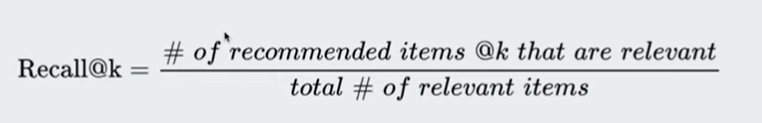

In [88]:
image_recall_k = 'Recall@k.png'

# Display the image
Image(filename=image_recall_k)

In [89]:
from collections import defaultdict

# a dict that stores a list of predicted rating and actual rating pair for each user 
user_est_true = defaultdict(list)

# iterate through the validation data to build the user-> [(y1, y1_hat), (y2, y2_hat)...]   
with torch.no_grad():
    for i, batched_data in enumerate(validation_loader): 
        users = batched_data['users']
        animes = batched_data['animes']
        ratings = batched_data['ratings']
        
        model_output = model(batched_data['users'], batched_data["animes"])

        for i in range(len(users)):
            user_id = users[i].item()
            anime_id = animes[i].item() 
            pred_rating = model_output[i][0].item()
            true_rating = ratings[i].item()
            
            print(f"{user_id}, {anime_id}, {pred_rating}, {true_rating}")
            user_est_true[user_id].append((pred_rating, true_rating))

6666, 111, 7.2139081954956055, 8
8167, 7, 7.755074977874756, 8
6023, 6898, 7.56721305847168, 6
6272, 352, 7.0357537269592285, 9
721, 874, 7.738584518432617, 8
7962, 1427, 8.23026180267334, 9
4648, 3422, 9.354463577270508, 8
7696, 246, 8.073415756225586, 8
2804, 352, 7.572820663452148, 9
147, 4066, 7.7128190994262695, 9
133, 530, 8.06439208984375, 9
4400, 2373, 7.439037799835205, 7
6631, 228, 7.13123893737793, 7
3971, 5901, 7.556771755218506, 7
6612, 3735, 7.278695583343506, 8
3868, 437, 6.323455333709717, 6
2758, 2928, 7.022250175476074, 8
4433, 1358, 6.803976058959961, 7
129, 49, 6.619315147399902, 4
877, 7581, 7.243577003479004, 8
1799, 10511, 8.944087982177734, 10
6017, 197, 5.641323566436768, 6
3294, 7267, 8.261457443237305, 8
552, 1591, 5.802204608917236, 6
2193, 14, 8.969267845153809, 10
5839, 5439, 8.963295936584473, 8
7529, 1331, 6.707517147064209, 6
4761, 9362, 5.228487491607666, 8
2522, 202, 9.118646621704102, 9
3691, 2279, 6.539907455444336, 7
2591, 5307, 9.668035507202148, 

4700, 4359, 7.842184543609619, 8
1554, 296, 7.190380573272705, 10
7003, 1562, 8.072522163391113, 9
4702, 7026, 9.256712913513184, 10
1204, 1393, 7.927587032318115, 6
4062, 1233, 7.017068862915039, 7
3526, 4595, 8.366842269897461, 8
2471, 4290, 9.400683403015137, 10
3872, 1846, 6.544539928436279, 6
4291, 5777, 8.178346633911133, 10
2392, 246, 8.037050247192383, 9
2548, 2497, 7.308421611785889, 10
1306, 184, 8.1663818359375, 10
7082, 3813, 6.080191135406494, 7
7719, 626, 6.003887176513672, 7
6185, 14, 8.492780685424805, 7
5520, 2279, 7.087045192718506, 6
5886, 1850, 8.604066848754883, 8
151, 1418, 7.278278350830078, 8
2335, 860, 8.266502380371094, 8
482, 3199, 7.056519031524658, 7
7679, 1534, 9.063726425170898, 10
5779, 385, 8.22340202331543, 7
6116, 2770, 6.257340431213379, 7
1208, 185, 7.9301533699035645, 9
2306, 2928, 8.780766487121582, 8
4838, 144, 7.3787431716918945, 8
580, 181, 5.54310941696167, 4
2305, 1455, 7.7179341316223145, 7
69, 217, 5.851267337799072, 6
860, 145, 8.026206016

1686, 1236, 8.182631492614746, 8
877, 3589, 7.857283592224121, 9
1120, 5647, 8.125356674194336, 7
3139, 2870, 4.671026229858398, 5
4483, 1, 9.321085929870605, 4
7526, 823, 7.754563331604004, 10
4241, 1038, 8.46394157409668, 9
765, 3094, 8.46155071258545, 7
4980, 543, 6.943539619445801, 3
1279, 2512, 8.133244514465332, 7
4016, 1542, 8.26189136505127, 8
4078, 73, 7.359636306762695, 7
7519, 1568, 8.530052185058594, 8
4419, 2382, 8.640388488769531, 5
8110, 431, 6.880697727203369, 5
4690, 179, 7.312793731689453, 10
295, 8809, 5.575812816619873, 4
2418, 457, 8.38247013092041, 10
6780, 3781, 7.496993064880371, 8
5945, 770, 8.59620475769043, 9
90, 3107, 8.723686218261719, 9
4331, 58, 6.037534236907959, 5
7641, 1393, 8.627433776855469, 10
4140, 3821, 8.80643367767334, 9
1350, 5181, 7.220279216766357, 8
4836, 756, 7.327704429626465, 8
4481, 3278, 5.965675354003906, 8
2687, 9523, 7.398197174072266, 7
1193, 159, 8.198360443115234, 8
2712, 489, 7.3384528160095215, 7
6094, 46, 8.871365547180176, 8
4

349, 1389, 6.567285060882568, 6
1868, 7267, 8.796226501464844, 9
2332, 560, 9.221525192260742, 8
996, 7460, 7.747398376464844, 9
2107, 1560, 7.410317897796631, 8
3977, 7171, 6.356452941894531, 7
1885, 7223, 8.441484451293945, 9
364, 249, 7.9077606201171875, 9
2889, 4065, 8.898502349853516, 9
1244, 910, 6.471146583557129, 5
1244, 1251, 7.398589611053467, 9
303, 341, 7.227183818817139, 7
2527, 879, 6.458222389221191, 9
7770, 144, 8.291633605957031, 9
800, 3781, 7.0152587890625, 8
192, 203, 8.996826171875, 8
1142, 7338, 7.421450614929199, 8
1890, 2693, 9.313045501708984, 9
4546, 1422, 8.680938720703125, 8
4909, 1393, 8.302255630493164, 7
7777, 282, 7.723830223083496, 8
2785, 4247, 7.6945319175720215, 8
5047, 7069, 6.2530059814453125, 7
1683, 5816, 8.199606895446777, 9
926, 1822, 8.101537704467773, 9
4150, 8172, 6.5191426277160645, 6
4150, 5163, 6.009576797485352, 4
6927, 479, 6.818537712097168, 8
1101, 2626, 8.638900756835938, 9
7828, 10, 7.943329334259033, 9
3356, 6629, 4.92883825302124,

6890, 10832, 8.81753921508789, 9
864, 6630, 7.48234224319458, 7
6598, 177, 7.094415664672852, 7
4139, 239, 8.270901679992676, 6
1814, 195, 6.071712493896484, 3
7242, 226, 9.681661605834961, 6
3618, 384, 7.5043487548828125, 7
6981, 3531, 7.447114944458008, 9
1733, 8067, 7.8924560546875, 7
2163, 215, 8.937593460083008, 8
3657, 4287, 8.789154052734375, 10
1072, 3796, 5.959738731384277, 8
4457, 2073, 7.854189872741699, 7
5353, 44, 6.59664249420166, 9
5849, 8663, 6.8236541748046875, 8
2960, 4804, 7.454617500305176, 7
3356, 6064, 4.791166305541992, 7
4072, 312, 6.683467864990234, 8
60, 49, 8.351418495178223, 6
3824, 1393, 7.914662837982178, 1
6427, 1432, 7.715075492858887, 7
2407, 1842, 8.147923469543457, 8
7835, 227, 8.280431747436523, 8
4402, 73, 7.537849426269531, 9
4585, 245, 9.088515281677246, 9
8015, 772, 7.863648414611816, 10
111, 9380, 7.3163299560546875, 7
2881, 2370, 7.821225643157959, 8
5799, 1573, 7.715245723724365, 9
129, 1388, 7.467831611633301, 6
2431, 166, 6.590814113616943, 

2800, 3504, 8.006531715393066, 9
925, 10778, 7.828901290893555, 8
456, 381, 6.988168239593506, 9
7041, 1, 8.475776672363281, 8
2133, 1706, 6.324936389923096, 7
3459, 332, 7.609684944152832, 8
5437, 1090, 7.843470573425293, 7
6243, 494, 7.170053005218506, 8
6226, 368, 8.587911605834961, 7
2563, 69, 8.182171821594238, 7
5499, 167, 7.907613754272461, 7
2202, 3436, 7.8470845222473145, 8
7432, 78, 7.8614983558654785, 10
4429, 442, 6.447318077087402, 7
2957, 501, 7.29892635345459, 10
3491, 6364, 5.982114791870117, 6
4960, 100, 8.218728065490723, 9
1733, 2374, 7.55028772354126, 6
6264, 255, 8.172317504882812, 9
3374, 2894, 6.9327874183654785, 7
7677, 3665, 8.85314655303955, 8
7214, 3763, 6.143198490142822, 5
2957, 335, 6.471551895141602, 7
7252, 77, 7.822505950927734, 8
1257, 0, 8.81246566772461, 10
650, 654, 6.984533786773682, 7
5680, 1778, 6.824577808380127, 6
4627, 1431, 7.811527252197266, 8
1943, 266, 8.012056350708008, 9
7878, 135, 6.838298797607422, 8
7719, 3445, 5.937285900115967, 7
79

7543, 3821, 8.814679145812988, 10
4224, 3174, 6.89290189743042, 10
1306, 5035, 7.97949743270874, 5
4992, 4187, 8.932564735412598, 9
2678, 26, 9.29328441619873, 10
5339, 804, 7.873513221740723, 8
432, 766, 9.032981872558594, 10
2165, 355, 7.428311347961426, 6
3403, 742, 7.509336948394775, 7
2580, 1819, 8.4064359664917, 6
647, 740, 7.285189151763916, 7
1183, 4663, 8.815524101257324, 10
6545, 372, 8.718223571777344, 8
2581, 1702, 6.465118885040283, 4
220, 118, 8.931446075439453, 9
7197, 1016, 6.276917457580566, 7
1310, 7431, 6.424990653991699, 7
5625, 7566, 7.279122352600098, 7
1719, 154, 8.315805435180664, 9
2548, 102, 6.958905220031738, 8
2810, 9820, 7.9609222412109375, 7
734, 1110, 7.190614700317383, 7
7845, 4300, 7.512876987457275, 7
7532, 2867, 6.397045135498047, 5
6949, 384, 8.010583877563477, 8
1070, 491, 6.924848556518555, 6
5443, 6355, 6.142710208892822, 7
4129, 77, 7.447548866271973, 8
3941, 3821, 9.6207914352417, 9
6574, 543, 5.0332350730896, 6
7423, 9762, 7.085634708404541, 8


4005, 2, 7.144237518310547, 8
525, 4187, 9.00037956237793, 8
3805, 2873, 7.698857307434082, 8
7776, 447, 8.239110946655273, 8
853, 236, 5.940885543823242, 7
1337, 2427, 6.8834757804870605, 10
5626, 7460, 7.611581325531006, 8
2164, 4394, 6.7355170249938965, 7
5689, 3084, 7.293245315551758, 7
6687, 3716, 7.309366703033447, 5
6686, 332, 7.715714454650879, 8
708, 1095, 6.974421977996826, 7
6235, 2053, 6.733110427856445, 5
1148, 825, 6.996163845062256, 9
6093, 1539, 8.43908405303955, 9
1942, 404, 7.9255757331848145, 9
1184, 9621, 6.946348667144775, 7
3061, 2544, 6.704346179962158, 6
982, 2626, 8.639630317687988, 10
4743, 734, 8.297650337219238, 10
118, 35, 6.930068492889404, 8
6639, 42, 7.749905586242676, 8
3009, 246, 8.238260269165039, 8
7986, 3678, 5.867794990539551, 9
5198, 5133, 6.2816643714904785, 8
4908, 1053, 5.351387977600098, 3
1763, 425, 7.979135513305664, 5
1287, 276, 6.770869255065918, 6
3501, 1919, 8.331497192382812, 7
800, 883, 7.3217973709106445, 8
5076, 537, 8.95625686645507

3297, 2699, 4.130971908569336, 4
5539, 221, 8.23852825164795, 9
2907, 3821, 10.222286224365234, 10
6115, 1972, 8.50137996673584, 8
7888, 7097, 7.741799831390381, 6
3766, 7926, 7.393050193786621, 7
6470, 200, 7.4608612060546875, 8
3525, 20, 7.624959945678711, 10
246, 1775, 6.119884490966797, 5
1070, 7543, 8.48907470703125, 10
240, 815, 6.867221355438232, 7
5418, 5866, 8.320108413696289, 8
6569, 1850, 8.357078552246094, 10
4448, 403, 7.3892364501953125, 10
7024, 789, 9.990106582641602, 10
4029, 1129, 7.269838809967041, 6
3088, 168, 7.274195194244385, 10
4405, 3488, 6.529411315917969, 8
148, 3161, 5.797483444213867, 6
1005, 1145, 7.49959659576416, 6
3824, 240, 7.883999824523926, 10
1441, 1431, 6.959418773651123, 9
2606, 1360, 6.841477870941162, 8
1148, 1653, 9.108658790588379, 8
2312, 5547, 7.557283401489258, 7
1441, 856, 6.885557651519775, 7
7024, 4420, 10.970300674438477, 10
6832, 5344, 8.728370666503906, 9
2171, 404, 8.106422424316406, 9
1047, 239, 8.660289764404297, 9
6437, 100, 7.893

8119, 26, 7.767338275909424, 8
5043, 774, 8.963207244873047, 9
2790, 10347, 7.4622273445129395, 9
3248, 245, 7.9540510177612305, 9
8079, 1843, 7.690680503845215, 8
2223, 41, 8.335432052612305, 8
5798, 2662, 6.861102104187012, 8
1444, 6645, 7.4211578369140625, 8
996, 7890, 6.452028751373291, 8
81, 10162, 6.101197719573975, 7
2690, 7846, 7.938106536865234, 8
6442, 1858, 5.928295135498047, 6
5530, 8403, 7.480306148529053, 8
1294, 4567, 7.687394142150879, 7
2140, 5515, 6.967788219451904, 6
1091, 4294, 7.289374351501465, 7
134, 128, 6.288443088531494, 5
579, 4039, 7.524871349334717, 8
2872, 176, 8.521505355834961, 9
1504, 9163, 7.915097713470459, 10
4757, 2044, 9.04239559173584, 9
172, 88, 6.169739246368408, 6
6276, 40, 7.367571830749512, 6
4009, 457, 7.548628807067871, 7
3187, 1542, 9.038458824157715, 10
2899, 201, 6.653243541717529, 6
4004, 1132, 7.109767436981201, 8
5904, 6508, 6.252519130706787, 6
5160, 128, 7.870114326477051, 8
7836, 4638, 7.881291389465332, 7
3748, 118, 10.17760848999

5839, 5509, 7.944758415222168, 10
4398, 4654, 4.473808288574219, 4
112, 30, 7.372074604034424, 7
7079, 1585, 7.414887428283691, 5
4191, 9360, 6.381030082702637, 7
4721, 3790, 6.710389137268066, 6
656, 53, 7.4068145751953125, 9
2203, 20, 7.858152389526367, 9
7856, 10625, 6.983162879943848, 8
3142, 344, 7.8571271896362305, 7
840, 10187, 7.993738651275635, 8
2175, 6133, 5.802644729614258, 6
578, 89, 5.3032941818237305, 4
81, 4369, 7.694767951965332, 8
1072, 7763, 5.372142791748047, 3
5338, 10395, 6.147440433502197, 6
650, 99, 7.315903663635254, 8
4138, 166, 5.478456974029541, 7
2950, 1649, 7.918872833251953, 8
5043, 404, 9.809741973876953, 9
6367, 509, 7.7408671379089355, 9
7107, 550, 7.932724475860596, 7
2129, 2457, 8.123779296875, 9
812, 753, 7.150156497955322, 8
4966, 9950, 5.555697917938232, 7
1386, 99, 8.416960716247559, 9
219, 5867, 6.649052143096924, 8
1366, 2, 8.214598655700684, 9
1627, 978, 6.887094974517822, 6
4824, 0, 9.47866153717041, 9
2051, 1427, 8.598405838012695, 10
7970, 

3501, 6640, 7.646964073181152, 6
5431, 1072, 7.658544063568115, 9
827, 67, 6.703340530395508, 8
2973, 5244, 6.2615885734558105, 8
7940, 1934, 6.796214580535889, 6
7898, 168, 7.899109840393066, 8
1332, 1419, 8.268682479858398, 8
3667, 8647, 7.659295558929443, 4
642, 1458, 7.7269439697265625, 7
6281, 5439, 8.534578323364258, 9
6362, 356, 7.955880641937256, 6
3560, 1445, 9.239845275878906, 10
1642, 7490, 7.076291084289551, 5
1672, 1421, 6.531025409698486, 9
3978, 822, 7.537834167480469, 8
3766, 226, 7.8040571212768555, 8
1723, 6786, 7.444867134094238, 8
2973, 5455, 5.984207630157471, 7
226, 8165, 8.01859188079834, 10
3036, 8934, 5.991327285766602, 6
5769, 3321, 6.793673992156982, 6
350, 261, 6.881290912628174, 7
1613, 440, 9.127728462219238, 10
167, 555, 5.636624336242676, 6
2230, 386, 6.127852916717529, 7
6903, 1716, 7.535260200500488, 1
462, 2693, 7.360023498535156, 8
5372, 8838, 8.223072052001953, 8
7528, 938, 6.470241546630859, 8
7110, 672, 6.703265190124512, 8
6617, 2560, 6.397057533

5380, 1393, 9.306709289550781, 10
2075, 225, 7.407964706420898, 9
3463, 10310, 6.604978084564209, 6
4213, 7407, 9.109353065490723, 9
7074, 5845, 8.173955917358398, 8
4838, 1981, 5.822993278503418, 2
5057, 10357, 5.5684027671813965, 7
591, 1945, 7.485065937042236, 7
6296, 6692, 7.644817352294922, 8
5160, 6266, 8.135963439941406, 8
6558, 243, 8.087552070617676, 9
2160, 20, 8.884207725524902, 10
977, 2681, 8.759787559509277, 9
7550, 4289, 7.904474258422852, 7
7418, 8789, 7.299434185028076, 7
1323, 7033, 7.206132411956787, 7
3109, 809, 5.769068241119385, 1
7391, 1573, 7.662654876708984, 8
4790, 3457, 8.011935234069824, 8
3264, 499, 7.131718635559082, 9
6374, 965, 6.301137447357178, 4
4392, 968, 7.884951114654541, 8
4029, 3670, 6.5189619064331055, 7
7394, 14, 8.246617317199707, 9
1717, 6378, 8.047846794128418, 8
6218, 5636, 7.887871742248535, 9
1358, 228, 8.317131996154785, 8
1780, 5791, 7.890753269195557, 8
3908, 6967, 8.412263870239258, 7
7766, 3444, 4.929111003875732, 4
873, 483, 9.12643

2990, 10, 7.868548393249512, 7
5854, 890, 7.737821578979492, 7
1868, 217, 7.220595836639404, 9
4366, 3534, 7.591904163360596, 7
5487, 5526, 6.7408127784729, 5
1784, 6048, 9.554553985595703, 10
1441, 47, 6.724874496459961, 8
3040, 9535, 6.728256702423096, 8
7693, 9857, 6.986730575561523, 7
2230, 216, 7.101451396942139, 8
365, 549, 8.209022521972656, 7
6479, 535, 7.113097190856934, 8
3900, 3166, 9.286053657531738, 9
915, 7915, 7.914700984954834, 9
4343, 10589, 5.301590919494629, 7
5298, 5299, 8.048864364624023, 7
5991, 166, 6.928971767425537, 10
6017, 8580, 6.17338228225708, 6
5292, 1945, 5.998244285583496, 6
1070, 293, 7.772195816040039, 7
5886, 131, 8.727519989013672, 10
3405, 3978, 5.7326130867004395, 4
6598, 447, 6.780473709106445, 5
7329, 939, 8.268630027770996, 9
874, 15, 8.06490707397461, 7
3869, 2993, 5.889174461364746, 4
1870, 1847, 7.469221591949463, 8
5230, 8821, 7.116410255432129, 5
1795, 4300, 6.422392845153809, 7
1055, 319, 7.079834938049316, 9
5872, 7501, 6.297769546508789

6705, 5509, 8.033981323242188, 9
3314, 456, 8.305791854858398, 8
4899, 772, 6.1839823722839355, 10
4025, 409, 8.019403457641602, 8
7300, 9716, 8.722347259521484, 8
8043, 8017, 7.258872985839844, 6
7301, 5366, 9.542220115661621, 9
2039, 8657, 7.565220355987549, 9
1243, 592, 6.861416816711426, 9
6278, 1235, 10.574277877807617, 10
991, 889, 9.448551177978516, 10
3314, 1401, 6.761021614074707, 9
3016, 803, 5.7255377769470215, 7
294, 6141, 7.633181571960449, 7
3281, 8372, 7.017951965332031, 7
2670, 421, 5.388566970825195, 5
4213, 9, 9.394623756408691, 8
3748, 293, 9.55179500579834, 10
921, 6169, 6.680119514465332, 8
143, 774, 7.539646625518799, 9
7717, 480, 8.425189971923828, 8
4387, 770, 8.250876426696777, 8
6160, 3303, 7.238397598266602, 8
5419, 3765, 7.588062286376953, 9
8144, 1649, 7.781062126159668, 8
1083, 509, 8.043296813964844, 9
1900, 6629, 6.252015113830566, 8
4457, 548, 8.392868995666504, 5
3127, 239, 9.298871040344238, 10
3543, 6531, 7.359731197357178, 9
2281, 1353, 7.2635579109

5689, 244, 8.498687744140625, 7
7713, 1552, 7.574143409729004, 7
5336, 2857, 7.612067222595215, 7
4848, 1922, 7.6588544845581055, 9
3127, 5064, 7.543581485748291, 7
3962, 26, 7.6274094581604, 8
1692, 1565, 7.103192329406738, 6
1854, 3192, 7.352931976318359, 7
7257, 6395, 6.593871593475342, 6
2732, 2188, 7.389019966125488, 8
6989, 365, 9.432500839233398, 8
4002, 77, 8.693916320800781, 9
5156, 101, 7.35018253326416, 7
3093, 0, 8.234111785888672, 10
1563, 520, 7.697876930236816, 7
650, 4178, 7.656698703765869, 7
3092, 1437, 6.877053260803223, 7
111, 874, 7.270003318786621, 8
4804, 3929, 8.081978797912598, 8
6178, 6539, 7.475614547729492, 6
1260, 33, 7.871592998504639, 7
3941, 1649, 8.26520824432373, 7
4240, 6669, 7.246951103210449, 8
8026, 1171, 7.297417163848877, 8
3998, 3881, 7.179619789123535, 9
852, 9142, 6.134718894958496, 5
2318, 228, 7.459123611450195, 8
7939, 2392, 7.689745903015137, 7
7418, 5498, 7.209137916564941, 7
5287, 409, 7.493196487426758, 5
2132, 3821, 9.067258834838867, 

5942, 1068, 7.049549102783203, 8
1199, 1542, 8.462257385253906, 9
2220, 392, 7.390084743499756, 6
4346, 348, 8.555685997009277, 10
1660, 764, 8.443181991577148, 10
5763, 315, 7.265665054321289, 10
1966, 1504, 6.4490461349487305, 5
636, 298, 7.985145092010498, 9
4400, 409, 8.022340774536133, 9
2399, 4068, 8.994955062866211, 9
6075, 3784, 6.908766746520996, 7
755, 1535, 7.273566246032715, 8
5964, 123, 5.686205863952637, 7
5287, 8207, 7.563498497009277, 8
1615, 770, 9.508099555969238, 8
5727, 7431, 7.287776470184326, 9
7271, 476, 6.8534746170043945, 7
1481, 846, 8.57054615020752, 7
2619, 4441, 5.383212089538574, 6
3910, 728, 9.76617431640625, 7
6356, 1281, 7.150765419006348, 8
2962, 3504, 7.54356575012207, 8
5687, 846, 9.0421142578125, 9
55, 540, 8.02474594116211, 10
1302, 248, 7.163679122924805, 7
3351, 7322, 6.713476181030273, 7
2997, 263, 7.743505001068115, 6
3054, 8287, 8.020829200744629, 6
6315, 580, 9.054630279541016, 9
7470, 809, 6.775886058807373, 7
2051, 4832, 8.049532890319824, 

2212, 7281, 7.759286880493164, 7
2070, 1723, 7.6132097244262695, 5
179, 20, 7.948826789855957, 8
4793, 35, 7.3985209465026855, 8
5712, 450, 7.531749248504639, 9
819, 246, 7.430026054382324, 7
1360, 655, 7.561992645263672, 7
5838, 2985, 5.952768802642822, 2
577, 1381, 6.725820541381836, 8
5424, 1979, 8.380773544311523, 8
6374, 9702, 7.347838401794434, 7
4612, 509, 8.20220947265625, 10
2730, 8825, 9.23394775390625, 9
3723, 185, 8.61244010925293, 7
7304, 332, 7.844525337219238, 10
3721, 21, 6.620991230010986, 6
2721, 6382, 5.088926792144775, 5
6925, 2024, 8.339157104492188, 7
1808, 2623, 7.637571334838867, 6
364, 3070, 7.426354885101318, 6
4341, 1394, 6.7492356300354, 9
2262, 1379, 7.690637588500977, 9
3701, 654, 8.321256637573242, 8
727, 823, 7.641551494598389, 8
5472, 5342, 8.527182579040527, 10
3980, 245, 7.615303993225098, 8
3744, 296, 6.524029731750488, 8
2140, 8763, 6.715435028076172, 7
6266, 172, 6.850889205932617, 9
7849, 4187, 7.352659225463867, 9
384, 246, 7.5894622802734375, 8


2988, 9271, 8.123558044433594, 6
3490, 7460, 7.6418232917785645, 9
5464, 8994, 6.7436137199401855, 5
7436, 924, 6.758176803588867, 7
223, 17, 5.811038970947266, 4
4368, 100, 9.163766860961914, 10
563, 293, 7.7074408531188965, 10
656, 6379, 7.451925277709961, 8
1814, 7362, 5.405791282653809, 4
2213, 166, 7.186683177947998, 9
4062, 7915, 7.555298328399658, 9
4459, 348, 8.476822853088379, 8
499, 61, 8.107197761535645, 8
319, 6859, 7.510836601257324, 8
364, 602, 8.739843368530273, 8
1900, 734, 6.99913215637207, 6
349, 994, 6.9831109046936035, 5
554, 131, 6.672756195068359, 7
7461, 759, 6.771127700805664, 7
1146, 4072, 9.332479476928711, 8
6649, 3864, 7.4690093994140625, 7
3559, 1789, 8.172654151916504, 8
6232, 32, 6.442514419555664, 9
5361, 1431, 7.673488140106201, 7
3453, 10, 7.5171284675598145, 8
7079, 221, 8.114287376403809, 8
8059, 4567, 9.401338577270508, 9
5732, 299, 8.088920593261719, 7
1664, 5647, 7.4709553718566895, 6
6096, 1159, 6.244801044464111, 6
5817, 439, 7.593301773071289, 

89, 109, 8.047592163085938, 9
4353, 1819, 8.743743896484375, 10
100, 764, 8.614885330200195, 9
3332, 4659, 8.875110626220703, 10
2957, 17, 6.709723472595215, 6
5661, 3139, 6.173211574554443, 8
7356, 6731, 7.428568363189697, 10
5653, 9267, 6.34930944442749, 7
1630, 867, 7.2820940017700195, 10
6455, 49, 6.324472427368164, 5
4306, 9458, 7.719299793243408, 8
6779, 490, 8.61684799194336, 5
6466, 15, 7.092077732086182, 8
6876, 3080, 9.029069900512695, 10
6826, 2193, 6.701741695404053, 9
162, 4112, 6.906260967254639, 8
6771, 6356, 7.201618194580078, 6
5924, 6578, 8.487350463867188, 9
2860, 23, 9.54369068145752, 9
3806, 1016, 6.441877841949463, 6
1131, 9885, 7.84619140625, 7
6891, 3792, 5.256808280944824, 6
6936, 1314, 7.15222692489624, 8
386, 267, 6.571315288543701, 7
5208, 570, 5.865652561187744, 6
471, 151, 6.840719223022461, 8
5899, 17, 7.710403919219971, 7
5174, 6980, 9.353815078735352, 9
896, 305, 8.501884460449219, 7
3049, 4659, 7.630033493041992, 8
4992, 1562, 7.936246871948242, 9
2203

4977, 2894, 7.518457412719727, 7
3641, 72, 7.5591020584106445, 5
7497, 580, 7.534164905548096, 8
7246, 3443, 6.517988681793213, 8
7702, 596, 8.167362213134766, 9
6804, 6594, 6.745984077453613, 8
3119, 8697, 7.161454200744629, 7
1231, 6146, 7.637832164764404, 8
4273, 302, 6.795961856842041, 6
4848, 807, 7.426098346710205, 5
6374, 867, 7.546133041381836, 8
6455, 2512, 7.3927001953125, 9
1859, 245, 8.029159545898438, 8
314, 85, 7.862745761871338, 7
6797, 274, 6.2491774559021, 8
3511, 809, 6.283043384552002, 7
2063, 224, 8.005692481994629, 6
7506, 1543, 8.082557678222656, 9
3743, 1253, 7.1427903175354, 7
7054, 3738, 7.373269081115723, 8
4489, 274, 6.674150466918945, 6
6994, 490, 7.401524066925049, 10
7687, 6169, 7.88743257522583, 7
7461, 360, 7.6320319175720215, 6
652, 582, 6.764111042022705, 2
6836, 202, 8.752693176269531, 9
5391, 245, 8.816347122192383, 10
7202, 3912, 6.940274238586426, 8
6393, 176, 8.890768051147461, 9
7836, 1999, 7.1432952880859375, 6
852, 4359, 6.463899612426758, 7
79

4476, 3685, 9.460342407226562, 10
104, 9715, 9.26361083984375, 9
2442, 10248, 6.939559459686279, 6
4193, 211, 9.079349517822266, 10
2181, 2370, 7.05681037902832, 8
3572, 9566, 7.748075008392334, 9
8102, 1536, 8.2849760055542, 8
5881, 5333, 6.444584846496582, 7
7237, 1393, 8.85106372833252, 10
350, 10312, 6.921835899353027, 7
1332, 5363, 7.661510467529297, 9
2779, 589, 8.0630521774292, 7
2305, 205, 8.108808517456055, 8
6615, 4178, 8.148894309997559, 7
6951, 7431, 7.67890739440918, 7
1979, 58, 7.1086835861206055, 8
6927, 5344, 7.585430145263672, 7
6228, 728, 8.613786697387695, 7
3757, 6358, 7.2413859367370605, 7
2606, 1036, 7.29725980758667, 6
3314, 8103, 7.607072830200195, 6
2715, 3504, 6.698941707611084, 7
4893, 9473, 6.379871368408203, 6
151, 5569, 6.1008100509643555, 6
1317, 3287, 5.43264627456665, 6
3812, 1, 7.93684196472168, 9
208, 1121, 7.814754009246826, 6
6352, 143, 8.349905014038086, 7
2567, 6393, 7.59246301651001, 6
2140, 8679, 6.030602931976318, 7
1807, 5708, 5.94198894500732

4108, 7562, 6.110134124755859, 7
3757, 2056, 8.997640609741211, 10
708, 216, 8.378389358520508, 9
7960, 456, 7.736629009246826, 10
3566, 2056, 8.098198890686035, 9
3208, 1850, 8.075984954833984, 9
4432, 1415, 6.794083118438721, 7
7079, 182, 7.674959659576416, 8
4056, 9124, 6.719125747680664, 7
1539, 79, 5.318498611450195, 6
2453, 55, 7.760533809661865, 9
162, 448, 7.864151477813721, 9
4562, 1943, 8.563447952270508, 7
3114, 7562, 7.746701240539551, 10
2203, 560, 7.761268615722656, 6
5328, 497, 5.813532829284668, 3
6574, 10022, 4.948776721954346, 4
2448, 655, 9.427573204040527, 7
3306, 783, 6.817770481109619, 8
6275, 2095, 7.226120948791504, 8
2545, 3182, 7.001983165740967, 8
1504, 8253, 7.540276527404785, 6
472, 306, 6.9527740478515625, 5
4150, 7369, 6.504849910736084, 7
5938, 4405, 7.617749214172363, 7
1255, 1133, 7.062228202819824, 8
6865, 312, 8.487442016601562, 5
6542, 428, 9.396256446838379, 9
2576, 928, 9.954496383666992, 10
2686, 3165, 8.863990783691406, 9
5916, 243, 8.7468414306

6643, 6353, 9.251867294311523, 8
5515, 263, 6.773142337799072, 8
7087, 1695, 8.150508880615234, 6
4751, 10704, 5.990364074707031, 7
7197, 284, 6.823598861694336, 5
2140, 6759, 7.325961589813232, 7
5895, 1038, 8.637613296508789, 8
482, 1469, 7.7385993003845215, 7
6104, 3739, 6.824396133422852, 6
5410, 2951, 7.6309685707092285, 10
1962, 1320, 7.269712448120117, 8
6789, 1379, 8.335268020629883, 9
2365, 4, 6.8675150871276855, 7
8144, 4369, 8.333242416381836, 8
5333, 3928, 7.5100860595703125, 7
3221, 319, 7.4464545249938965, 7
8134, 884, 6.986255645751953, 7
949, 530, 8.765366554260254, 10
3131, 8892, 5.560272693634033, 5
2402, 9271, 8.186210632324219, 9
95, 471, 6.1829423904418945, 5
1724, 4246, 7.529081344604492, 6
2260, 7772, 7.4639482498168945, 9
6688, 1369, 7.8325324058532715, 7
2960, 170, 7.184929847717285, 9
6617, 100, 7.75054931640625, 7
6582, 1431, 8.475704193115234, 9
989, 660, 8.053949356079102, 8
6044, 5087, 7.018627166748047, 4
5527, 371, 6.266149044036865, 6
5530, 1010, 5.8705

2711, 164, 7.321508407592773, 8
874, 175, 8.400070190429688, 7
5174, 8880, 8.682682991027832, 10
3064, 5737, 6.7929863929748535, 6
7699, 10274, 8.08951473236084, 7
5633, 5407, 8.148272514343262, 7
2930, 300, 6.950055122375488, 6
5707, 213, 6.2377753257751465, 2
2654, 1792, 8.597925186157227, 8
3873, 9384, 6.889448165893555, 8
8180, 546, 8.154481887817383, 10
147, 836, 5.847490310668945, 7
4017, 6845, 7.988114356994629, 8
4155, 244, 8.857903480529785, 10
6048, 372, 7.939236164093018, 9
6008, 479, 7.228695392608643, 10
7205, 15, 6.7998857498168945, 2
2070, 211, 9.064606666564941, 10
6216, 8106, 6.851866245269775, 6
6232, 2626, 8.708026885986328, 9
4992, 425, 7.120179176330566, 9
1817, 1090, 8.458993911743164, 9
1281, 1615, 6.891453742980957, 5
5037, 448, 7.821094989776611, 6
652, 273, 7.417571544647217, 8
3640, 520, 6.254748344421387, 6
6664, 5691, 6.771002292633057, 7
578, 42, 5.147738456726074, 6
5419, 2052, 8.392183303833008, 8
598, 5848, 9.020029067993164, 10
1528, 490, 7.71430397033

7839, 47, 9.143638610839844, 8
3617, 717, 7.406749725341797, 9
447, 3470, 7.599625587463379, 9
118, 409, 8.021424293518066, 9
3451, 169, 7.073074817657471, 6
1564, 3427, 9.01419734954834, 10
686, 8704, 6.534951210021973, 6
3334, 867, 7.534193992614746, 9
5570, 2706, 8.850604057312012, 8
3624, 351, 5.778836250305176, 4
1814, 1381, 5.410592079162598, 8
5378, 159, 8.060577392578125, 8
294, 179, 7.438101768493652, 10
1447, 8134, 8.572961807250977, 9
4719, 1090, 8.065664291381836, 7
5763, 989, 7.01609468460083, 7
6815, 6932, 6.48182487487793, 4
2519, 4420, 7.551037311553955, 7
4197, 604, 7.819159507751465, 8
6432, 5151, 8.267252922058105, 8
5731, 411, 6.466551303863525, 5
4150, 2137, 5.157649993896484, 1
2277, 404, 8.21358585357666, 7
7803, 79, 7.014795780181885, 9
3209, 749, 9.23127269744873, 10
509, 1413, 6.528332710266113, 6
7171, 6143, 8.583499908447266, 9
4013, 529, 6.949479579925537, 7
6642, 2578, 8.672521591186523, 7
2670, 111, 5.980912208557129, 8
1302, 146, 6.839858055114746, 7
708

4723, 233, 5.580392837524414, 5
3179, 128, 6.869270324707031, 8
5403, 388, 8.237103462219238, 10
2394, 5884, 8.303983688354492, 10
577, 542, 8.146297454833984, 9
1814, 4228, 5.917840957641602, 8
3657, 799, 9.256576538085938, 9
5070, 100, 9.085461616516113, 10
171, 142, 8.747759819030762, 8
2679, 4159, 8.068653106689453, 9
788, 3981, 7.021828651428223, 6
2475, 1024, 7.586816310882568, 8
6735, 2705, 7.935348987579346, 9
1383, 93, 8.18496036529541, 10
3295, 49, 7.109758377075195, 7
1420, 1694, 6.806025505065918, 8
4739, 1122, 7.04572057723999, 5
6361, 221, 8.558151245117188, 9
7939, 3806, 6.763628005981445, 8
7468, 3109, 7.306896686553955, 8
7758, 166, 7.3406291007995605, 10
3757, 152, 6.606112480163574, 8
4789, 99, 7.289211273193359, 6
6268, 213, 8.008106231689453, 8
2458, 2087, 6.815592288970947, 6
4702, 499, 8.567879676818848, 7
808, 648, 6.65142822265625, 8
2502, 2969, 5.55893611907959, 7
5208, 6276, 5.538654804229736, 5
150, 447, 7.6752824783325195, 9
111, 6869, 7.445431232452393, 7


4571, 332, 6.6706037521362305, 7
3766, 9657, 6.9125142097473145, 6
5627, 3404, 7.489255428314209, 7
6033, 515, 6.426408767700195, 7
3860, 1393, 8.584864616394043, 10
656, 3303, 7.067334175109863, 8
547, 848, 7.269258499145508, 10
879, 332, 7.52775239944458, 5
6491, 2177, 7.042102813720703, 9
5047, 3365, 5.50555944442749, 2
6135, 1, 8.100690841674805, 8
3856, 964, 8.026144981384277, 10
252, 839, 7.933737754821777, 5
4459, 519, 7.112046241760254, 8
5620, 8090, 9.448342323303223, 10
5260, 9476, 7.005956172943115, 8
190, 732, 6.815723419189453, 5
111, 3452, 6.507046699523926, 7
3667, 142, 8.87255859375, 10
7624, 1418, 8.335250854492188, 9
5855, 88, 6.640036582946777, 5
701, 509, 8.003131866455078, 8
6394, 1656, 5.973358631134033, 4
326, 6092, 7.299389362335205, 9
560, 75, 7.681217193603516, 7
4573, 3504, 6.731380939483643, 4
3460, 1975, 6.370109558105469, 8
7918, 4242, 6.852349281311035, 1
3624, 3250, 5.440335273742676, 2
7503, 20, 7.565701484680176, 9
4375, 9361, 5.642739295959473, 5
1069

286, 2056, 8.903857231140137, 10
1372, 1718, 9.678216934204102, 10
4366, 3303, 7.244729995727539, 7
3194, 306, 8.6472749710083, 10
6431, 7328, 8.1265230178833, 9
7434, 486, 8.108231544494629, 5
916, 693, 6.95311164855957, 6
7993, 537, 6.664233684539795, 1
5527, 3211, 6.792694568634033, 7
1304, 3457, 8.162245750427246, 9
6690, 7086, 8.205991744995117, 8
6352, 456, 8.878730773925781, 8
861, 171, 8.192179679870605, 8
3053, 0, 9.54472541809082, 8
183, 185, 7.977504253387451, 7
1991, 5023, 7.649631023406982, 8
6824, 0, 8.915451049804688, 10
4212, 7884, 6.700684547424316, 8
1226, 230, 8.423124313354492, 8
254, 2907, 7.6641998291015625, 6
1136, 21, 6.8252177238464355, 6
6438, 293, 7.632583141326904, 7
7639, 48, 8.05646800994873, 6
7835, 5070, 7.616709232330322, 7
5527, 3668, 5.777096271514893, 6
1183, 6378, 8.476500511169434, 10
2037, 1061, 6.286128520965576, 7
1584, 497, 6.998940467834473, 8
5814, 114, 9.0386962890625, 10
780, 14, 6.859955787658691, 3
3314, 6566, 7.040205478668213, 7
3211, 5

3281, 1103, 9.075859069824219, 10
5464, 1030, 7.096874713897705, 6
6742, 7241, 7.42137336730957, 7
2135, 813, 6.627293109893799, 4
4011, 8256, 7.089078903198242, 7
7520, 10389, 7.3233184814453125, 8
2496, 3866, 6.784828186035156, 2
3512, 1537, 6.953066825866699, 8
4876, 6114, 8.691516876220703, 9
1906, 734, 6.993874549865723, 8
1486, 6089, 7.174744606018066, 8
705, 499, 7.103229522705078, 6
3463, 7839, 7.760886192321777, 8
5235, 3094, 7.559572696685791, 10
3490, 3656, 7.392825126647949, 8
1263, 1037, 7.717562675476074, 10
1738, 851, 7.165491580963135, 6
6647, 1927, 8.637445449829102, 8
2854, 110, 6.3921308517456055, 9
5076, 1323, 7.600339889526367, 7
3297, 9748, 4.515905857086182, 7
8164, 645, 7.412384033203125, 7
1322, 0, 7.943857192993164, 10
5985, 1018, 7.3007001876831055, 10
2926, 3303, 7.719428062438965, 6
7490, 7377, 8.370065689086914, 9
163, 29, 5.975884914398193, 6
100, 846, 8.89046859741211, 9
2133, 91, 5.037331581115723, 6
3766, 9925, 6.900033473968506, 7
7420, 438, 8.1032886

3314, 10835, 7.629355430603027, 8
25, 504, 5.207935810089111, 6
5738, 126, 6.817813396453857, 8
6777, 6594, 8.48281478881836, 9
897, 4590, 6.529378414154053, 6
3501, 427, 7.484732151031494, 7
5038, 717, 7.052310943603516, 6
1668, 296, 7.956104755401611, 7
1694, 804, 8.744476318359375, 8
3568, 685, 5.987122058868408, 6
4982, 3457, 7.744001388549805, 5
4276, 550, 7.114073753356934, 6
4775, 41, 8.183839797973633, 8
63, 1793, 6.6548333168029785, 7
40, 3779, 9.245255470275879, 8
6715, 10358, 6.991077423095703, 8
3216, 9452, 6.696561336517334, 6
3453, 6378, 8.02798843383789, 7
7789, 474, 6.481043338775635, 6
2321, 3456, 6.58376932144165, 8
6887, 176, 8.804941177368164, 9
2086, 2765, 7.116077423095703, 7
7298, 1850, 8.440335273742676, 10
6271, 114, 8.290216445922852, 7
7713, 5568, 8.328723907470703, 9
1814, 7924, 4.706209182739258, 6
2671, 381, 6.077606201171875, 5
7418, 8550, 6.85696268081665, 7
7560, 203, 5.881307601928711, 7
7207, 64, 7.727683067321777, 9
2888, 1023, 8.448173522949219, 9
7

2358, 1842, 7.751155853271484, 9
5447, 73, 7.723819732666016, 8
5086, 833, 7.478132724761963, 9
7090, 1972, 5.87573766708374, 8
7368, 246, 6.334035396575928, 6
326, 8606, 6.826947212219238, 7
5041, 10, 7.666905403137207, 7
6023, 8079, 8.26313591003418, 8
4679, 8085, 6.76100492477417, 6
1525, 154, 8.049493789672852, 7
6007, 3391, 8.132058143615723, 8
6354, 52, 8.529550552368164, 9
1950, 1448, 7.562653541564941, 6
2571, 734, 7.044906139373779, 9
6815, 38, 7.4237189292907715, 7
7300, 8825, 9.020566940307617, 9
4959, 8285, 6.995898246765137, 8
2651, 2, 7.90173864364624, 9
1966, 693, 8.317474365234375, 9
4411, 6641, 7.253833293914795, 7
5302, 381, 6.539015769958496, 5
1373, 626, 5.612752437591553, 3
485, 293, 8.8270263671875, 10
3356, 4625, 7.06969690322876, 8
3802, 451, 8.279263496398926, 8
2905, 1993, 7.885480880737305, 8
1039, 833, 8.976093292236328, 9
157, 5342, 6.8222455978393555, 4
8032, 122, 7.324835777282715, 4
124, 1120, 6.468785285949707, 7
2963, 246, 7.430843353271484, 7
3481, 12

2622, 7430, 6.2952704429626465, 9
6442, 2114, 4.657181262969971, 6
3538, 1652, 8.295116424560547, 8
4033, 1919, 7.534278869628906, 9
1662, 4405, 5.941864013671875, 5
5625, 3549, 8.510892868041992, 9
5589, 241, 7.473392486572266, 7
853, 895, 6.969654083251953, 6
2037, 2053, 6.201695442199707, 5
1447, 3855, 8.820064544677734, 9
5194, 2264, 5.800631999969482, 6
5080, 716, 4.7869367599487305, 7
7337, 770, 9.642027854919434, 8
6736, 3138, 6.732818603515625, 6
1633, 770, 7.319962978363037, 3
889, 8109, 7.123583793640137, 6
1584, 1293, 7.176966190338135, 9
529, 2505, 8.48548698425293, 10
3490, 532, 7.0261969566345215, 9
798, 8041, 6.727313995361328, 8
1505, 4164, 7.364447116851807, 8
2866, 406, 7.770225524902344, 7
73, 104, 4.898829936981201, 8
2324, 792, 8.93309497833252, 10
3478, 355, 6.9904255867004395, 7
3743, 10181, 7.431605815887451, 9
1928, 216, 8.193964004516602, 8
4856, 76, 8.223431587219238, 10
1979, 4155, 7.178691387176514, 6
3231, 815, 6.940699577331543, 6
5942, 1819, 7.9316339492

4824, 10018, 8.153325080871582, 9
364, 915, 8.176403999328613, 8
4345, 240, 8.055781364440918, 9
7627, 79, 8.083294868469238, 10
2619, 4709, 5.354613304138184, 3
2474, 1001, 8.839815139770508, 10
246, 7460, 7.973798751831055, 8
848, 430, 6.981085777282715, 6
3196, 6708, 6.184427261352539, 6
6848, 803, 7.134781837463379, 5
1692, 3182, 7.677293300628662, 8
1101, 692, 6.881105422973633, 10
3256, 846, 9.43284797668457, 9
5758, 2654, 7.097711086273193, 6
3868, 3277, 6.840302467346191, 8
1671, 222, 7.111671447753906, 7
1188, 1172, 6.117440223693848, 6
3088, 6151, 7.291489601135254, 5
7107, 3976, 7.505314826965332, 8
2037, 5862, 5.492062091827393, 6
8109, 5647, 7.200547695159912, 8
6016, 1379, 9.453388214111328, 10
7759, 1335, 8.565776824951172, 10
2486, 2289, 8.083253860473633, 9
894, 272, 5.255317211151123, 5
1910, 3005, 7.416444301605225, 7
2360, 490, 8.504155158996582, 9
7111, 1368, 6.588569164276123, 7
749, 423, 7.87325382232666, 7
5380, 2161, 7.490273475646973, 10
6017, 406, 7.649407386

5603, 317, 7.884276866912842, 7
3766, 10505, 7.279301166534424, 7
2785, 3632, 7.695257663726807, 7
3328, 2937, 6.789937973022461, 7
2670, 1058, 4.863551139831543, 4
3766, 128, 7.829655647277832, 10
932, 2194, 8.065871238708496, 7
3314, 415, 7.417915344238281, 8
6956, 103, 6.334237575531006, 9
240, 3389, 7.001465797424316, 8
2207, 8940, 7.5886945724487305, 9
290, 340, 5.965461254119873, 7
2139, 1019, 6.7326202392578125, 6
7504, 517, 6.648593902587891, 5
7677, 4420, 8.696881294250488, 10
3281, 202, 8.597846031188965, 9
1595, 80, 8.225078582763672, 7
4398, 3954, 4.836142539978027, 5
6836, 2373, 8.36423397064209, 10
6566, 1327, 7.875489234924316, 7
7985, 3770, 7.129093647003174, 7
5008, 1403, 5.752079010009766, 6
5602, 404, 9.081255912780762, 10
7529, 495, 7.073002338409424, 7
10, 1123, 6.908980846405029, 10
4276, 734, 6.8945159912109375, 6
3757, 5020, 6.950119972229004, 8
7037, 1819, 8.53077507019043, 10
4518, 3391, 9.15464973449707, 9
4029, 2341, 7.621039867401123, 7
428, 3025, 6.5127692

509, 952, 6.620816707611084, 5
4029, 119, 6.557213306427002, 8
1307, 3731, 7.686323165893555, 6
4760, 1850, 8.095849990844727, 10
6672, 140, 7.431659698486328, 7
7970, 5560, 7.459777355194092, 9
4291, 6403, 8.299873352050781, 9
7575, 3528, 7.150597095489502, 9
4029, 2655, 7.105792999267578, 7
114, 2892, 7.987290382385254, 9
4876, 3005, 7.791578769683838, 7
5918, 5299, 7.621670722961426, 7
551, 203, 7.737570762634277, 10
5338, 6, 8.061704635620117, 7
1522, 1541, 8.467046737670898, 9
5154, 2531, 6.871739864349365, 6
164, 696, 6.849745273590088, 3
5043, 801, 8.559101104736328, 7
1913, 293, 7.5770487785339355, 1
3195, 159, 7.719156265258789, 7
3481, 5568, 6.068238735198975, 6
2011, 150, 7.26492977142334, 7
879, 4569, 6.571274757385254, 3
1365, 227, 6.68845796585083, 7
1900, 4338, 6.935932159423828, 5
5275, 2677, 8.246389389038086, 8
509, 663, 7.841002464294434, 7
3810, 293, 7.933506965637207, 8
637, 1478, 6.519896030426025, 7
2730, 8067, 7.953787326812744, 7
1883, 490, 8.667102813720703, 1

3195, 7065, 6.0689921379089355, 7
79, 142, 8.567208290100098, 7
4048, 2161, 7.0545477867126465, 8
8133, 176, 8.251785278320312, 8
3582, 503, 7.660307884216309, 9
5891, 2370, 7.441891670227051, 9
3570, 1716, 7.064100742340088, 4
6427, 125, 7.997058391571045, 5
2576, 3765, 9.401079177856445, 10
6768, 6594, 8.127105712890625, 9
1395, 145, 7.870534896850586, 6
2313, 821, 8.444425582885742, 7
1951, 10355, 8.637475967407227, 10
5077, 6068, 6.540907859802246, 6
240, 3368, 7.291226387023926, 8
4379, 25, 10.168130874633789, 10
5783, 1641, 7.3283491134643555, 9
1163, 166, 7.462632179260254, 9
2280, 4369, 9.204780578613281, 10
2622, 6155, 6.694951057434082, 8
89, 6578, 8.585044860839844, 10
4947, 10176, 8.720922470092773, 10
3520, 2025, 5.245259761810303, 3
5839, 41, 8.302203178405762, 7
1929, 2330, 6.470767021179199, 3
7154, 3434, 8.215832710266113, 10
4554, 5344, 9.371369361877441, 8
2830, 33, 6.924685478210449, 5
7221, 40, 8.574653625488281, 8
3566, 9, 8.11928653717041, 10
460, 369, 7.10867786

2252, 422, 7.874667167663574, 8
7836, 2052, 9.513877868652344, 9
3804, 4595, 7.963913917541504, 6
1200, 1565, 6.297118663787842, 5
6886, 6960, 7.181649684906006, 8
2832, 232, 8.780558586120605, 5
449, 414, 6.391843318939209, 7
326, 615, 7.370838165283203, 8
734, 176, 8.43557071685791, 8
643, 299, 7.405012607574463, 6
5723, 5738, 6.035809516906738, 7
7082, 4320, 5.776254177093506, 6
7420, 10647, 6.522412300109863, 7
4761, 3676, 6.201676368713379, 7
5047, 8061, 6.154821395874023, 6
632, 884, 7.31247615814209, 8
1265, 34, 7.378127574920654, 7
1664, 3537, 6.4959821701049805, 6
7519, 2342, 8.992337226867676, 8
7090, 2926, 4.909648418426514, 5
810, 3438, 7.917425632476807, 7
6178, 10832, 8.184118270874023, 8
8059, 219, 9.549434661865234, 7
6064, 7241, 7.31063175201416, 8
1526, 3487, 5.8332929611206055, 4
168, 8306, 5.004118919372559, 5
5951, 293, 7.7403459548950195, 8
3281, 7581, 7.255754470825195, 8
5262, 2298, 7.185061931610107, 8
3698, 980, 7.1239914894104, 6
220, 3277, 7.854353427886963,

191, 529, 7.084738254547119, 7
3319, 766, 7.938629150390625, 9
1533, 370, 6.23551082611084, 7
1668, 391, 7.941237449645996, 8
3766, 1148, 7.166267395019531, 7
724, 4067, 6.8788933753967285, 6
6394, 179, 7.487401485443115, 9
5047, 4058, 6.306727886199951, 5
910, 244, 8.08438777923584, 9
7467, 1090, 6.604585647583008, 6
3756, 4228, 7.210613250732422, 6
6897, 796, 6.075654983520508, 7
4363, 70, 7.6756978034973145, 8
150, 202, 8.367157936096191, 8
5953, 636, 7.007328510284424, 6
2780, 2299, 7.1385040283203125, 10
4162, 403, 8.033679962158203, 8
687, 3856, 9.634486198425293, 9
3356, 1943, 6.269691467285156, 5
5082, 7084, 7.471626281738281, 7
6360, 1342, 6.864205837249756, 6
1854, 3908, 6.555959701538086, 6
124, 244, 8.823946952819824, 10
492, 753, 7.774019718170166, 9
6, 40, 6.911026954650879, 7
6848, 518, 8.355073928833008, 10
1400, 7546, 6.599949836730957, 6
2509, 1664, 6.83601188659668, 7
5490, 403, 7.7146806716918945, 10
6015, 8697, 7.646069049835205, 5
3318, 176, 9.751999855041504, 9
5

4491, 1847, 8.650617599487305, 10
2046, 7702, 6.737628936767578, 7
647, 1379, 8.925468444824219, 10
4721, 1103, 8.49714469909668, 9
5364, 99, 8.075443267822266, 7
1467, 2626, 9.126152992248535, 8
5277, 792, 8.656529426574707, 7
1966, 9708, 8.940433502197266, 8
1422, 1979, 8.225101470947266, 9
7725, 537, 9.054811477661133, 8
5656, 484, 9.22416877746582, 9
224, 201, 5.994469165802002, 5
4664, 53, 8.101143836975098, 10
3247, 437, 7.67626953125, 7
2732, 6565, 7.3905415534973145, 8
5846, 457, 6.532446384429932, 6
162, 6323, 7.228736877441406, 7
5977, 8281, 7.776148319244385, 9
2813, 293, 8.718311309814453, 10
798, 2824, 7.367351055145264, 9
4341, 910, 6.08488130569458, 7
3093, 99, 7.0122389793396, 8
5888, 6249, 7.01418924331665, 7
171, 7324, 8.424408912658691, 8
1534, 1649, 7.944634437561035, 8
2721, 35, 5.76810359954834, 7
7443, 9785, 6.52243709564209, 8
3617, 2921, 7.788026809692383, 7
2516, 1114, 8.052505493164062, 8
2471, 8054, 8.746320724487305, 9
1811, 331, 7.413639545440674, 7
6017, 

1226, 1400, 6.510205268859863, 6
3231, 7631, 7.56113862991333, 8
1986, 697, 5.840212345123291, 5
212, 3770, 6.850052356719971, 8
6794, 44, 7.398584842681885, 7
3037, 14, 8.467047691345215, 7
75, 1944, 6.117011070251465, 6
1639, 6951, 7.305974006652832, 7
3868, 1306, 6.894783020019531, 7
3912, 766, 8.065942764282227, 8
6087, 370, 7.131163597106934, 7
1709, 221, 8.97957992553711, 7
183, 27, 7.72300386428833, 7
337, 2880, 7.866312026977539, 8
5775, 1381, 7.197612285614014, 9
7671, 2881, 6.997590065002441, 10
2687, 8819, 6.656743049621582, 7
2706, 1191, 7.430987358093262, 7
1142, 8946, 6.832258224487305, 8
7348, 4406, 5.901453495025635, 5
2947, 796, 5.694648265838623, 6
2286, 615, 7.6966400146484375, 6
7120, 28, 7.740025520324707, 5
1590, 490, 7.251582145690918, 9
3911, 73, 6.922243118286133, 6
3486, 222, 6.259533882141113, 6
7759, 4776, 7.737715244293213, 7
2958, 7915, 8.410900115966797, 9
6440, 2951, 6.378468990325928, 5
2819, 1543, 7.27746057510376, 7
1943, 753, 6.945664405822754, 8
378

6442, 733, 6.010391712188721, 5
5539, 5547, 7.955425262451172, 8
2458, 2046, 7.958313941955566, 9
1447, 741, 10.109795570373535, 10
5896, 3545, 7.918676853179932, 8
5857, 1393, 6.5235700607299805, 7
5160, 4420, 8.457334518432617, 9
4728, 99, 7.127178192138672, 8
2190, 332, 7.34999418258667, 8
7408, 1114, 8.156730651855469, 9
111, 5706, 8.120445251464844, 8
6495, 383, 8.633520126342773, 9
3191, 20, 7.814462661743164, 8
5934, 203, 8.239252090454102, 8
3177, 255, 7.086457252502441, 7
3757, 9862, 7.446030616760254, 8
2515, 918, 6.523144245147705, 4
532, 321, 7.393844127655029, 9
6797, 425, 6.2595930099487305, 5
1928, 811, 6.6368794441223145, 8
2206, 1287, 9.299739837646484, 10
837, 1542, 8.635772705078125, 8
3633, 7565, 9.045574188232422, 10
2621, 756, 7.937144756317139, 6
2642, 243, 8.097394943237305, 9
2948, 58, 7.567172527313232, 8
4475, 455, 9.079368591308594, 10
2840, 375, 6.642333984375, 6
2622, 6918, 6.322259426116943, 7
6705, 5363, 7.52592134475708, 9
6123, 6142, 6.764024257659912,

3281, 6759, 8.221967697143555, 7
1741, 100, 8.189343452453613, 10
380, 7819, 7.908179759979248, 7
5574, 662, 6.897243499755859, 6
1814, 2773, 5.233127117156982, 5
6575, 96, 6.948814392089844, 5
5890, 2056, 9.348030090332031, 9
5712, 437, 6.697543144226074, 6
7315, 3739, 8.104573249816895, 9
653, 20, 8.31286334991455, 5
7461, 587, 6.603350639343262, 7
3751, 3689, 6.087060928344727, 4
2679, 3839, 8.485084533691406, 8
3083, 1130, 6.223540782928467, 6
3987, 182, 8.774566650390625, 8
5047, 6101, 5.513478755950928, 7
3657, 4916, 9.355093955993652, 9
5156, 49, 6.661683082580566, 6
1438, 100, 8.926750183105469, 10
4391, 2931, 6.2913641929626465, 7
1171, 203, 8.320253372192383, 8
102, 132, 8.075370788574219, 9
543, 23, 8.091204643249512, 8
4050, 224, 6.677204132080078, 5
3426, 1052, 5.1668806076049805, 3
2780, 815, 7.420345306396484, 9
7931, 78, 7.020151615142822, 7
7265, 6107, 8.070596694946289, 8
290, 4720, 6.52425479888916, 8
3179, 29, 6.421364784240723, 5
1244, 1767, 6.424265384674072, 6
43

1954, 85, 7.143552303314209, 7
2606, 5197, 6.417665958404541, 6
3664, 80, 8.962575912475586, 8
290, 6749, 6.235224723815918, 5
2450, 1103, 7.932814598083496, 8
5785, 51, 8.37857437133789, 9
3720, 543, 6.048091411590576, 6
6642, 35, 8.199689865112305, 7
1800, 7400, 7.411167144775391, 9
4123, 490, 8.124890327453613, 10
294, 2140, 5.331124782562256, 5
5311, 1130, 7.144991397857666, 6
5075, 5197, 7.3714752197265625, 8
7344, 1662, 7.415010452270508, 9
2799, 532, 6.931824684143066, 6
3935, 1651, 7.102762699127197, 8
6017, 6096, 6.9906697273254395, 5
754, 49, 7.74026346206665, 10
5218, 1431, 9.47591495513916, 10
1390, 2626, 8.677937507629395, 8
2366, 490, 7.066434383392334, 8
5313, 1144, 7.938726425170898, 9
2129, 2073, 9.111501693725586, 8
4444, 4289, 7.263945579528809, 8
596, 29, 6.634742736816406, 7
3418, 2626, 8.593019485473633, 10
2671, 20, 7.36456823348999, 9
6884, 2674, 8.933789253234863, 10
3054, 5636, 9.535555839538574, 9
7603, 3667, 8.232593536376953, 9
7257, 442, 6.168268203735352,

4078, 776, 6.76017951965332, 7
7767, 5636, 9.133341789245605, 9
5659, 299, 8.075922966003418, 8
7162, 168, 8.321949005126953, 7
5130, 100, 8.561129570007324, 9
3449, 3601, 9.339824676513672, 9
757, 1180, 6.816102981567383, 9
1247, 200, 8.210131645202637, 8
1373, 624, 5.969738006591797, 6
4276, 4928, 7.016902446746826, 8
4119, 5441, 6.927889823913574, 8
7658, 5149, 5.9340739250183105, 6
1183, 3414, 7.742735385894775, 10
1091, 223, 6.889216423034668, 8
7420, 7268, 6.118412494659424, 6
1217, 58, 7.405538558959961, 6
3757, 602, 8.101560592651367, 10
1571, 28, 7.628904342651367, 5
8034, 4817, 8.76498794555664, 8
1464, 139, 7.401449203491211, 8
6094, 851, 8.078108787536621, 6
1622, 8556, 7.297786712646484, 7
2929, 3883, 9.316339492797852, 9
1413, 69, 8.388248443603516, 7
8169, 5079, 7.024972915649414, 8
182, 0, 9.27833080291748, 10
3377, 1837, 7.882993698120117, 8
840, 3306, 7.895608901977539, 7
2686, 2208, 8.53404426574707, 8
1608, 1344, 7.9990763664245605, 9
6535, 4306, 6.492048263549805, 

-----------------------------------------------------------------

### Evaluation with Precision@K

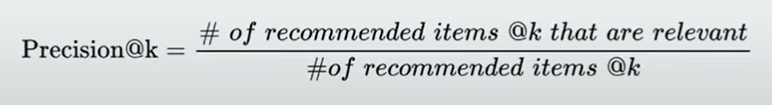

In [90]:
image_precision_k = 'Precision@k.png'

# Display the image
Image(filename=image_precision_k)

In [91]:
with torch.no_grad():
    precisions = dict()
    recalls = dict()

    #top recommendations 
    k=1000 
    #minimum rating 
    threshold=3.5

    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value. 
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # here get the number of actual relevant item
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # here get the number of recommended item that are predicted relevent and within topk
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # here get the number of recommented item that' is also actually relevant within topk
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )

        print(f"uid {uid},  n_rel {n_rel}, n_rec_k {n_rec_k}, n_rel_and_rec_k {n_rel_and_rec_k}")

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

uid 6666,  n_rel 17, n_rec_k 17, n_rel_and_rec_k 17
uid 8167,  n_rel 22, n_rec_k 22, n_rel_and_rec_k 22
uid 6023,  n_rel 64, n_rec_k 64, n_rel_and_rec_k 64
uid 6272,  n_rel 33, n_rec_k 33, n_rel_and_rec_k 33
uid 721,  n_rel 28, n_rec_k 28, n_rel_and_rec_k 28
uid 7962,  n_rel 2, n_rec_k 2, n_rel_and_rec_k 2
uid 4648,  n_rel 6, n_rec_k 6, n_rel_and_rec_k 6
uid 7696,  n_rel 34, n_rec_k 34, n_rel_and_rec_k 34
uid 2804,  n_rel 18, n_rec_k 18, n_rel_and_rec_k 18
uid 147,  n_rel 14, n_rec_k 16, n_rel_and_rec_k 14
uid 133,  n_rel 44, n_rec_k 44, n_rel_and_rec_k 44
uid 4400,  n_rel 25, n_rec_k 25, n_rel_and_rec_k 25
uid 6631,  n_rel 13, n_rec_k 15, n_rel_and_rec_k 13
uid 3971,  n_rel 19, n_rec_k 19, n_rel_and_rec_k 19
uid 6612,  n_rel 26, n_rec_k 26, n_rel_and_rec_k 26
uid 3868,  n_rel 228, n_rec_k 242, n_rel_and_rec_k 228
uid 2758,  n_rel 17, n_rec_k 17, n_rel_and_rec_k 17
uid 4433,  n_rel 36, n_rec_k 36, n_rel_and_rec_k 36
uid 129,  n_rel 18, n_rec_k 19, n_rel_and_rec_k 18
uid 877,  n_rel 120

uid 1825,  n_rel 28, n_rec_k 28, n_rel_and_rec_k 28
uid 5953,  n_rel 22, n_rec_k 22, n_rel_and_rec_k 22
uid 1843,  n_rel 10, n_rec_k 10, n_rel_and_rec_k 10
uid 5757,  n_rel 8, n_rec_k 8, n_rel_and_rec_k 8
uid 6629,  n_rel 18, n_rec_k 18, n_rel_and_rec_k 18
uid 6249,  n_rel 16, n_rec_k 16, n_rel_and_rec_k 16
uid 5123,  n_rel 1, n_rec_k 1, n_rel_and_rec_k 1
uid 7079,  n_rel 36, n_rec_k 36, n_rel_and_rec_k 36
uid 1067,  n_rel 14, n_rec_k 15, n_rel_and_rec_k 14
uid 6157,  n_rel 8, n_rec_k 8, n_rel_and_rec_k 8
uid 777,  n_rel 31, n_rec_k 31, n_rel_and_rec_k 31
uid 8143,  n_rel 8, n_rec_k 8, n_rel_and_rec_k 8
uid 883,  n_rel 20, n_rec_k 20, n_rel_and_rec_k 20
uid 3117,  n_rel 6, n_rec_k 6, n_rel_and_rec_k 6
uid 6803,  n_rel 2, n_rec_k 2, n_rel_and_rec_k 2
uid 3513,  n_rel 10, n_rec_k 10, n_rel_and_rec_k 10
uid 39,  n_rel 24, n_rec_k 24, n_rel_and_rec_k 24
uid 2897,  n_rel 14, n_rec_k 14, n_rel_and_rec_k 14
uid 2511,  n_rel 3, n_rec_k 3, n_rel_and_rec_k 3
uid 4007,  n_rel 14, n_rec_k 14, n_re

In [92]:
# Precision and recall can then be averaged over all users
#summing up the precisions values of all users and dividing by the total number of users 
print(f"precision @ {k}: {sum(prec for prec in precisions.values()) / len(precisions)}")

#summing up the recall values for all users and dividing by the total number of users
print(f"recall @ {k} : {sum(rec for rec in recalls.values()) / len(recalls)}")


precision @ 1000: 0.9839994878333199
recall @ 1000 : 0.9982806450176656


-----------------------------------------------------------------------------

### Recommending 

In [ ]:
# Print the top N recommended items (e.g., top 10)
# Choose a user for whom you want to make recommendations
user_id_to_recommend_for = int(input("Enter an user id: "))  # Replace with the user ID you want to recommend for

# Get the embeddings for the chosen user from your model
user_embeddings = model.user_embed(torch.LongTensor([user_id_to_recommend_for]).to(device))

# Calculate predicted ratings for all anime items
item_embeddings = model.anime_embed.weight
predicted_ratings = torch.matmul(user_embeddings, item_embeddings.t())

# Convert predicted ratings to a NumPy array for easier manipulation
predicted_ratings = predicted_ratings.cpu().detach().numpy()

# Get the user's interactions from the training data (items they have already interacted with)
user_interactions = animedataTraining_train[animedataTraining_train['user_id'] == user_id_to_recommend_for]['anime_id'].values

# Find items that the user hasn't interacted with yet (where user_interactions is not in user's training interactions)
items_to_recommend = np.setdiff1d(animedataTraining['anime_id'].unique(), user_interactions)

# Sort items by predicted ratings in descending order
recommended_items = items_to_recommend[np.argsort(predicted_ratings[0, items_to_recommend])[::-1]]

# Print the top N recommended items (e.g., top 10) with anime names and additional data
top_N = 10
print(f"Top {top_N} recommended items for user {user_id_to_recommend_for}:")
for item_id in recommended_items[:top_N]:
    # Retrieve the row from your DataFrame associated with the item_id
    anime_data = animedataTraining[animedataTraining['anime_id'] == item_id].iloc[0]
    
    anime_name = anime_data['Anime Title']  # Replace 'anime_name' with the actual column name in your DataFrame
    predicted_rating = predicted_ratings[0, item_id]
    
    print(f"Anime id: {item_id}, Anime name: {anime_name}")

----------------------------------------------------------------